In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

FOLDER_PATH = path = os.path.join("datasets", "food_demand")


def load_data(filename):
    file_path = os.path.join(FOLDER_PATH, filename)
    return pd.read_csv(file_path)


# Loading the data

In [2]:
center_info = load_data("fulfilment_center_info.csv")
meal_info = load_data("meal_info.csv")
train_data = load_data("train.csv")
test_data = load_data("test.csv")


# First look over the data

In [3]:
center_info


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [4]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [5]:
train_data


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [6]:
test_data


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


# Checking for null values

In [7]:
center_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [8]:
meal_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [9]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [10]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


# Check if every meal and center in the train/test datasets have entries

In [11]:
train_data["center_id"].value_counts()


13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

In [12]:
train_data['center_id'].isin(center_info['center_id']).value_counts()


True    456548
Name: center_id, dtype: int64

All center ids in the train set exist

In [13]:
test_data['center_id'].isin(center_info['center_id']).value_counts()


True    32573
Name: center_id, dtype: int64

All center ids in the test set exist

In [14]:
train_data['meal_id'].isin(meal_info['meal_id']).value_counts()


True    456548
Name: meal_id, dtype: int64

In [15]:
test_data['meal_id'].isin(meal_info['meal_id']).value_counts()


True    32573
Name: meal_id, dtype: int64

All meal ids in the test/train data exist

# Merging the train/test into one data frame by joining with the centers and meals

In [16]:
full_train_data = train_data.merge(center_info, on="center_id", how="inner")
full_train_data = full_train_data.merge(meal_info, on="meal_id", how="inner")

In [17]:
full_train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


# Checking numerical values

In [18]:
full_train_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


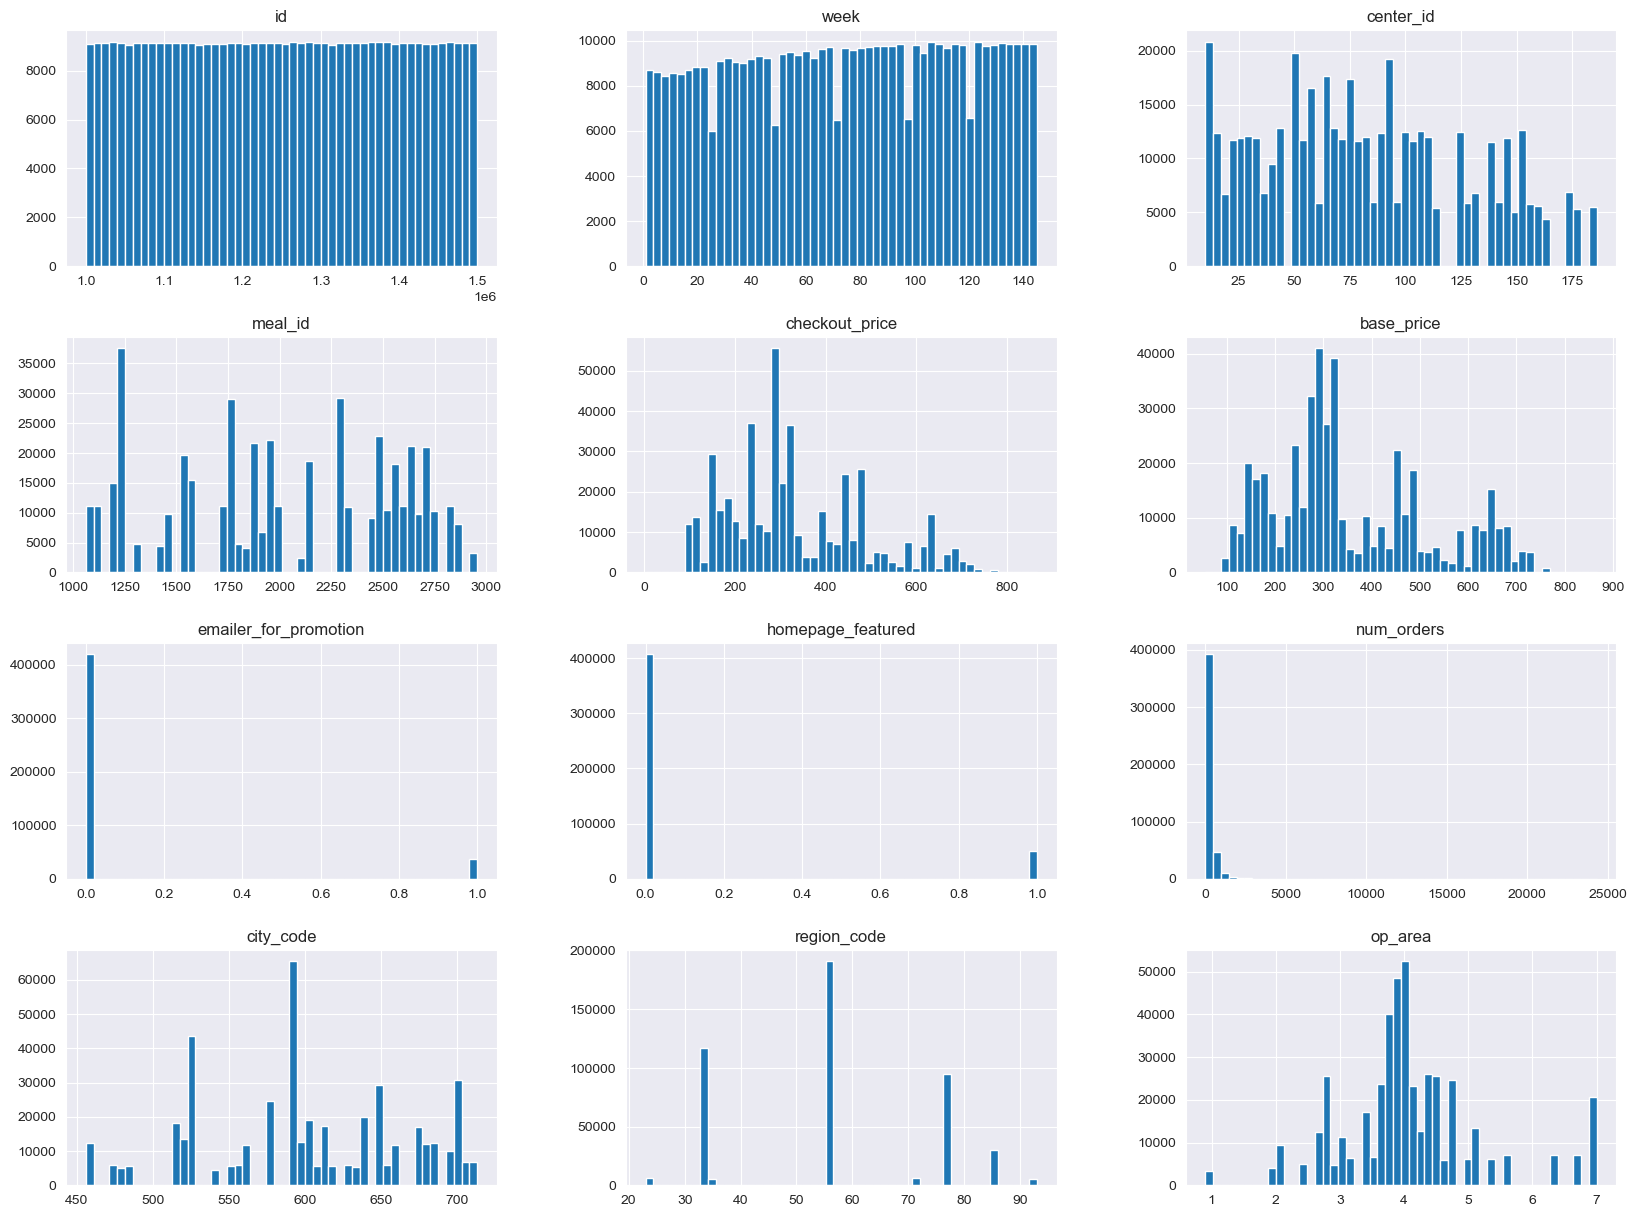

In [19]:
full_train_data.hist(bins=50, figsize=(20, 15))
plt.show()


# Check correlations with number of sales

In [20]:
correlations = full_train_data.corr(numeric_only=True)


In [21]:
correlations["num_orders"]


id                       0.000702
week                    -0.017210
center_id               -0.053035
meal_id                  0.010597
checkout_price          -0.282108
base_price              -0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
city_code                0.041596
region_code              0.029744
op_area                  0.176976
Name: num_orders, dtype: float64

# Insights:
Highest positive correlations are with homepage_features and emails_for promotion.
Makes sense, if the meal is marketed either on the website or through an email, the nr of orders increases.
Op Area also makes sense. If the center covers a bigger area, the nr of orders increases.

Best negative correlations are for the base_price and the checkout_price.
Self-explanatory,  if prices are cheaper, more orders appear.

array([[<Axes: xlabel='num_orders', ylabel='num_orders'>,
        <Axes: xlabel='base_price', ylabel='num_orders'>,
        <Axes: xlabel='checkout_price', ylabel='num_orders'>],
       [<Axes: xlabel='num_orders', ylabel='base_price'>,
        <Axes: xlabel='base_price', ylabel='base_price'>,
        <Axes: xlabel='checkout_price', ylabel='base_price'>],
       [<Axes: xlabel='num_orders', ylabel='checkout_price'>,
        <Axes: xlabel='base_price', ylabel='checkout_price'>,
        <Axes: xlabel='checkout_price', ylabel='checkout_price'>]],
      dtype=object)

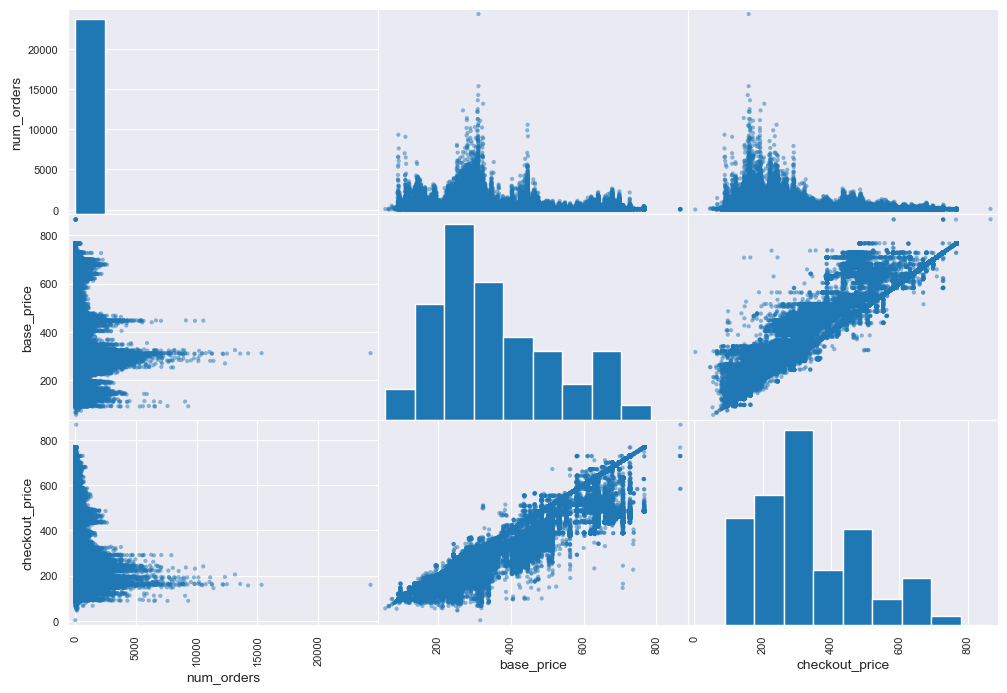

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["num_orders", "base_price", "checkout_price"]
scatter_matrix(full_train_data[attributes], figsize=(12, 8))

In [23]:
nr_order_by_week = full_train_data.groupby(["week"])["num_orders"].sum()
nr_order_by_week

week
1       792261
2       787084
3       695262
4       743529
5      1198675
        ...   
141     776240
142     739661
143     759926
144     801197
145     671926
Name: num_orders, Length: 145, dtype: int64

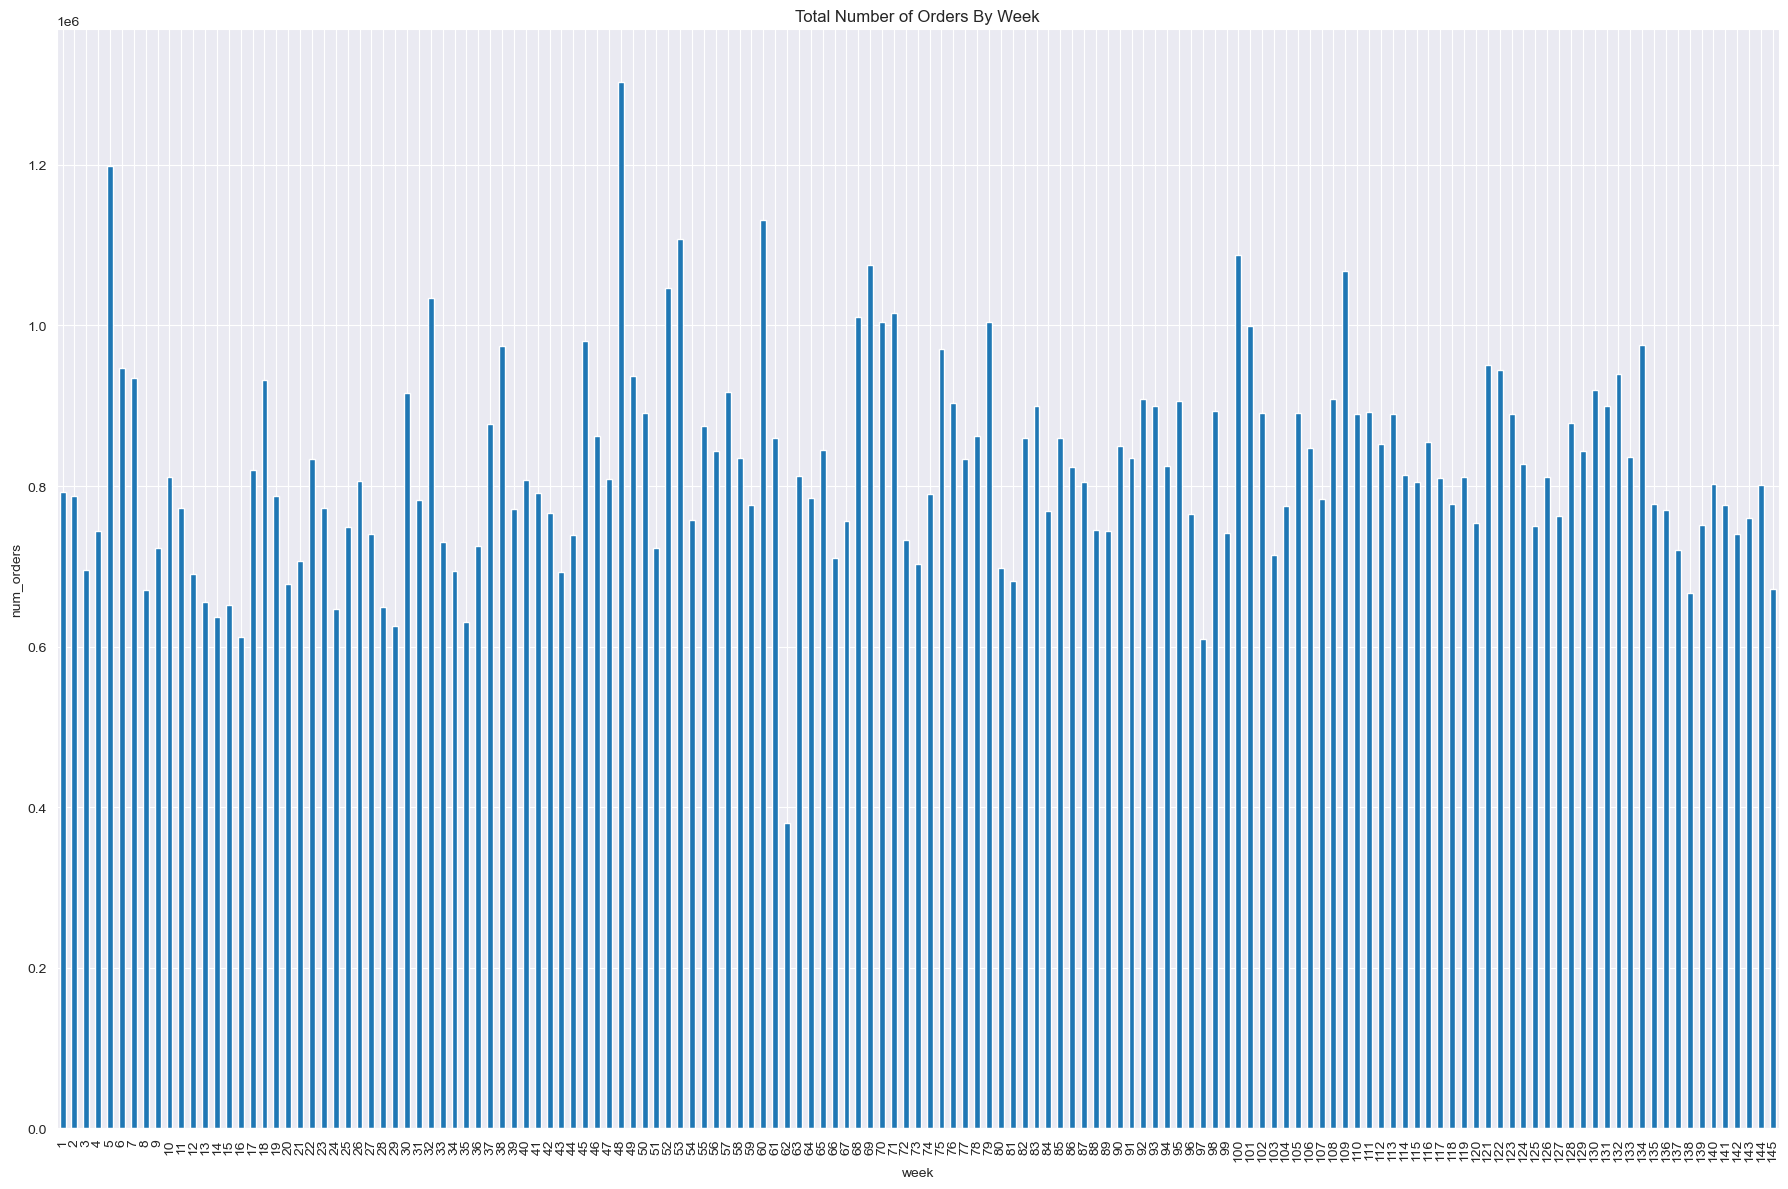

In [24]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='bar')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


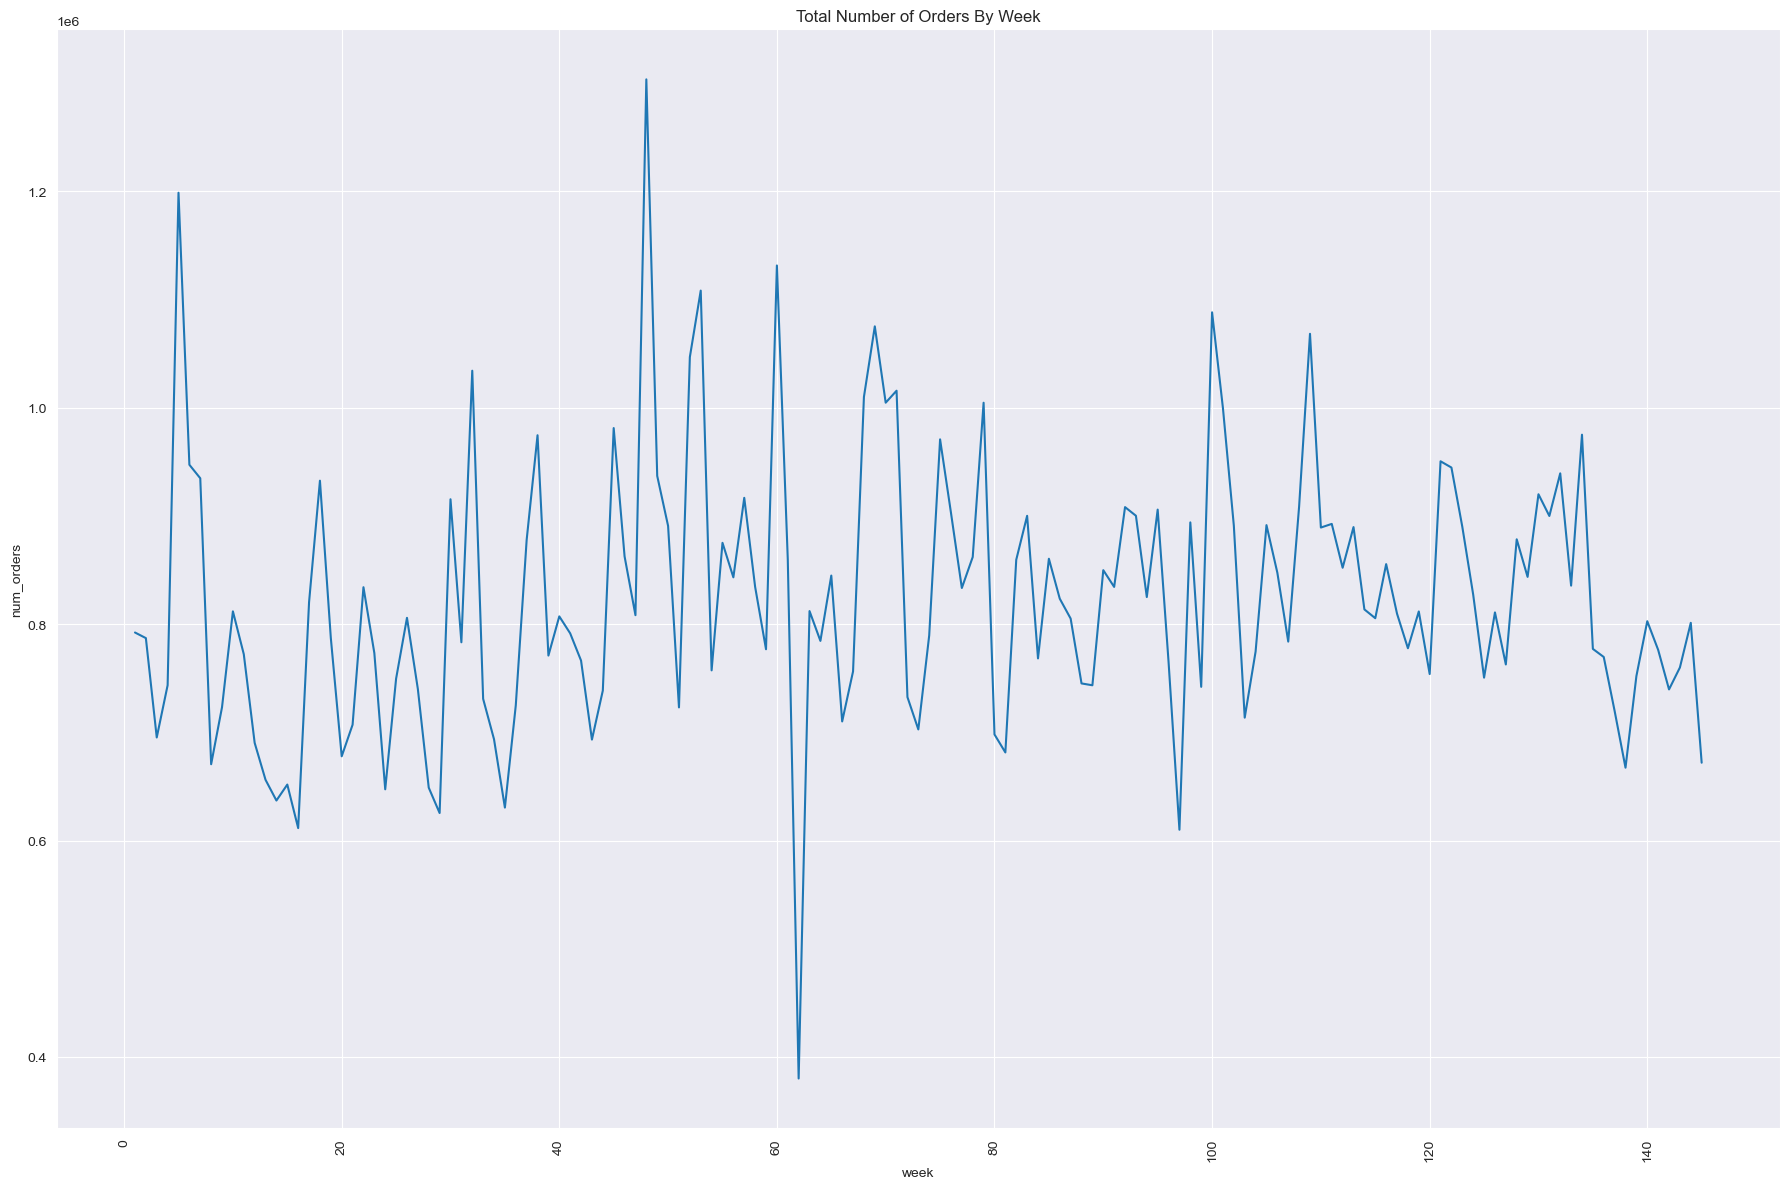

In [25]:
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='line')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


In [26]:
full_train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [27]:
nr_order_by_center = full_train_data.groupby(["center_id"])["num_orders"].sum()
nr_order_by_center


center_id
10     3381018
11     2797300
13     4296545
14     1195108
17     1218319
        ...   
161     813948
162     680255
174    2792587
177    1021177
186     846982
Name: num_orders, Length: 77, dtype: int64

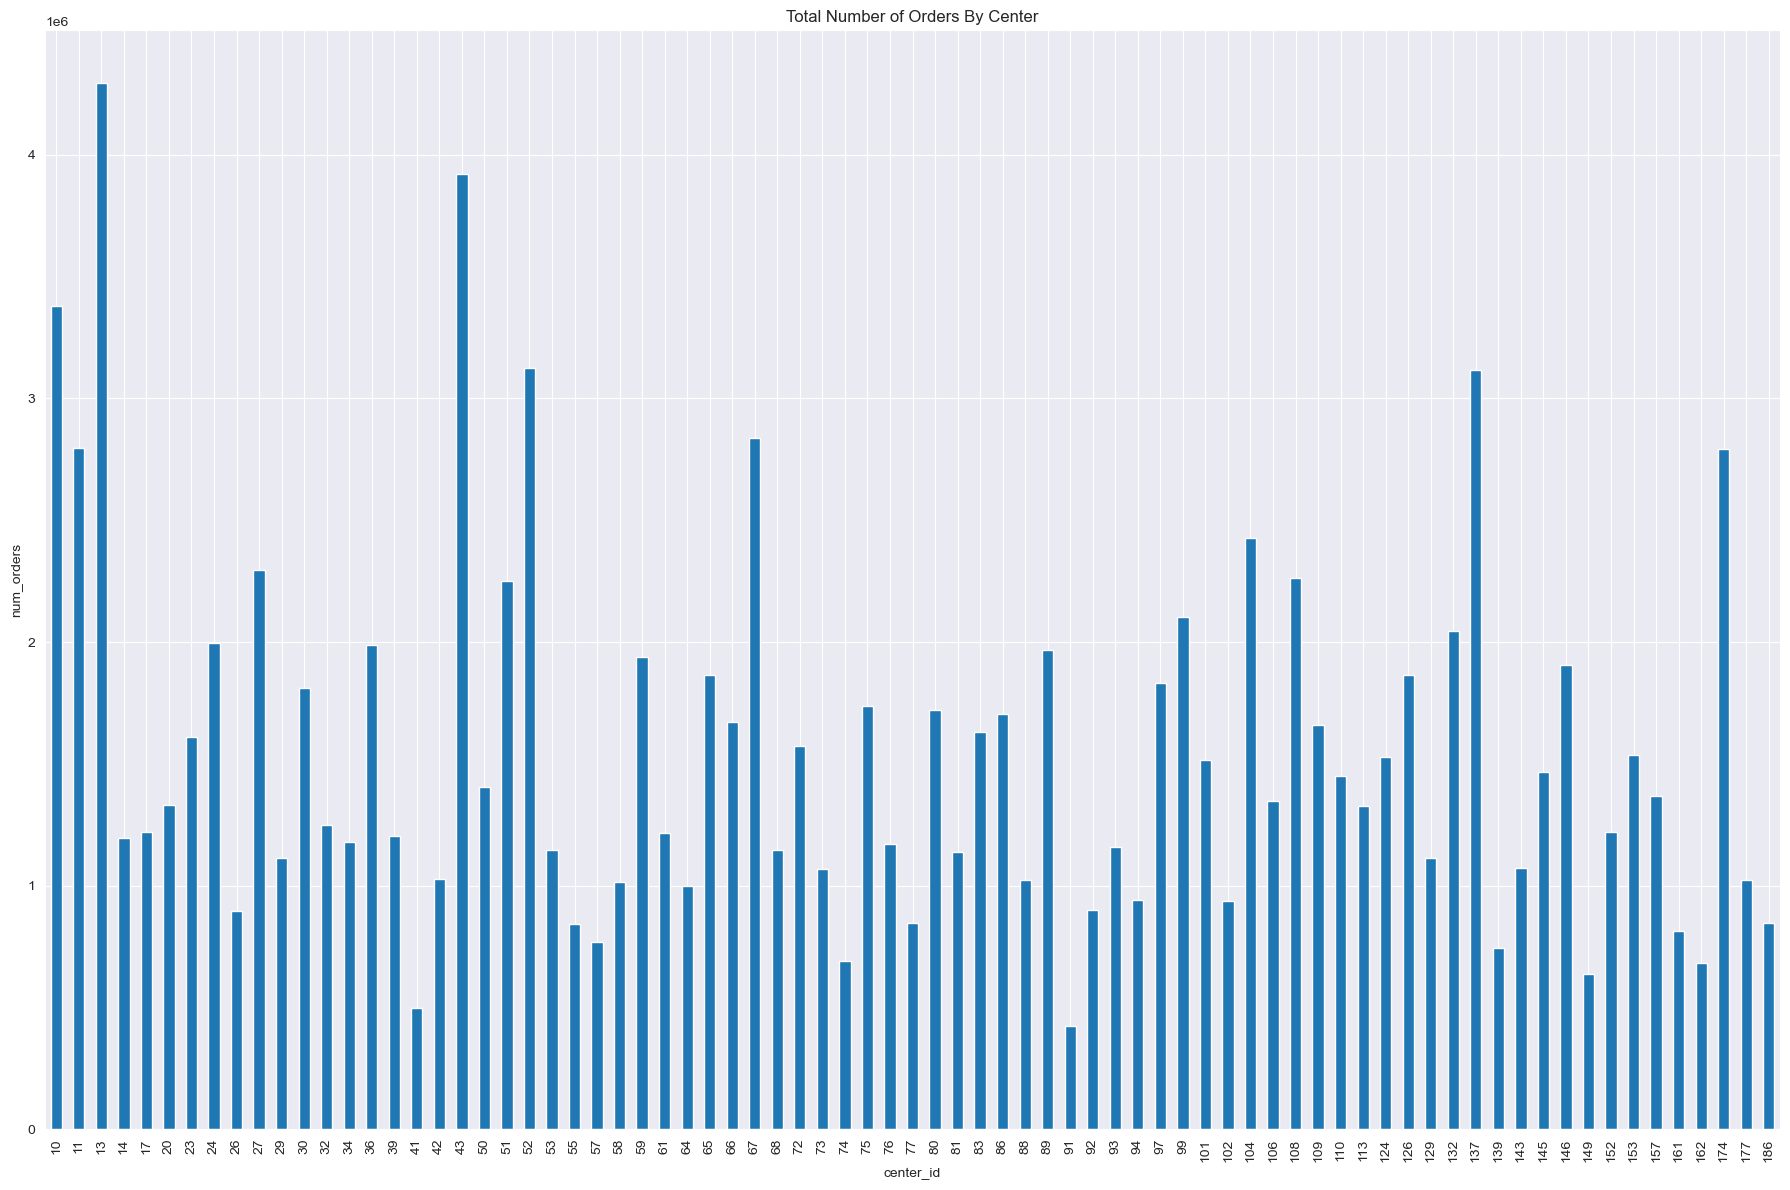

In [28]:
plt.figure(figsize=(18, 12))
nr_order_by_center.plot(kind='bar')
plt.title('Total Number of Orders By Center')
plt.xlabel('center_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


In [29]:
nr_order_by_center_type = full_train_data.groupby(["center_type"])["num_orders"].sum()
nr_order_by_center_type


center_type
TYPE_A    68978517
TYPE_B    29996073
TYPE_C    20582895
Name: num_orders, dtype: int64

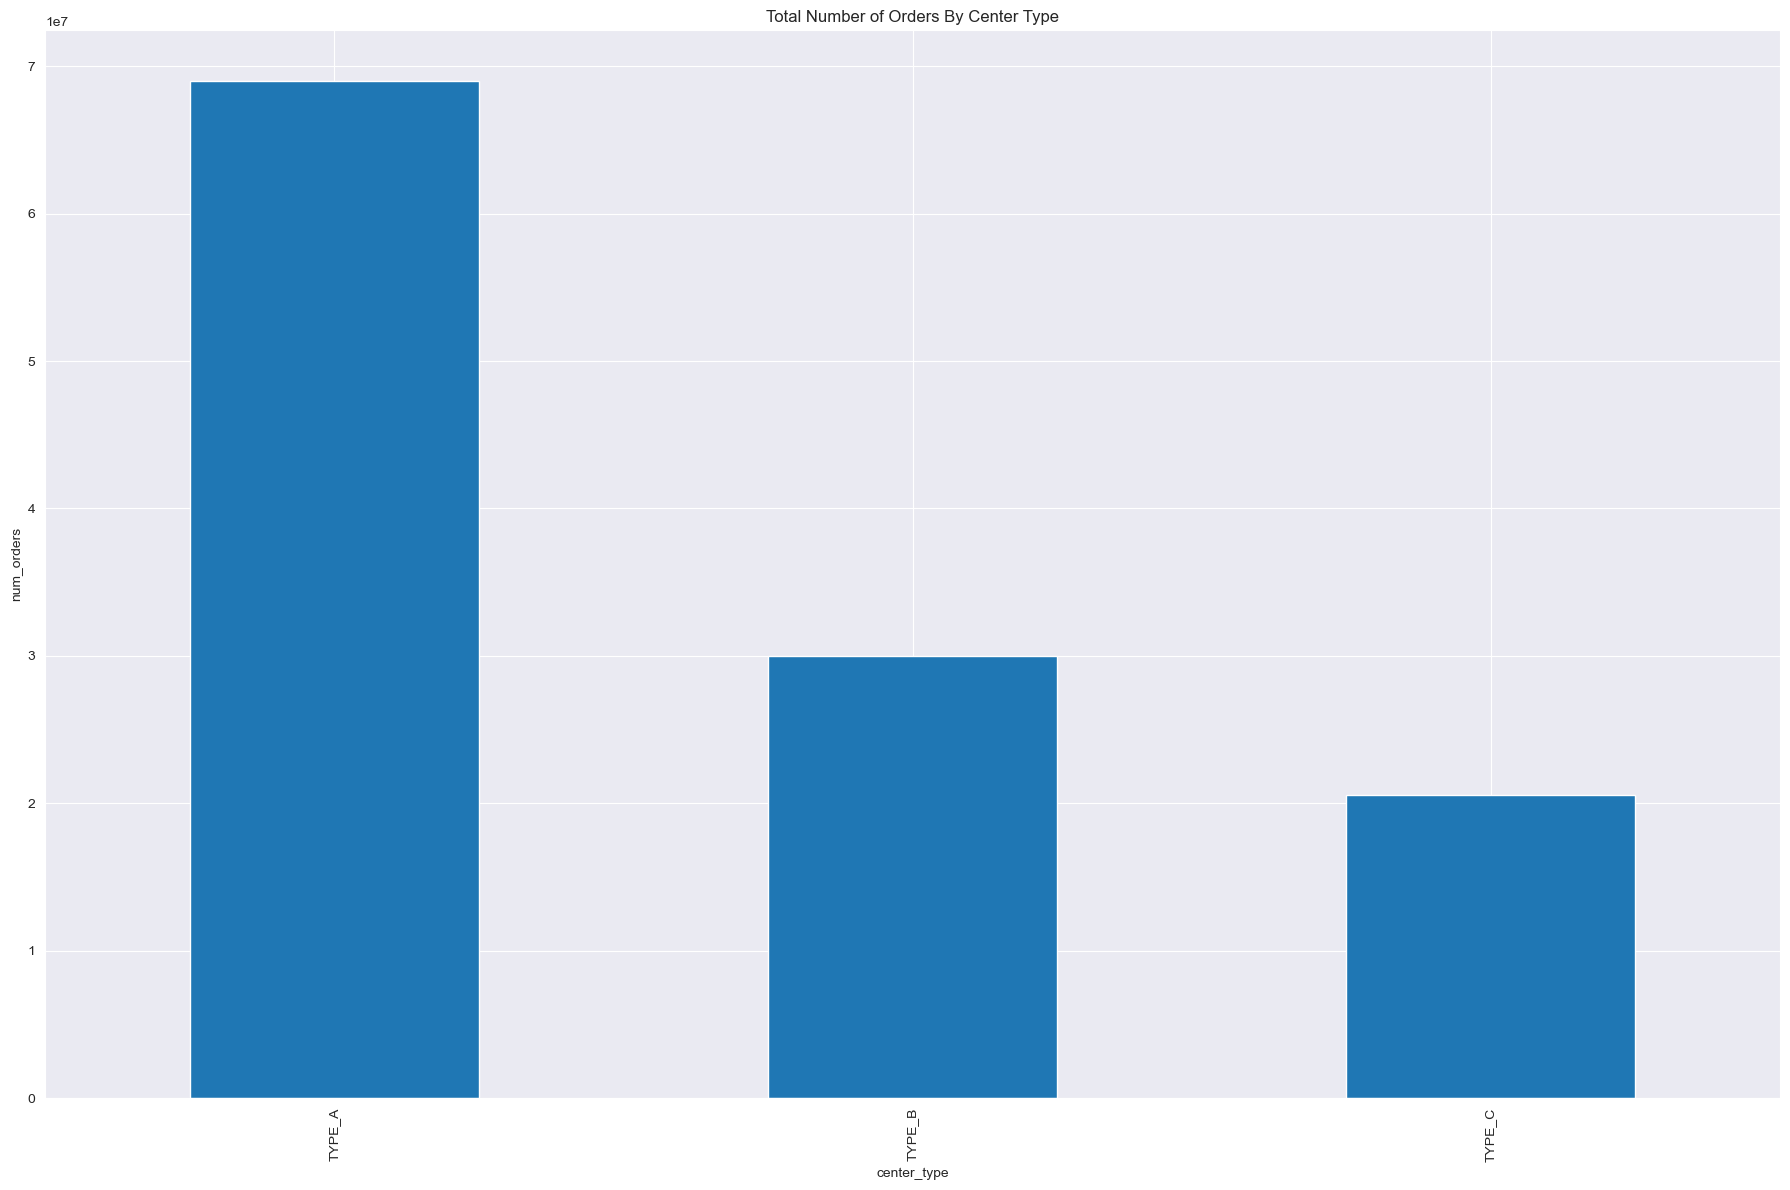

In [30]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_center_type.plot(kind='bar')
plt.title('Total Number of Orders By Center Type')
plt.xlabel('center_type')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


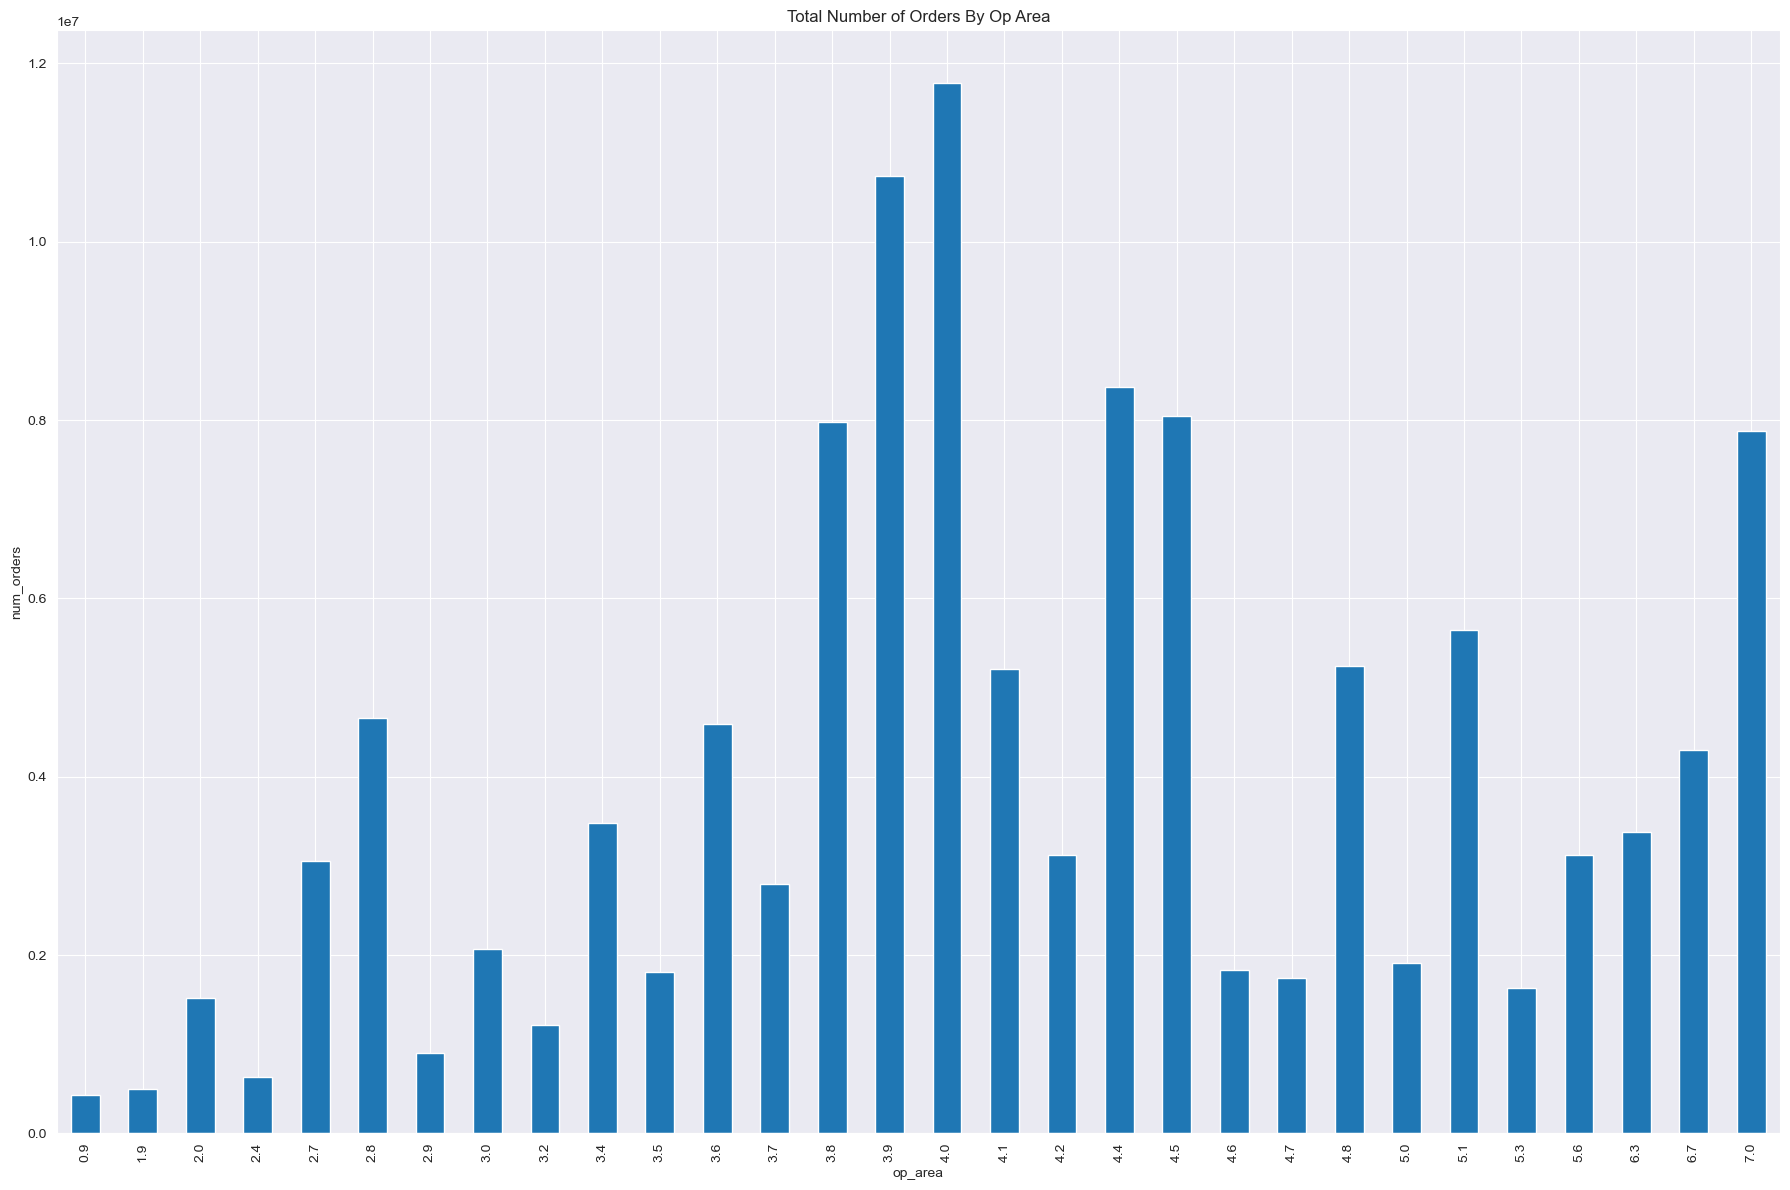

In [31]:
nr_order_by_op_area = full_train_data.groupby(["op_area"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_op_area.plot(kind='bar')
plt.title('Total Number of Orders By Op Area')
plt.xlabel('op_area')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

## Type A Centers perform much better than Type B. We'll need to understand why.


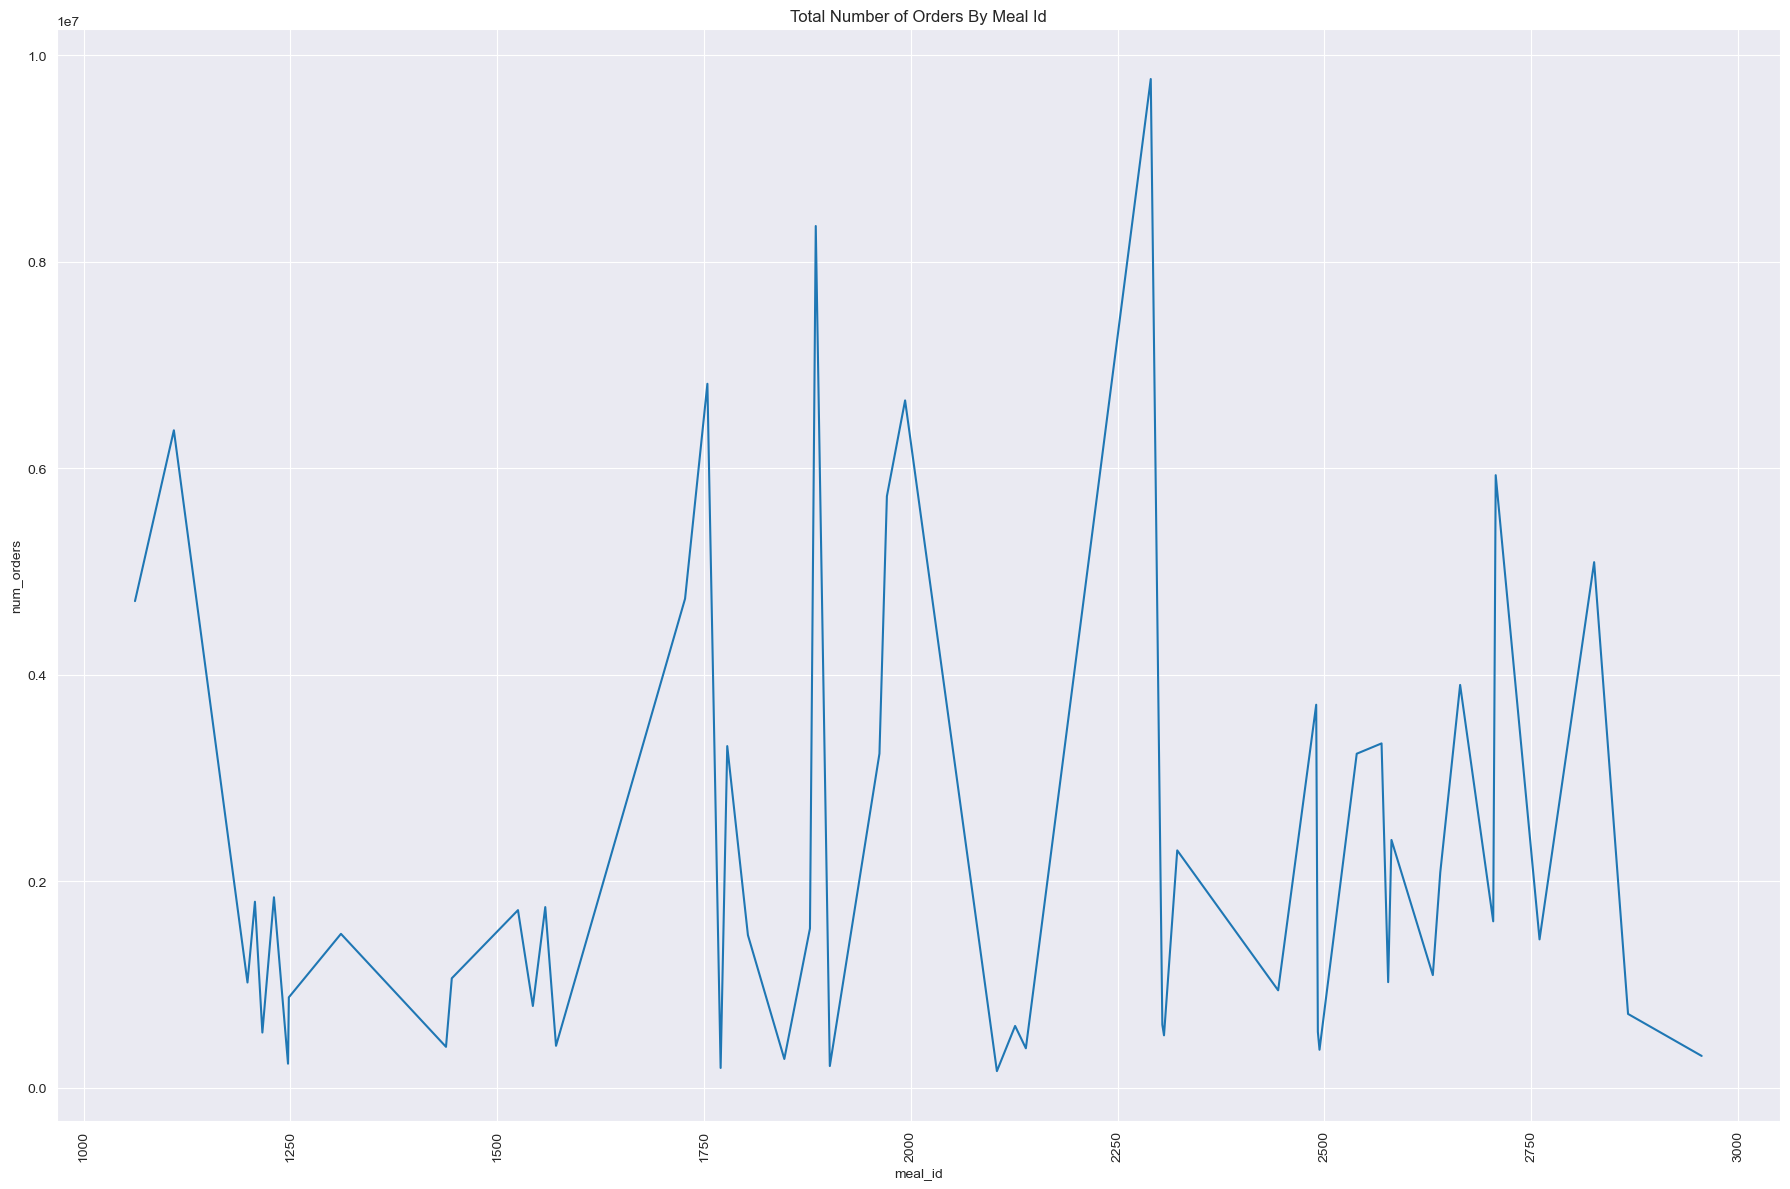

In [32]:
nr_order_by_meal = full_train_data.groupby(["meal_id"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal.plot(kind='line')
plt.title('Total Number of Orders By Meal Id')
plt.xlabel('meal_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


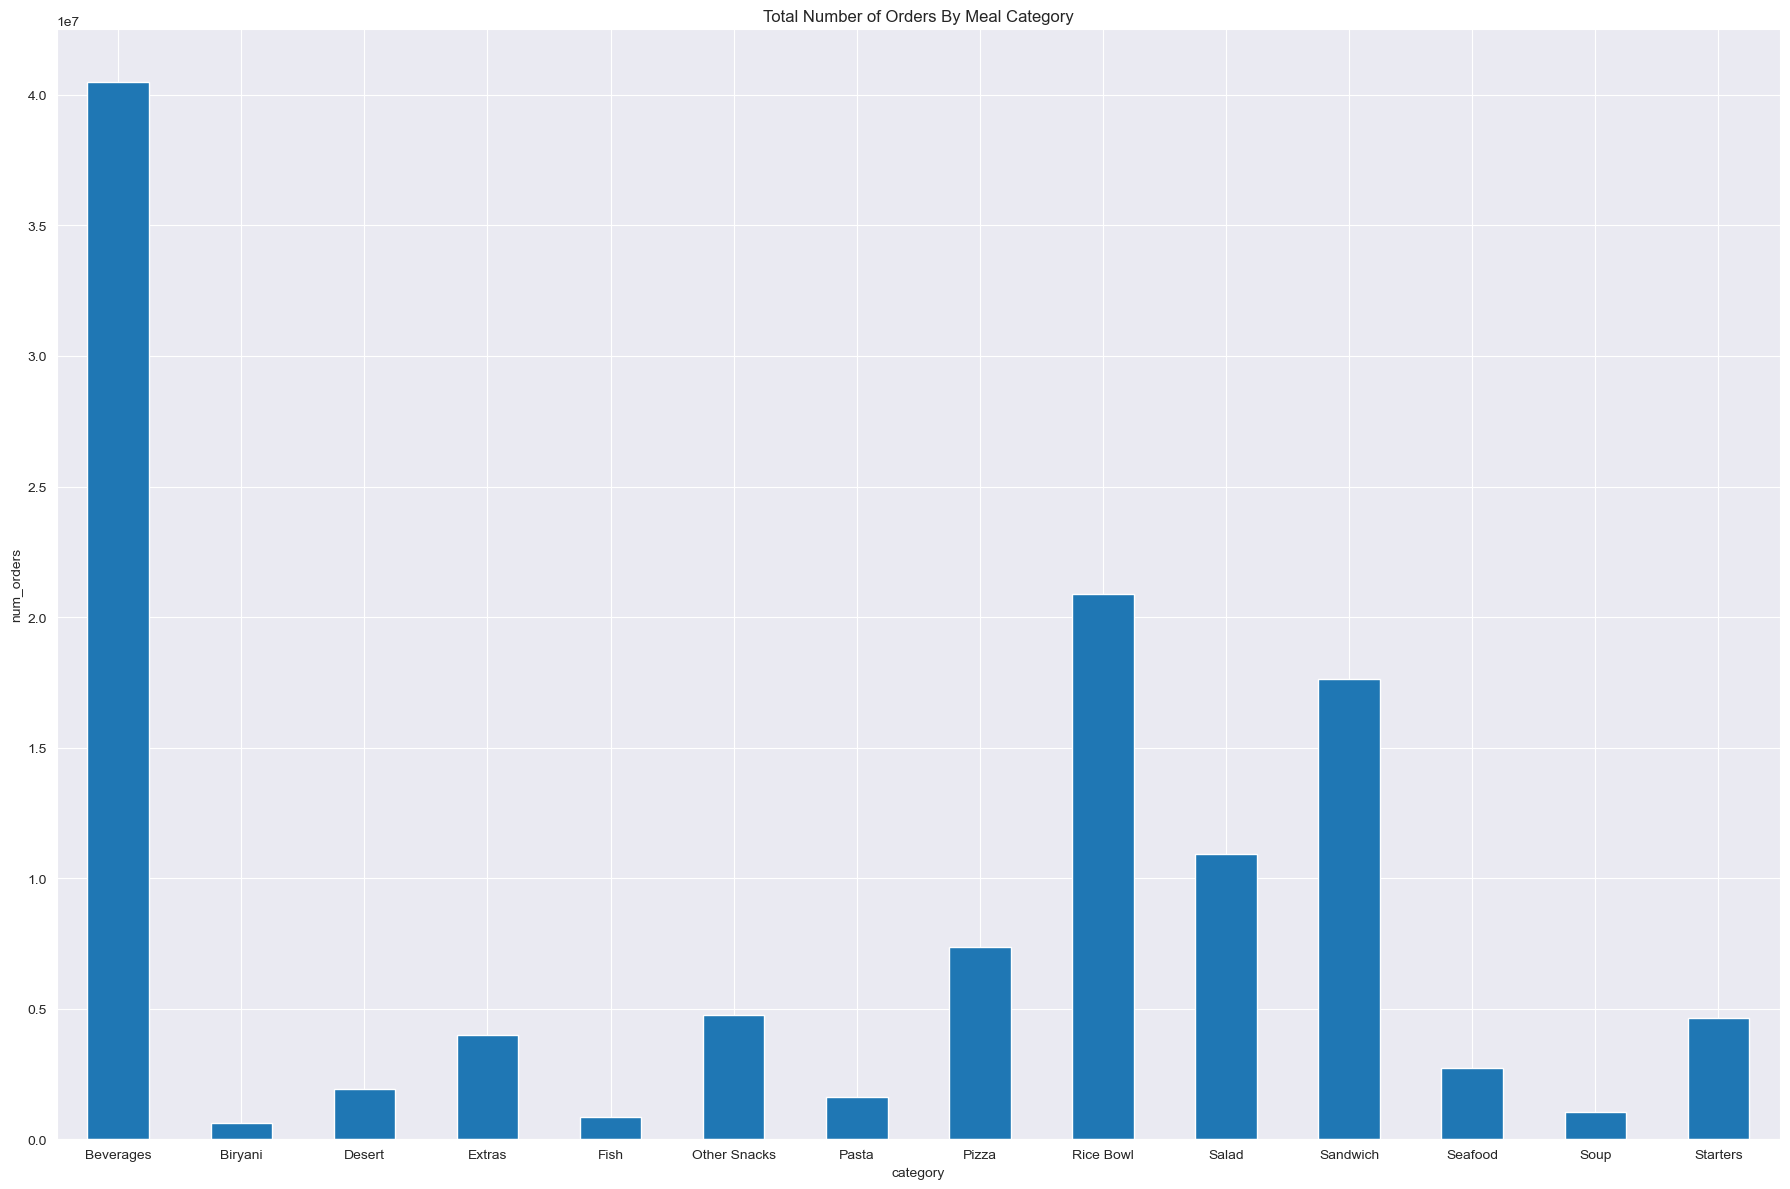

In [33]:
nr_order_by_meal_category = full_train_data.groupby(["category"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal_category.plot(kind='bar')
plt.title('Total Number of Orders By Meal Category')
plt.xlabel('category')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Some categories sell much better than others: Beverages win by a lot, followed by Rice Bowls and Sandwiches

In [34]:
full_train_data["cuisine"].value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

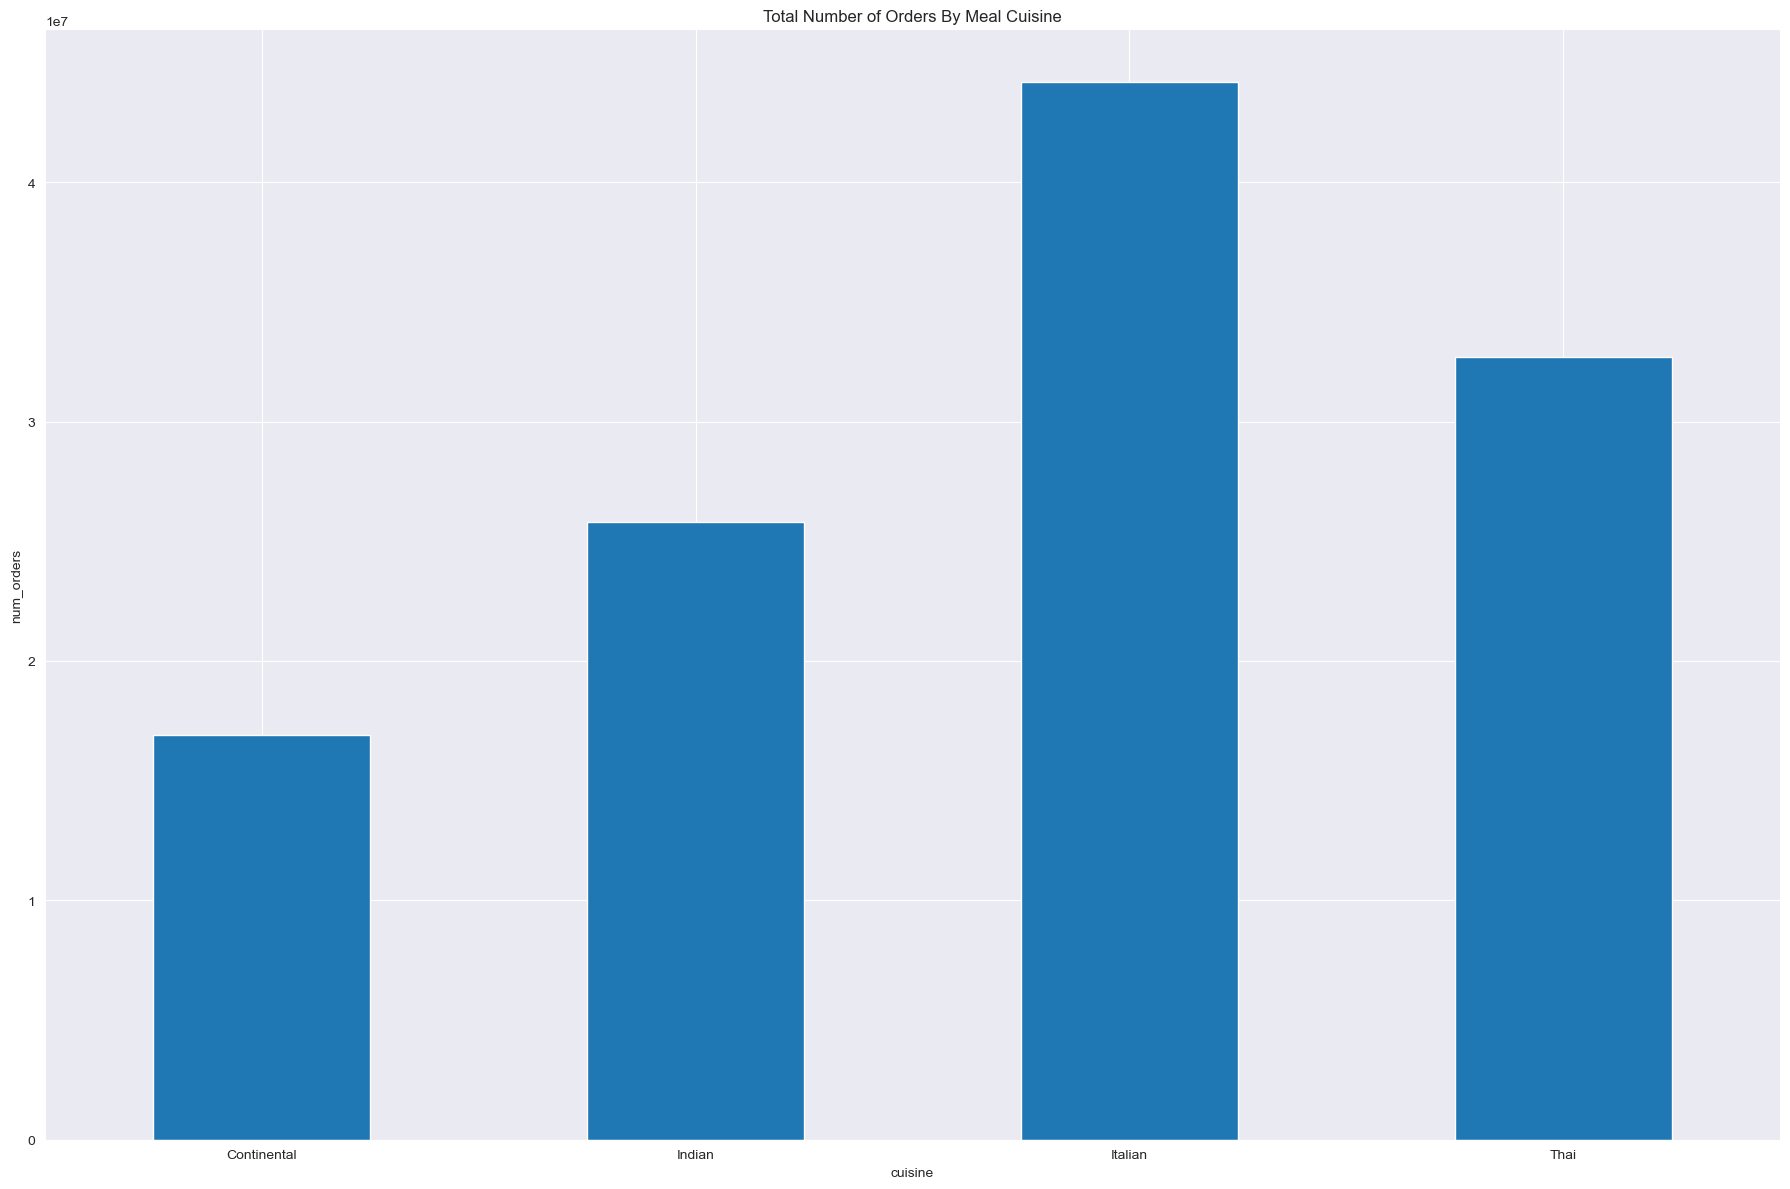

In [35]:
nr_order_by_meal_cuisine = full_train_data.groupby(["cuisine"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal_cuisine.plot(kind='bar')
plt.title('Total Number of Orders By Meal Cuisine')
plt.xlabel('cuisine')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Checking some other connections

## Are Type_A centers selling better because of Type_A or because they maybe selling more Beverages or other well selling meal cateogries?

Let's look at the order totals for each center_type/category combination

In [36]:
full_train_data.groupby(["center_type", "category"])["num_orders"].sum()


center_type  category    
TYPE_A       Beverages       24633857
             Biryani           348112
             Desert           1006575
             Extras           2385158
             Fish              468892
             Other Snacks     2721316
             Pasta             893619
             Pizza            4178759
             Rice Bowl       11847850
             Salad            5773622
             Sandwich         9844003
             Seafood          1624714
             Soup              612597
             Starters         2639443
TYPE_B       Beverages        9340360
             Biryani           228273
             Desert            597142
             Extras           1251120
             Fish              375444
             Other Snacks     1755359
             Pasta             530987
             Pizza            1585932
             Rice Bowl        5519104
             Salad            2269206
             Sandwich         3760525
             Seafood    

Good info, but we need it in a visual way to understand better.
Let's plot these values grouped by center type and category. We expect to see that Type A bars will outperform the rest of the center types because we know Type A sells much more than the others.

<Axes: xlabel='center_type', ylabel='num_orders'>

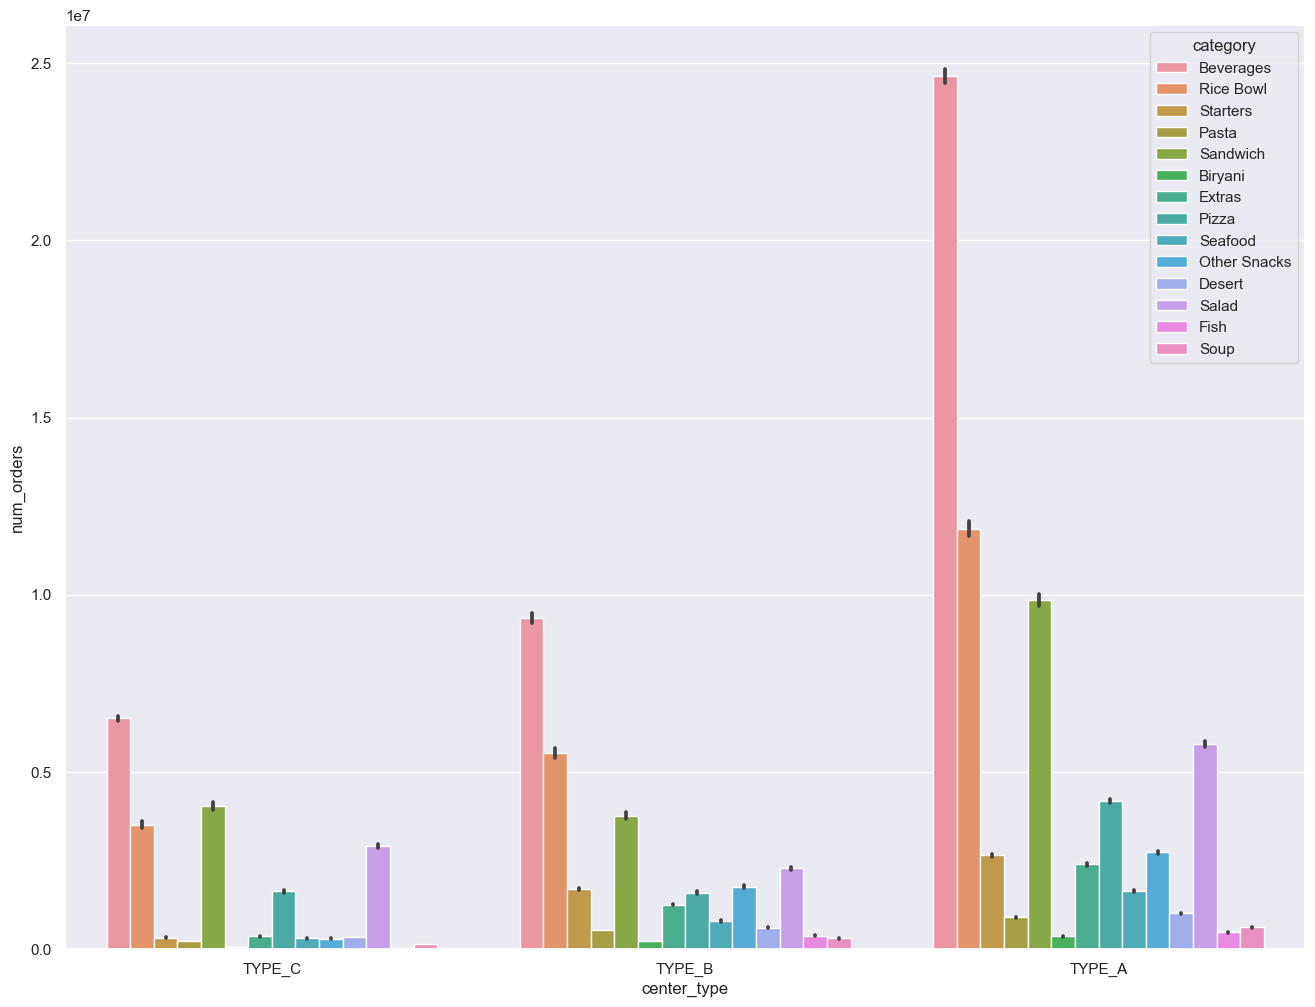

In [37]:
import seaborn as sns

sns.set(rc={'figure.figsize': (16, 12)})
sns.barplot(x="center_type", y="num_orders", hue="category", data=full_train_data, estimator="sum")

OBSERVATIONS:
As we assumed, Type A categories outperform those respective categories from other center types.
Just eyeballing it, we can see that even though Type A sells much more than the others, it sells each category in a similar proportion to the rest.
Eyeballing is not enough, let's check the data.

## Are the percentages of categories sold in Type A very different that in the other types? Does type A sell many more Beverages compared to it's total sales?
## We want to understand if the better performance of Type A is due to it selling meals from a better sold category or if it sells about the same as the other center types in % amount. This will help us understand if the center_type is actually relevant or if the difference in sales for the center_type is due to the meal categories sold.

Basically, we want to calculate the % of sales from the total for each center_type/category combination.
To do this, we first need for each center_type/category combination the total number of orders.

In [38]:
grouped_data_category = full_train_data.groupby(['center_type', 'category'])['num_orders'].sum().reset_index()
grouped_data_category


,center_type,category,num_orders
0,TYPE_A,Beverages,24633857
1,TYPE_A,Biryani,348112
2,TYPE_A,Desert,1006575
3,TYPE_A,Extras,2385158
4,TYPE_A,Fish,468892
5,TYPE_A,Other Snacks,2721316
6,TYPE_A,Pasta,893619
7,TYPE_A,Pizza,4178759
8,TYPE_A,Rice Bowl,11847850
9,TYPE_A,Salad,5773622


No we have the total orders for each center_type/category. To calculate the % we first need to know the total nr of orders sold for each center_type regardless of the categories. We create a different dataset for this.

In [39]:
total_orders_by_center = full_train_data.groupby(['center_type'])['num_orders'].sum().reset_index()
total_orders_by_center


,center_type,num_orders
0,TYPE_A,68978517
1,TYPE_B,29996073
2,TYPE_C,20582895


Perfect. Now we could calculate the percentage going line by line and looking into the above dataset to find the total, but it's more performant to use pandas. For this we need to add to all the center_type/category combinations, the total nr of orders for that center_type.

In [40]:
grouped_data_category = grouped_data_category.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_category


,center_type,category,num_orders,num_orders_total
0,TYPE_A,Beverages,24633857,68978517
1,TYPE_A,Biryani,348112,68978517
2,TYPE_A,Desert,1006575,68978517
3,TYPE_A,Extras,2385158,68978517
4,TYPE_A,Fish,468892,68978517
5,TYPE_A,Other Snacks,2721316,68978517
6,TYPE_A,Pasta,893619,68978517
7,TYPE_A,Pizza,4178759,68978517
8,TYPE_A,Rice Bowl,11847850,68978517
9,TYPE_A,Salad,5773622,68978517


Now that we have everything we need to calculate the percentage in the `grouped_data` dataset, we can use Pandas to apply a "regula de 3 simpla" formula:
`num_orders / num_orders+total * 100`

In [41]:
grouped_data_category["percentage"] = grouped_data_category["num_orders"] / grouped_data_category[
    "num_orders_total"] * 100


In [42]:
grouped_data_category


,center_type,category,num_orders,num_orders_total,percentage
0,TYPE_A,Beverages,24633857,68978517,35.712361
1,TYPE_A,Biryani,348112,68978517,0.504667
2,TYPE_A,Desert,1006575,68978517,1.459259
3,TYPE_A,Extras,2385158,68978517,3.457827
4,TYPE_A,Fish,468892,68978517,0.679765
5,TYPE_A,Other Snacks,2721316,68978517,3.945165
6,TYPE_A,Pasta,893619,68978517,1.295503
7,TYPE_A,Pizza,4178759,68978517,6.058059
8,TYPE_A,Rice Bowl,11847850,68978517,17.176145
9,TYPE_A,Salad,5773622,68978517,8.370174


Now, we just need to plot the data

<Axes: xlabel='center_type', ylabel='percentage'>

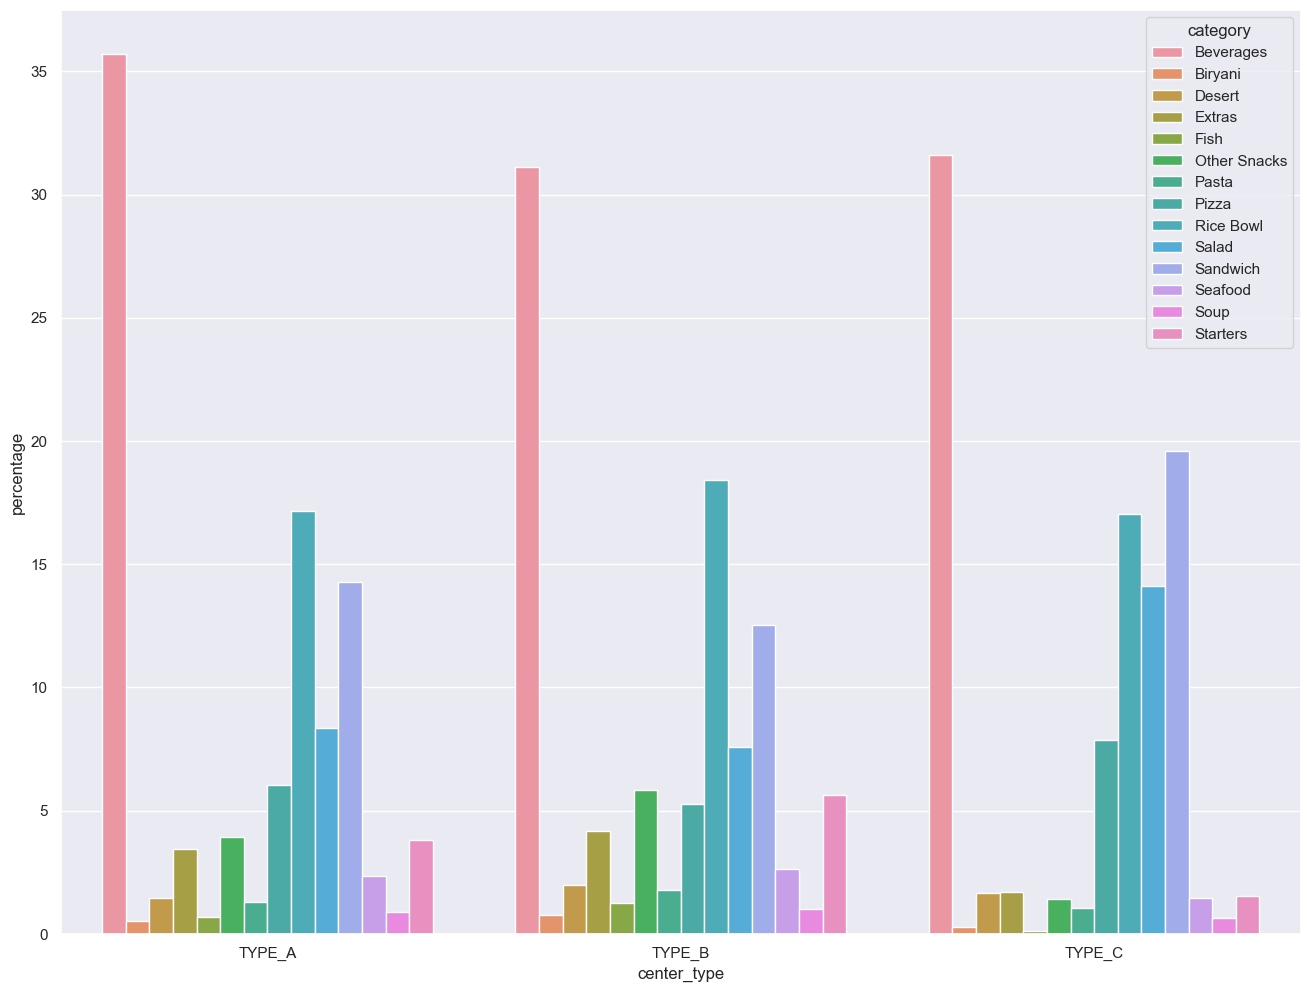

In [43]:
sns.barplot(x="center_type", y="percentage", hue="category", data=grouped_data_category)


OBSERVATIONS:
Given that the percentages for each category is very similar between the center_types it's safe to assume that category does not have a correlation with the high number of orders sold in Type A, and basically a higher Type like Type A or Type B means that that center will sell more.
So far, center_type seems like a very important feature to include in the ML training.

In [44]:
full_train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

# Are Type_A centers selling better because of Type_A or because they all have higher op_area?

Let's check center_type/op_area order totals.

In [45]:
total_orders_by_center_area = full_train_data.groupby(['center_type', "op_area"])['num_orders'].sum().reset_index()
total_orders_by_center_area


,center_type,op_area,num_orders
0,TYPE_A,2.4,637527
1,TYPE_A,2.7,1863012
2,TYPE_A,2.8,1629626
3,TYPE_A,3.0,1168739
4,TYPE_A,3.2,1218319
5,TYPE_A,3.4,3478065
6,TYPE_A,3.5,1812167
7,TYPE_A,3.6,1659568
8,TYPE_A,3.7,2797300
9,TYPE_A,3.8,4688724


Nothing to understand. Let's plot it.

<Axes: xlabel='center_type', ylabel='num_orders'>

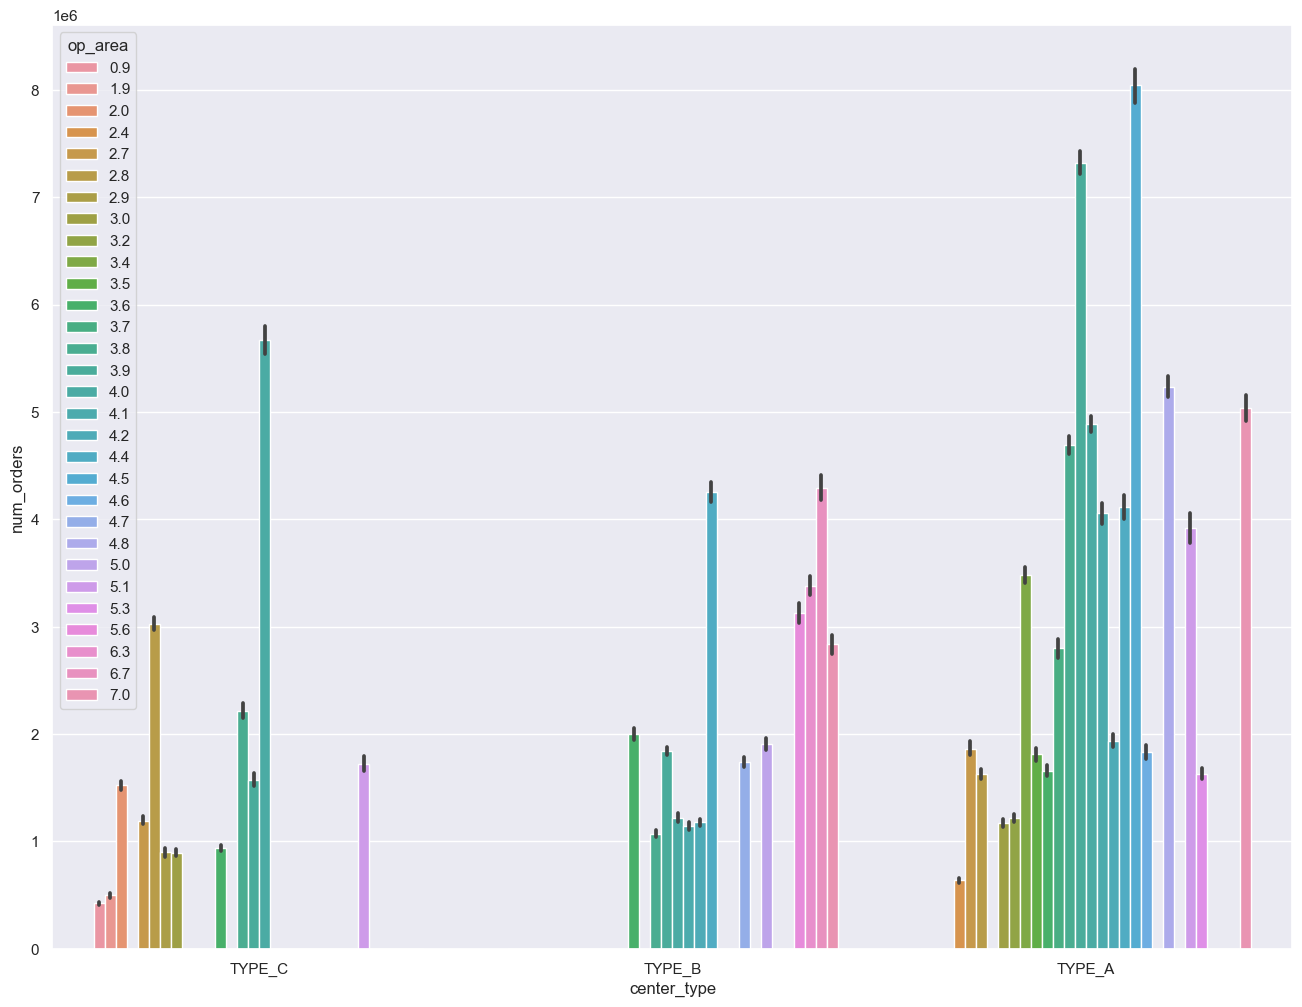

In [46]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.barplot(x="center_type", y="num_orders", hue="op_area", data=full_train_data, estimator="sum")


OBSERVATIONS:
TYpe C is the only one that sells from centers with a very small op area.
Type A might sell better because is have a much more even spread of centers with different op-areas, from smallest to largest.
Type C might be selling poorly because it seems it has very few sales from center in range 4.1-5.0, which is a sweet spot and generates a lot of sales for Type A.
In order to understand this better, let's look at the percentage spread for each op_area.

<Axes: xlabel='center_type', ylabel='percentage'>

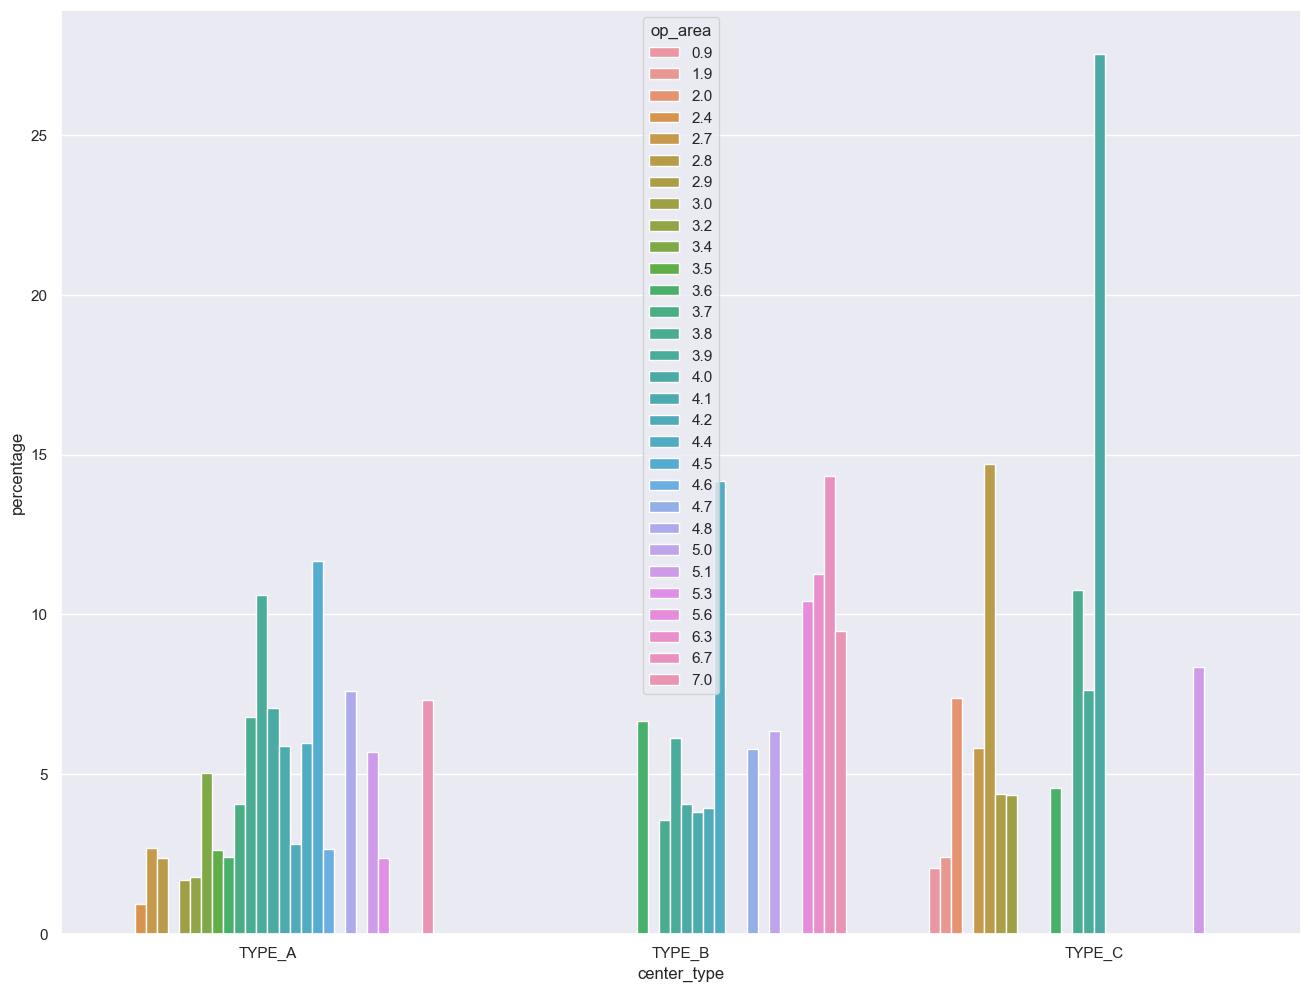

In [47]:
grouped_data_area = full_train_data.groupby(['center_type', 'op_area'])['num_orders'].sum().reset_index()
grouped_data_area = grouped_data_area.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area["percentage"] = grouped_data_area["num_orders"] / grouped_data_area["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area", data=grouped_data_area)


As seen above, Type A has a closer to normal (Gaussian) distribution than Type C, which relies heavily on centers in the 4.0-4.2 area. Might be a reason why sales are smaller in type C.

Only thing worth mentioning is that TYPE_C, the lowest selling one has centers with small op_area(e.g. centers that ship on a very small distance around them)

However, none of these insights are extremely powerful to determine changes in the flow.

Let's check if each center_type have the same distribution of op_area. We're curios to see if maybe TYPE_C have a lot of small op_area centers and if that's the reason its sales are lower or other reasons.

<Axes: xlabel='center_type', ylabel='count'>

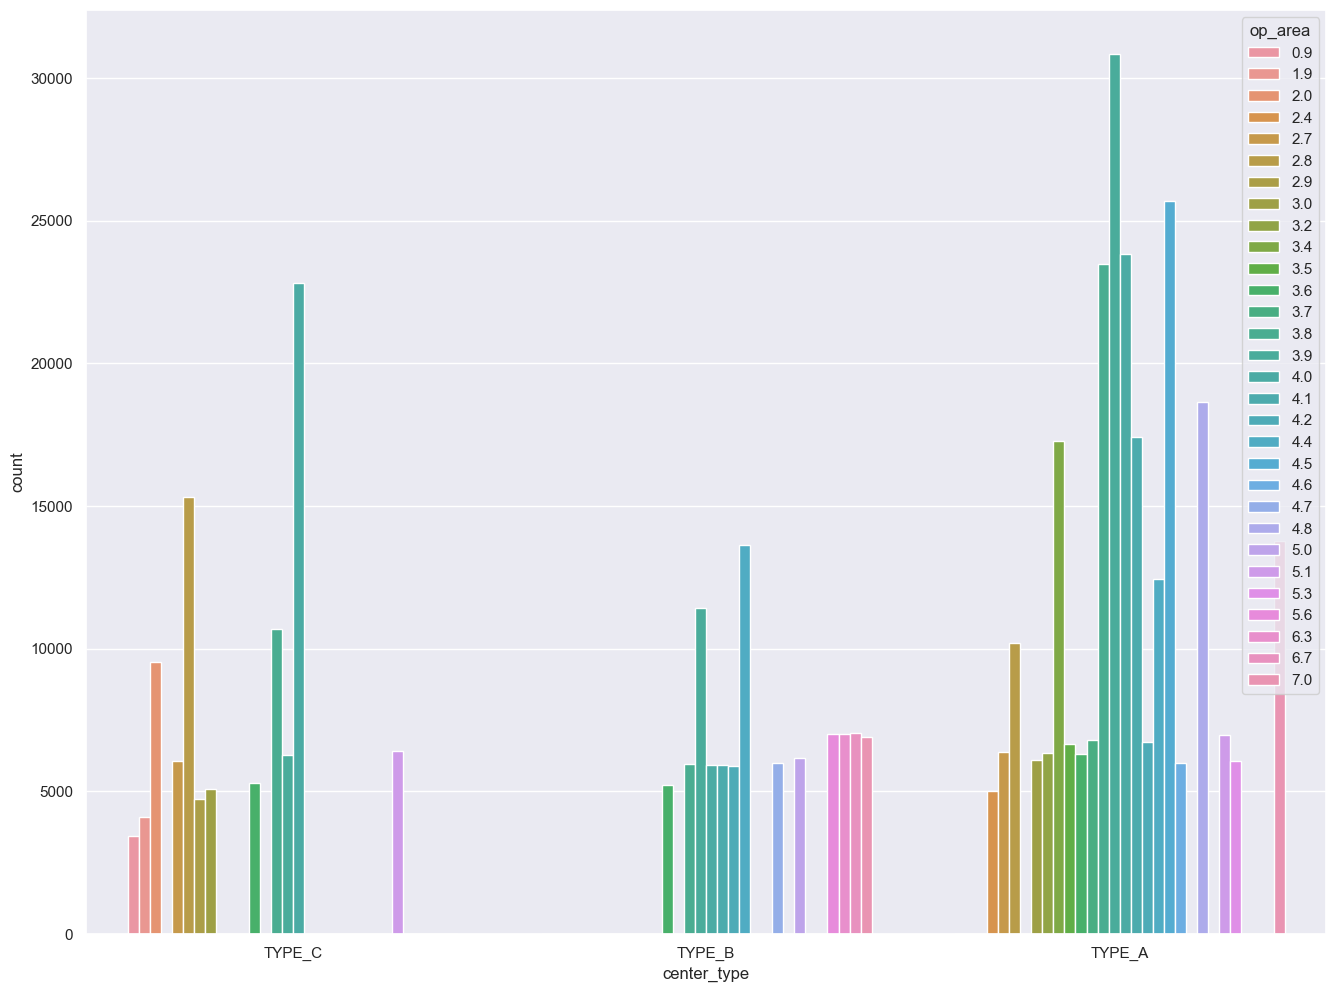

In [48]:
sns.countplot(x="center_type", hue="op_area", data=full_train_data)

OBSERVATIONS:
Comparing the count of op_area chart with the number of orders/% for each op, we can see that the sales generated by each op_area are directly proportional to the numbers of centers with that op_area. Makes perfect sense.
In conclusion, we cannot say that Type C means that it includes only centers with a specific op_area range or other assumptions like this.
We do not see any connection between op_area an center type at the moment, meaning that until further analysis both of these features are relevant for training.


Let's bin the op_area to work easily with it and check if we see anything else.

<Axes: xlabel='op_area', ylabel='num_orders'>

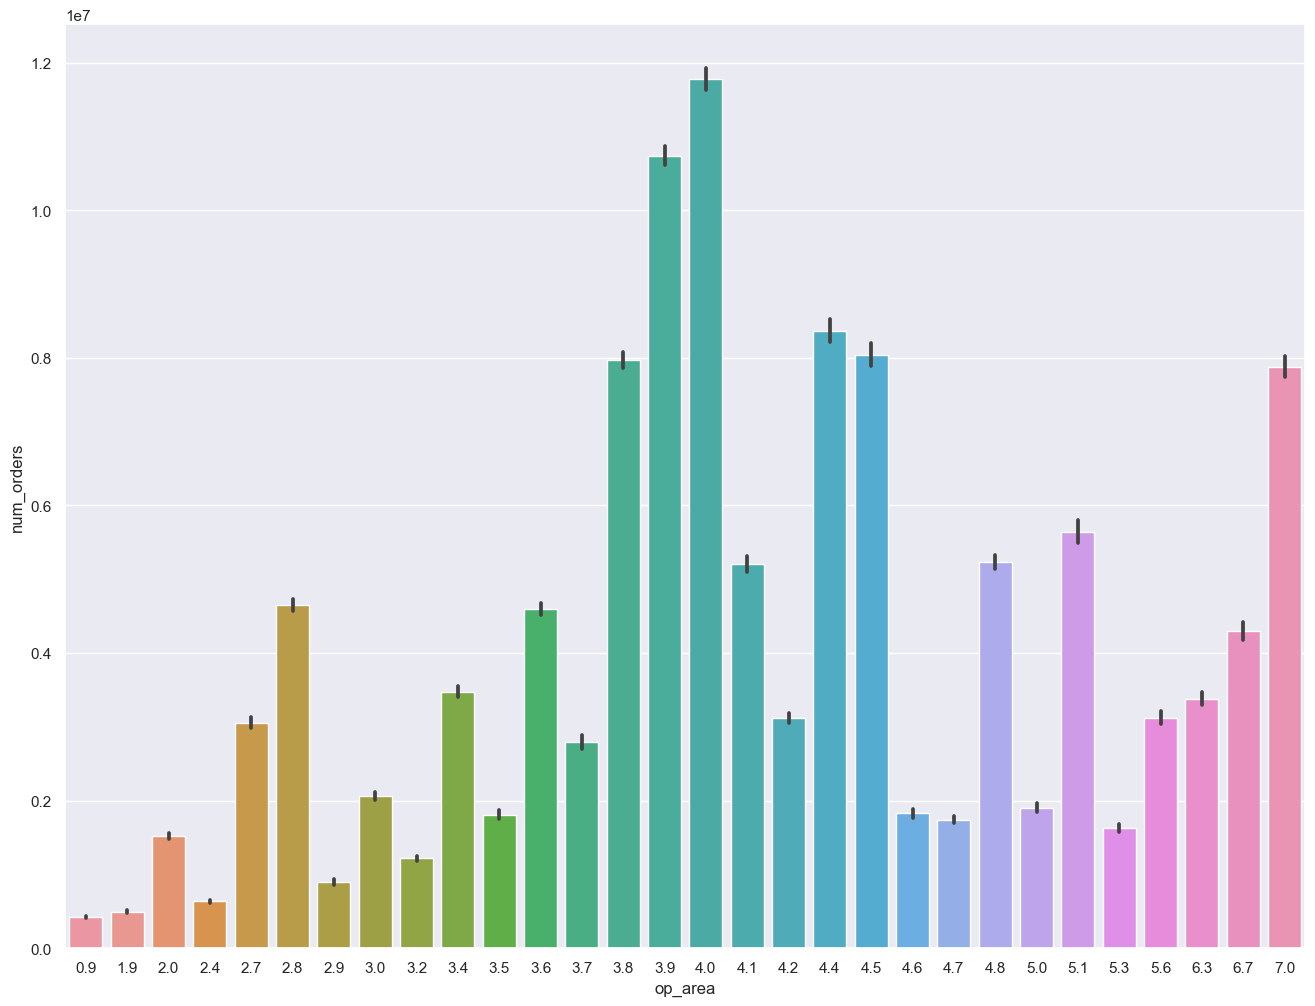

In [49]:
sns.barplot(x="op_area", y="num_orders", data=full_train_data, estimator="sum")

In [50]:
full_train_data['op_area_bin'] = pd.cut(full_train_data['op_area'], [0, 2.4, 3.7, 4.5, 5.1, 6.7, np.inf],
                                        labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'])


<Axes: xlabel='op_area_bin', ylabel='num_orders'>

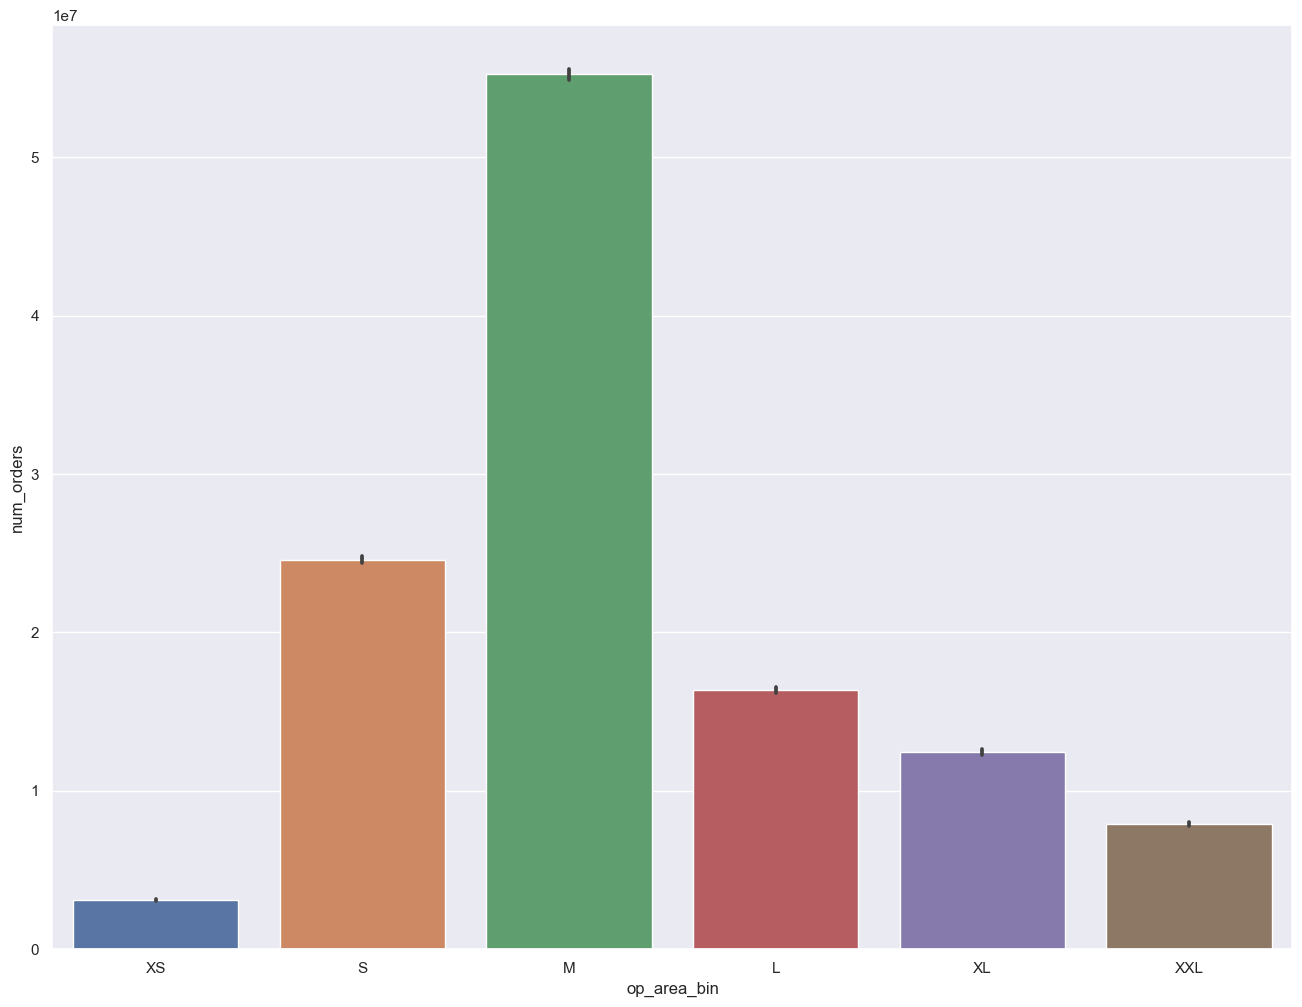

In [51]:
sns.barplot(x="op_area_bin", y="num_orders", data=full_train_data, estimator="sum")

<Axes: xlabel='center_type', ylabel='count'>

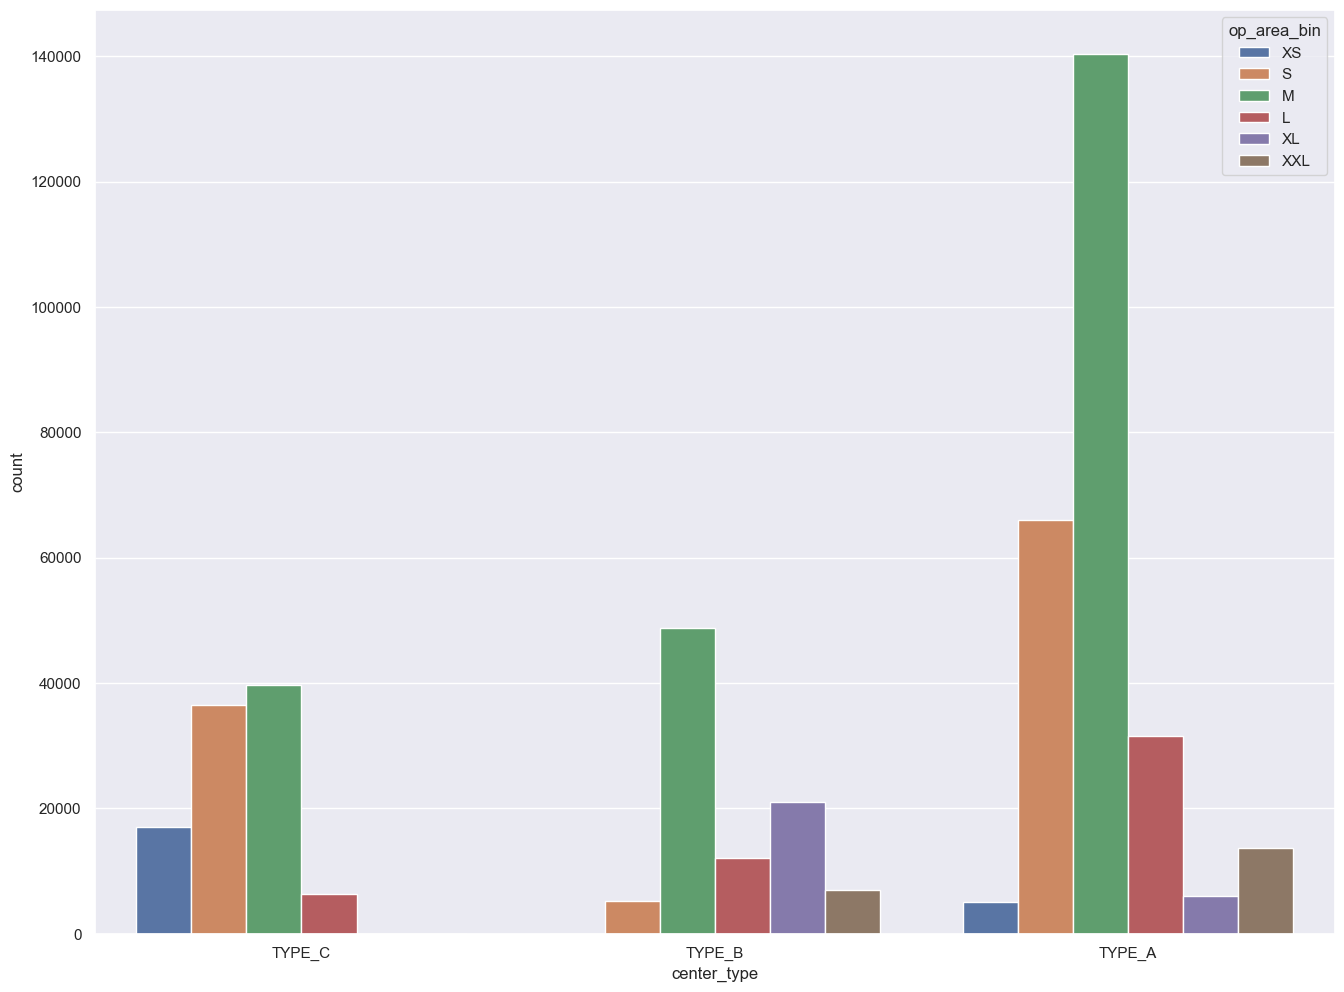

In [52]:
sns.countplot(x="center_type", hue="op_area_bin", data=full_train_data)


<Axes: xlabel='center_type', ylabel='percentage'>

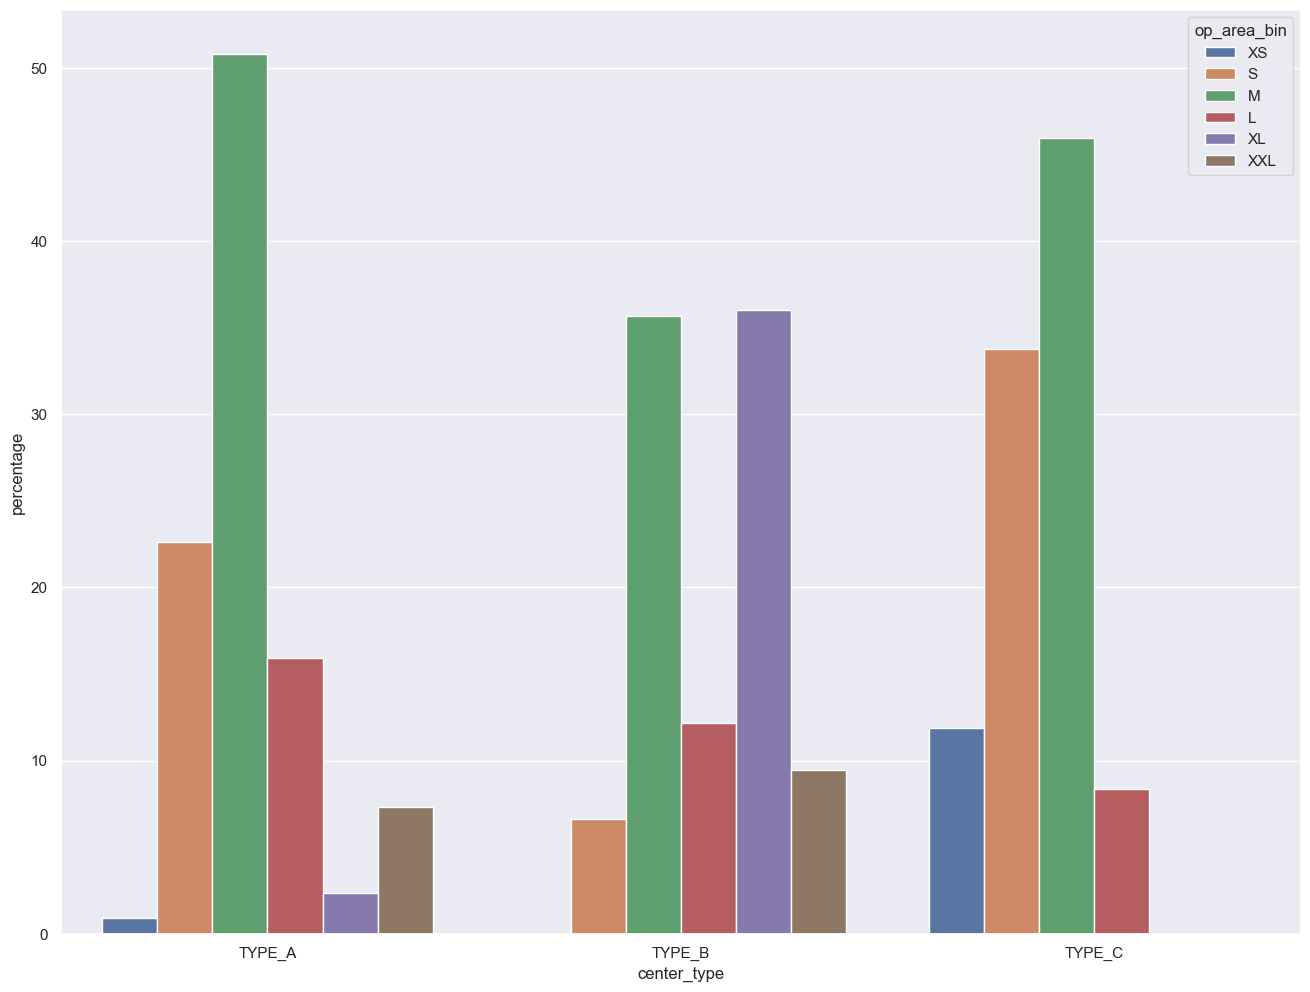

In [53]:
grouped_data_area_bin = full_train_data.groupby(['center_type', 'op_area_bin'])['num_orders'].sum().reset_index()
grouped_data_area_bin = grouped_data_area_bin.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area_bin["percentage"] = grouped_data_area_bin["num_orders"] / grouped_data_area_bin[
    "num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area_bin", data=grouped_data_area_bin)


In [54]:
op_area_bin_encoded = pd.get_dummies(full_train_data['op_area_bin'], prefix='op_area')
op_area_bin_encoded


,op_area_XS,op_area_S,op_area_M,op_area_L,op_area_XL,op_area_XXL
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
456543,0,0,1,0,0,0
456544,0,0,1,0,0,0
456545,0,0,1,0,0,0
456546,0,0,1,0,0,0


In [55]:
full_train_data = pd.concat([full_train_data, op_area_bin_encoded], axis=1)

In [56]:
full_train_data


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,op_area,category,cuisine,op_area_bin,op_area_XS,op_area_S,op_area_M,op_area_L,op_area_XL,op_area_XXL
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,2.0,Beverages,Thai,XS,1,0,0,0,0,0
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,2.0,Beverages,Thai,XS,1,0,0,0,0,0
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,2.0,Beverages,Thai,XS,1,0,0,0,0,0
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,2.0,Beverages,Thai,XS,1,0,0,0,0,0
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,2.0,Beverages,Thai,XS,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,...,4.5,Fish,Continental,M,0,0,1,0,0,0
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,...,4.5,Fish,Continental,M,0,0,1,0,0,0
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,...,4.5,Fish,Continental,M,0,0,1,0,0,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,...,4.5,Fish,Continental,M,0,0,1,0,0,0


In [57]:
new_corrs = full_train_data.corr()
new_corrs['num_orders']


C:\Users\Devy\AppData\Local\Temp\ipykernel_12072\1605709767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_corrs = full_train_data.corr()


id                       0.000702
week                    -0.017210
center_id               -0.053035
meal_id                  0.010597
checkout_price          -0.282108
base_price              -0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
city_code                0.041596
region_code              0.029744
op_area                  0.176976
op_area_XS              -0.069474
op_area_S               -0.047270
op_area_M               -0.052073
op_area_L                0.057123
op_area_XL               0.124863
op_area_XXL              0.065546
Name: num_orders, dtype: float64

Binning the op_area did not give additional insights. Compared to the number of centers in each type all have similar spread of small/medium/large op_areas.

Looking at the correlations of a bin or one hot encoded values with the target is not valid as it will show a linear correlation only (how well it goes up or down with the target). However, a low linear correlation does not mean the bin or encoding is bad. It might still give better results in the ML training if it simplifyies the process for the algorithm without losing too much data.

We should test ML results with the bin or without it. We should also test with a smaller bin size. A larger bin size means losing more data and finesse.

# Let's look at data related to cuisine and category. Which cuisine falls in which category and other things here

<Axes: xlabel='category', ylabel='num_orders'>

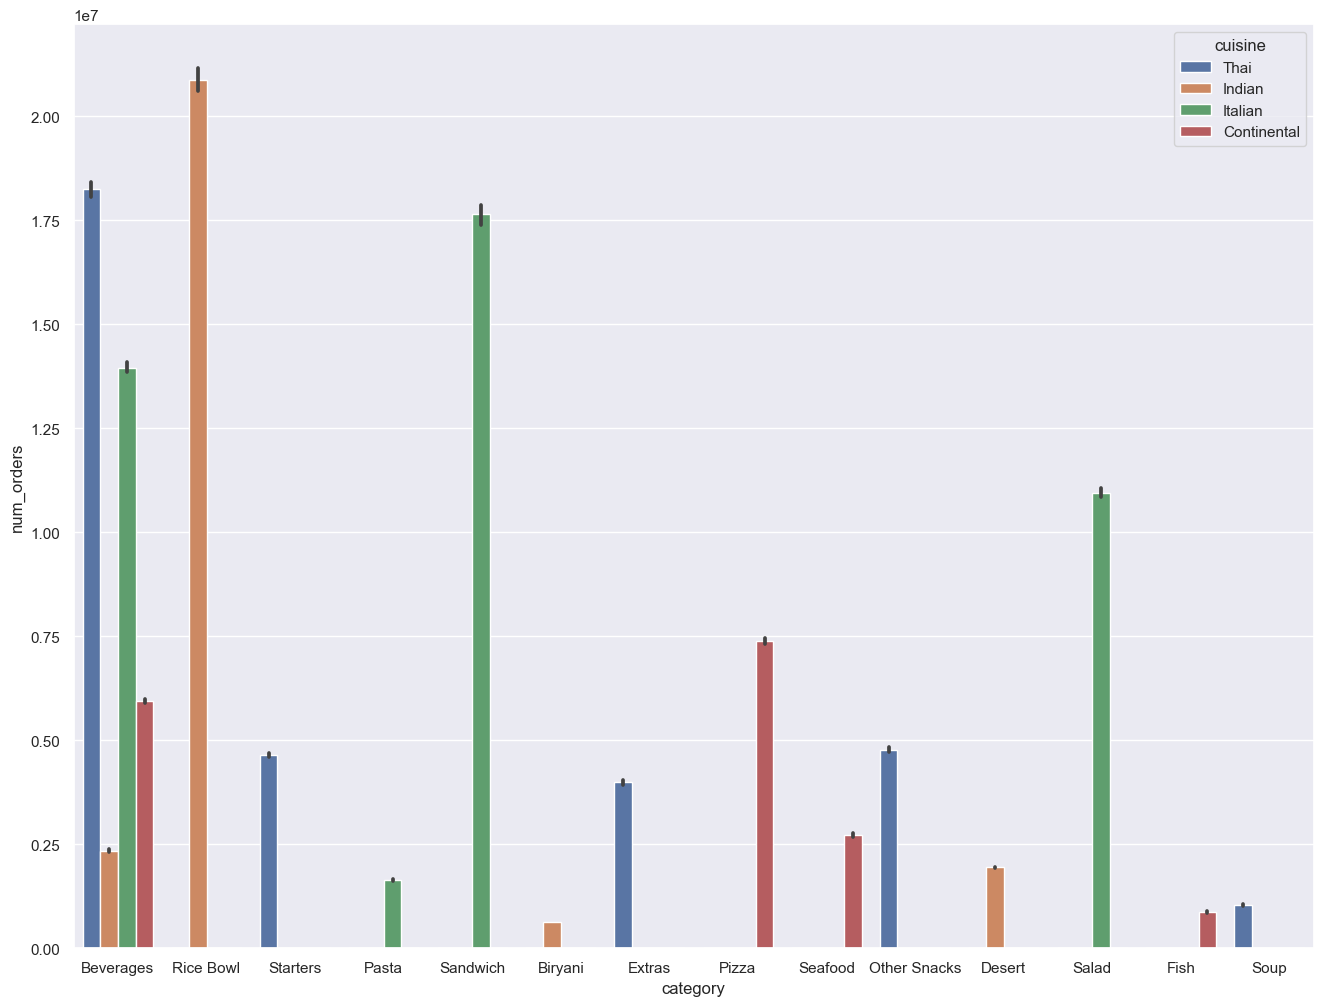

In [58]:
sns.barplot(x="category", y="num_orders", hue="cuisine", data=full_train_data, estimator="sum")


<Axes: xlabel='category', ylabel='count'>

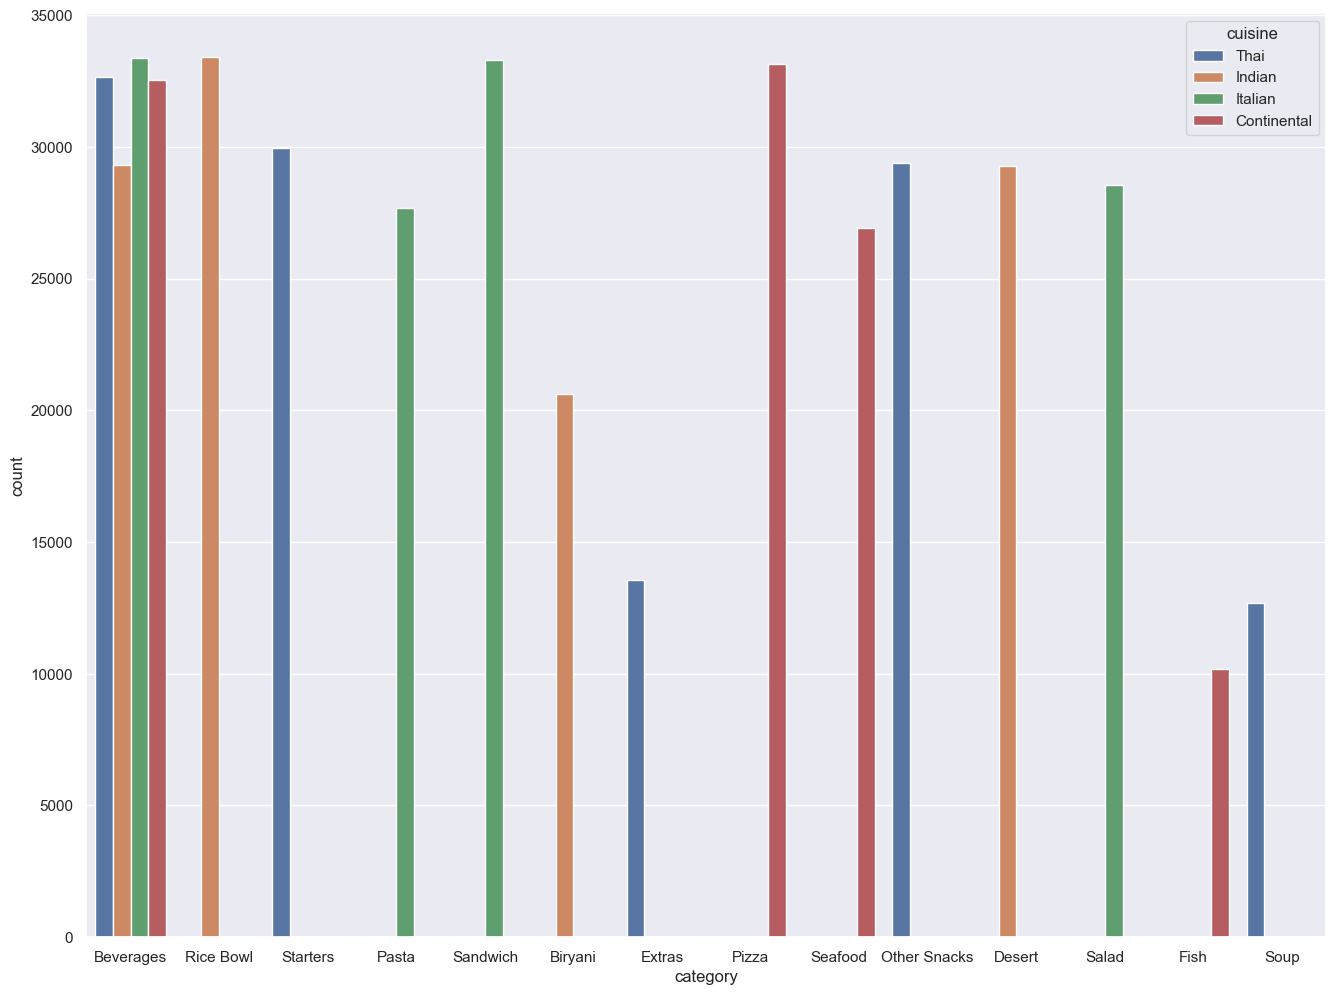

In [59]:
sns.countplot(x="category", hue="cuisine", data=full_train_data)


<Axes: xlabel='category', ylabel='count'>

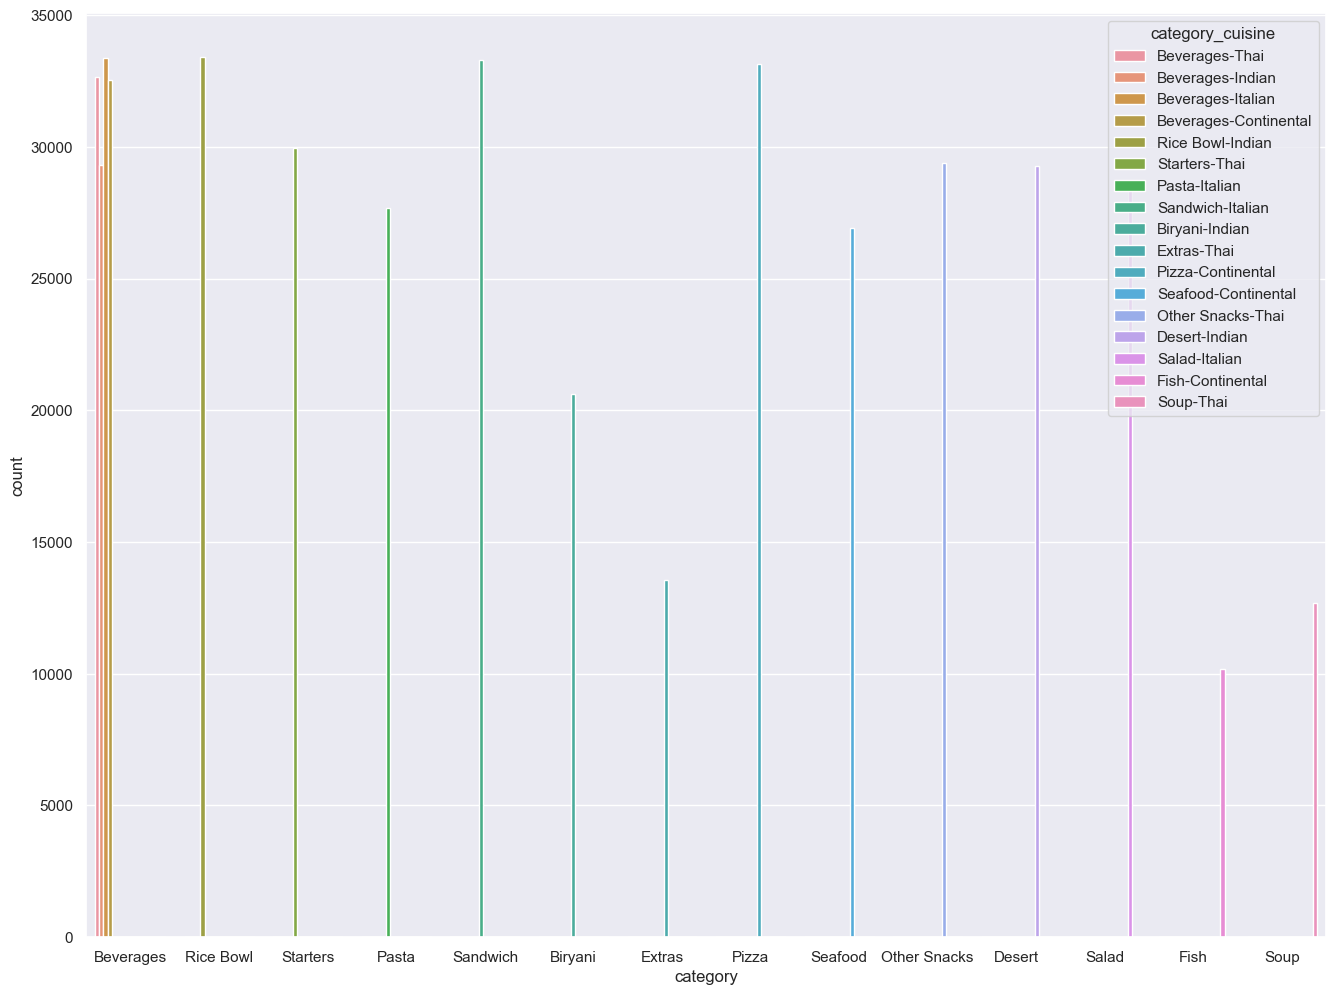

In [60]:
full_train_data["category_cuisine"] = full_train_data['category'] + "-" + full_train_data['cuisine']
sns.countplot(x="category", hue="category_cuisine", data=full_train_data)

OBSERVATIONS:
By looking at the cuisine/category, we can see we only have 4 cuisines.
Beverages category is the only category that has meals from every cuisine.
The rest of the categories only have means from a single cuisine (Pasta category on contains Italian meals, logically).
The cuisine diversity of the beverages category clearly is a factor in the increased sales of beverages as it tells us that almost all centers have beverages regardless of cuisine speciality. However if a center sells only italian food it will sell Pasta and only other italian things.

## Let's check the center type/cuisine connection. We want to understand if certain center or center Types specialize in a cuisine

In [61]:
full_train_data.groupby(["center_id", "cuisine"])["num_orders"].sum()


center_id  cuisine    
10         Continental     393530
           Indian          863869
           Italian        1108967
           Thai           1014652
11         Continental     298545
                           ...   
177        Thai            184868
186        Continental     154099
           Indian          189342
           Italian         318182
           Thai            185359
Name: num_orders, Length: 308, dtype: int64

It is clear from the above, that individual centers do NOT have a speciality. Each center sells food from all the 4 cuisines.
Let's check if there's any relation with center type, although I don't expect there to be one and we believe we'll see the same thing

In [62]:
full_train_data.groupby(["center_type", "cuisine"])["num_orders"].sum()


center_type  cuisine    
TYPE_A       Continental     9874117
             Indian         14512558
             Italian        24778761
             Thai           19813081
TYPE_B       Continental     3559456
             Indian          6944518
             Italian         9939385
             Thai            9552714
TYPE_C       Continental     3480866
             Indian          4335468
             Italian         9454686
             Thai            3311875
Name: num_orders, dtype: int64

<Axes: xlabel='center_type', ylabel='num_orders'>

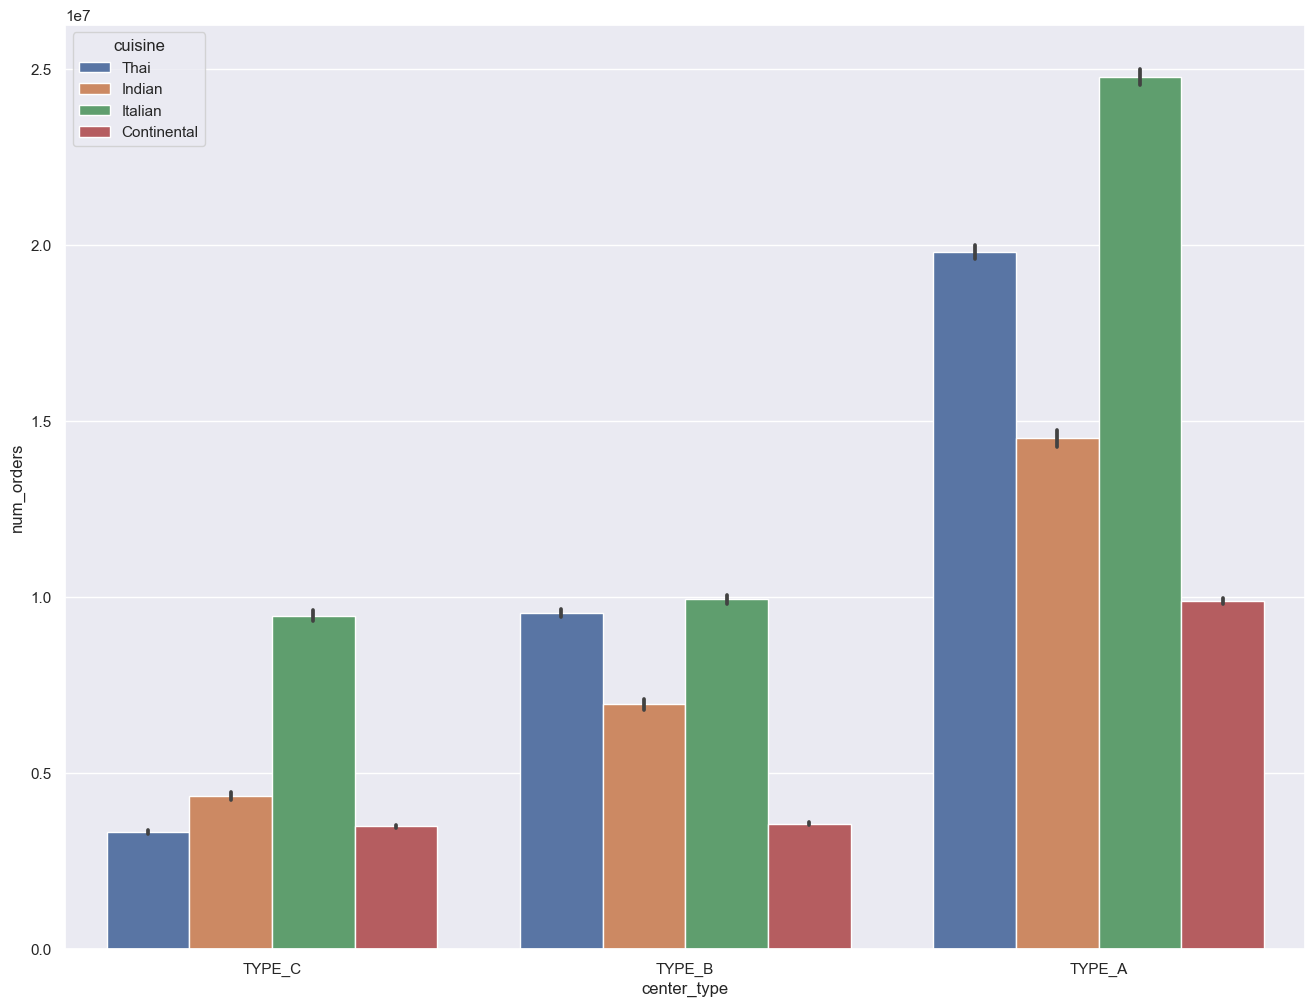

In [63]:
sns.barplot(x="center_type", y="num_orders", hue="cuisine", data=full_train_data, estimator="sum")


<Axes: xlabel='center_type', ylabel='percentage'>

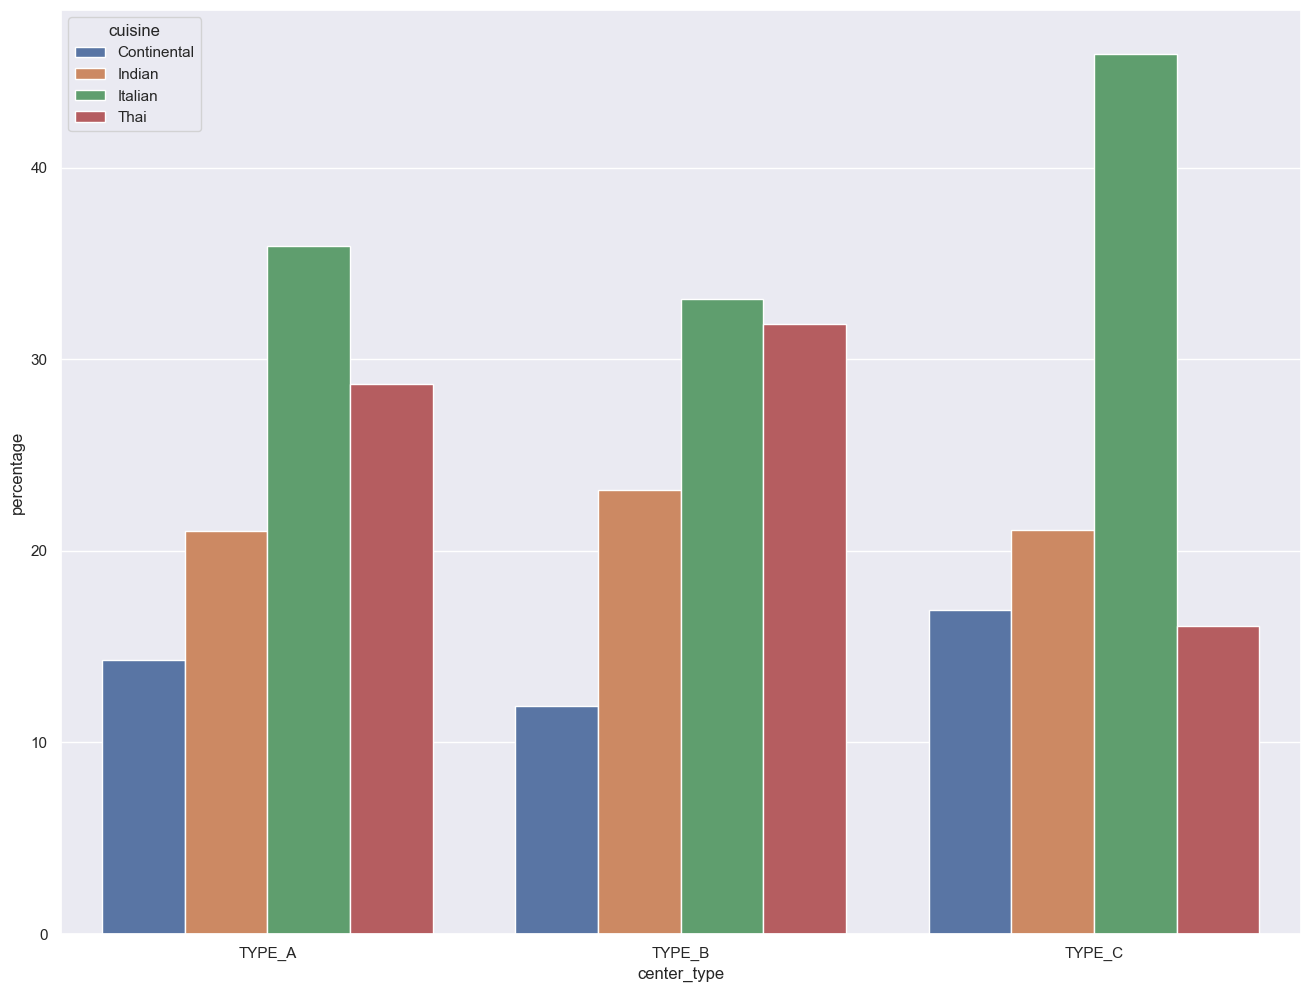

In [64]:
grouped_data_cuisine = full_train_data.groupby(['center_type', 'cuisine'])['num_orders'].sum().reset_index()
grouped_data_cuisine = grouped_data_cuisine.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_cuisine["percentage"] = grouped_data_cuisine["num_orders"] / grouped_data_cuisine["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="cuisine", data=grouped_data_cuisine)


<Axes: xlabel='center_type', ylabel='percentage'>

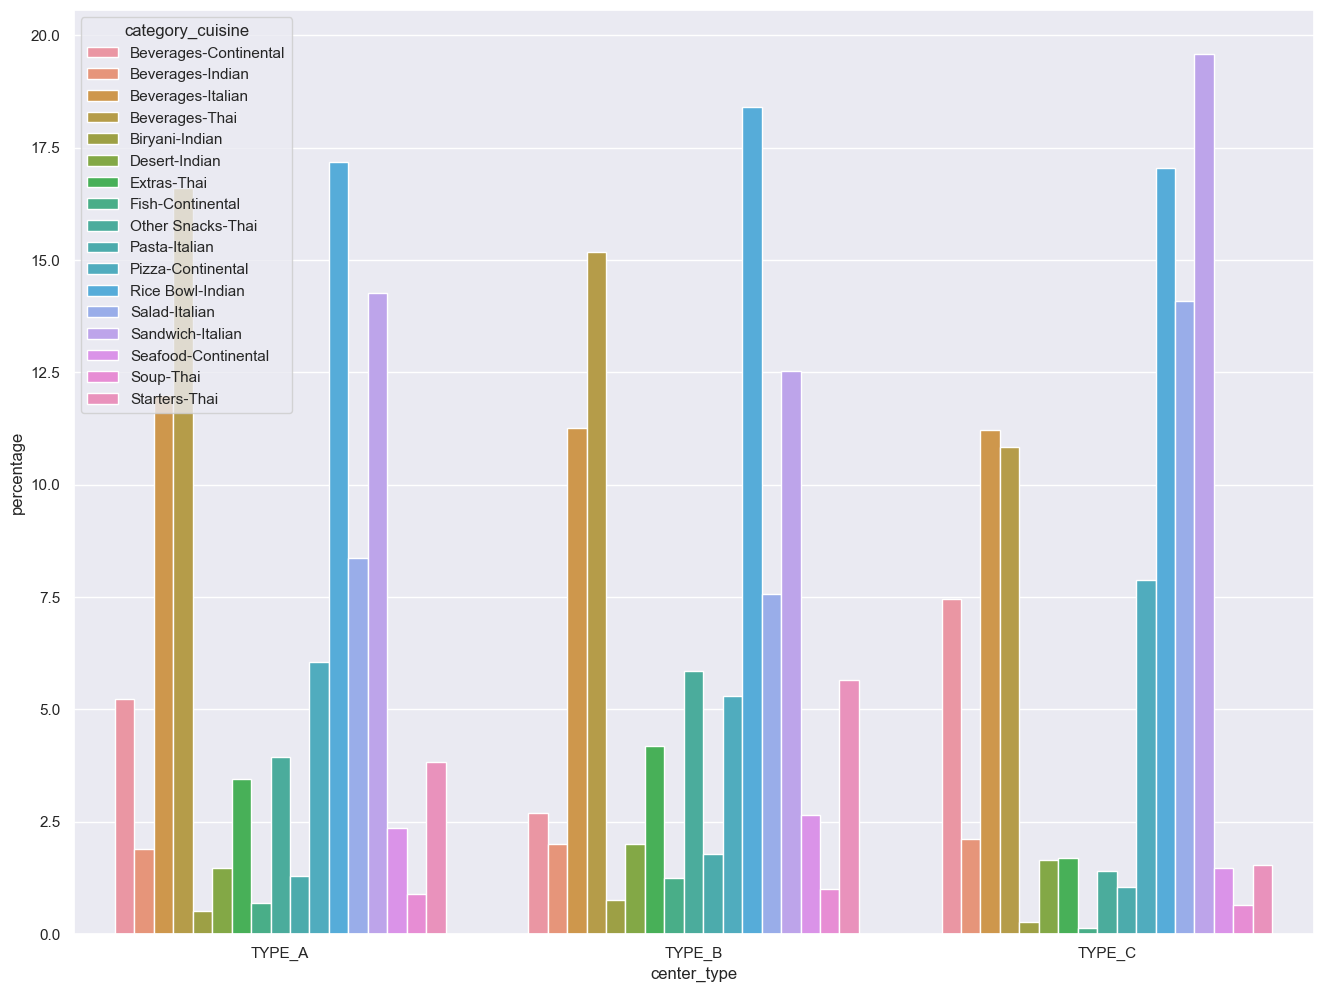

In [65]:
grouped_data_cuisine_cat = full_train_data.groupby(['center_type', 'category_cuisine'])[
    'num_orders'].sum().reset_index()
grouped_data_cuisine_cat = grouped_data_cuisine_cat.merge(total_orders_by_center, on='center_type',
                                                          suffixes=('', '_total'))
grouped_data_cuisine_cat["percentage"] = grouped_data_cuisine_cat["num_orders"] / grouped_data_cuisine_cat[
    "num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="category_cuisine", data=grouped_data_cuisine_cat)

OBSERVATIONS:
When looking at nr of orders, Type A and B are very similar in distribution, however Type C is the outlier.
Compared to the other, Type C sells less Thai meals that the other center types. The reason for this might be location based or preference based. We can also see from an above chart that Type C sells less from Thai specific categories, notably, Type C sells less Thai Beverages, Extras, Other snacks and Starters. However, # of thai soups are fine in Type C.

The created feature category_cuisine should be checked in ML training to see if it gives better results.

# How price impacts the num_orders. Try binning that as well. Investigate price patterns comparted to other features (center type, category, cuisine). Only do these if they're relevant or answer a specific business question.
EX: Are the prices in Type A center higher than type B or C? Does that mean that Type A are "luxury" centers?

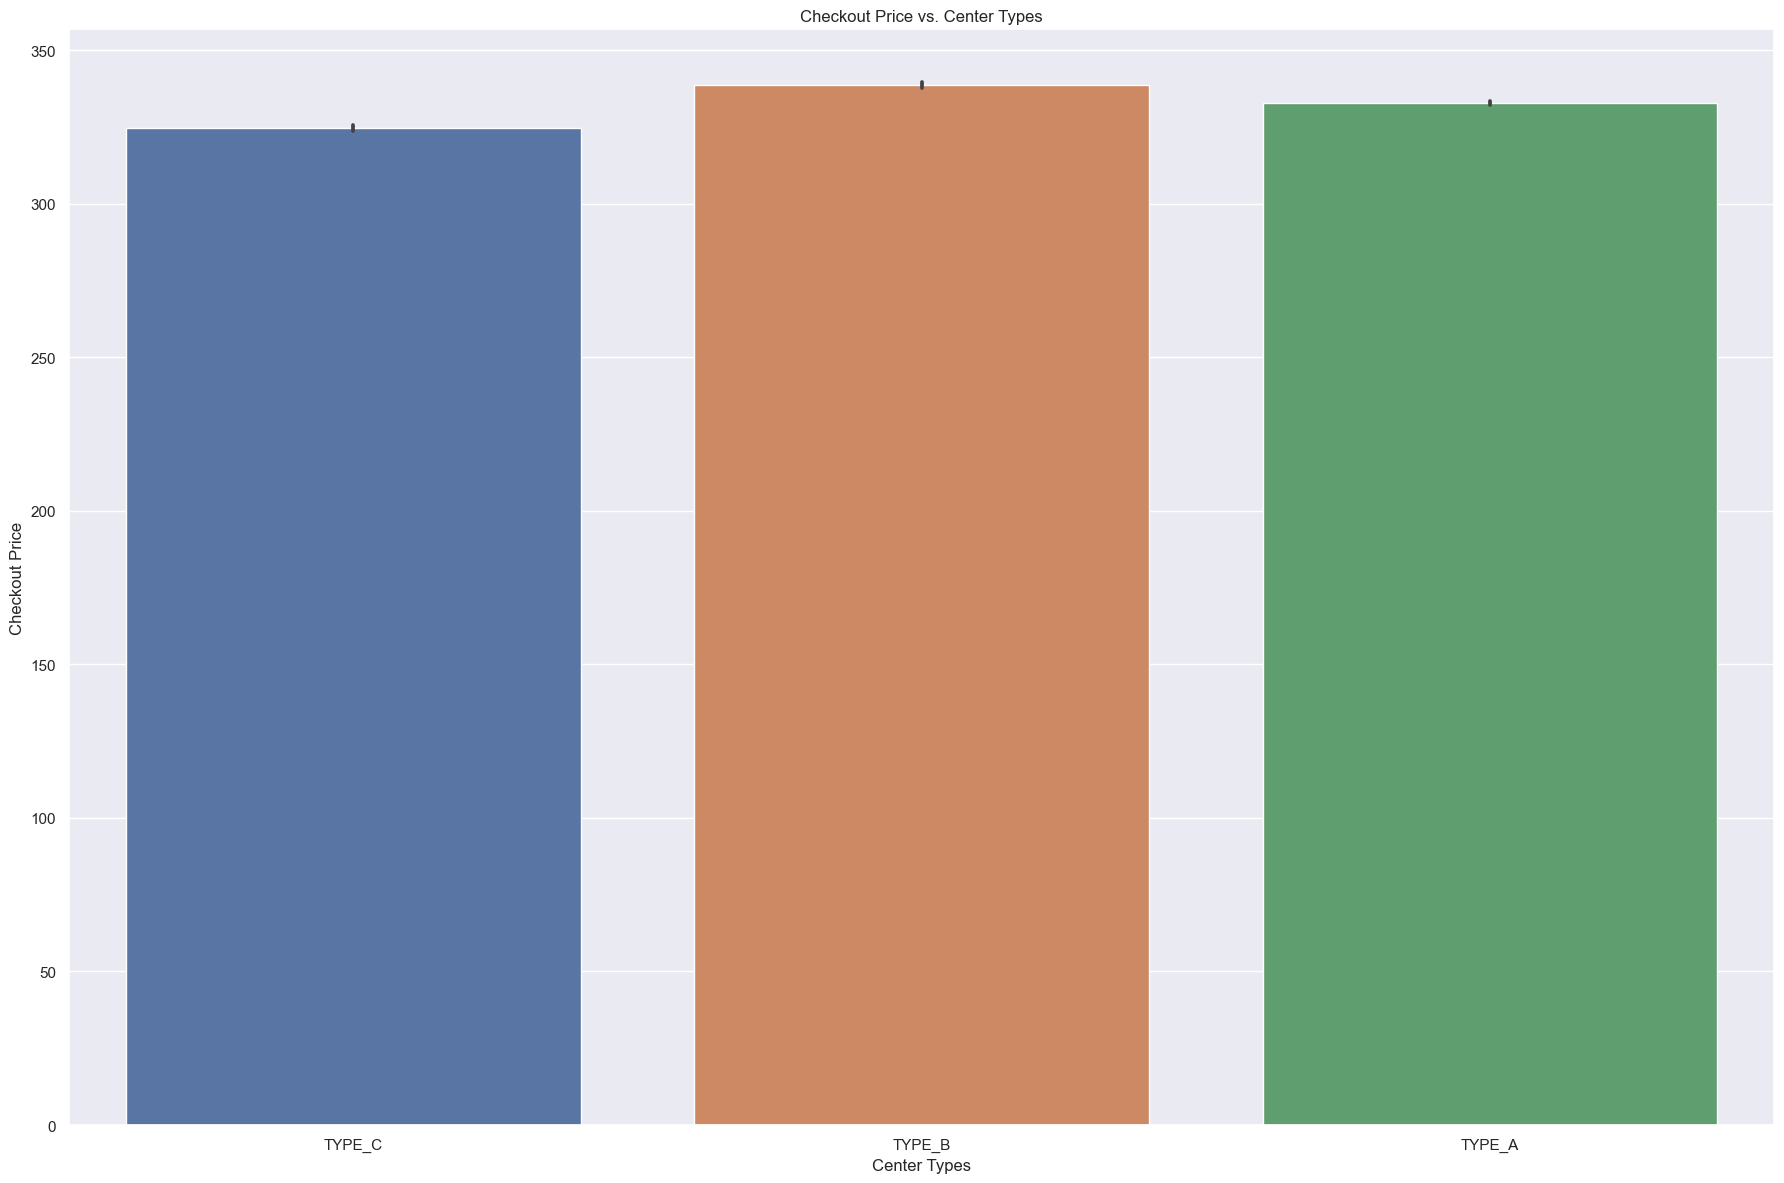

In [66]:
plt.figure(figsize=(18, 12))
sns.barplot(x='center_type', y='checkout_price', data=full_train_data)
plt.title('Checkout Price vs. Center Types')
plt.xlabel('Center Types')
plt.ylabel('Checkout Price')
plt.tight_layout()
plt.show()


#### These average prices per center types do not really vary, they are close to each other, between 320-350.
### Let's see these averages by categories too.


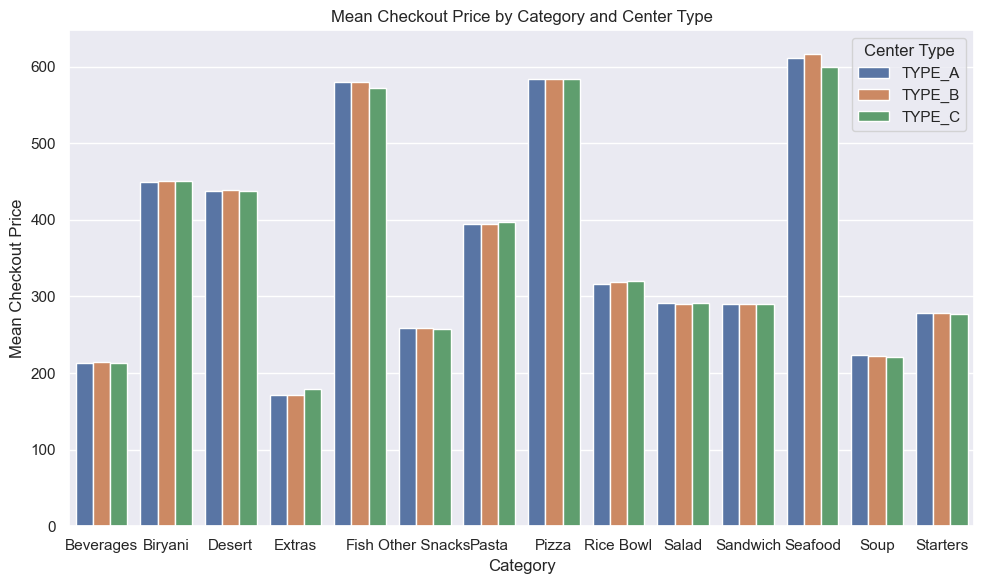

In [67]:
mean_prices = full_train_data.groupby(['center_type', 'category'])['checkout_price'].mean().reset_index()
# Pivot the data to have center types as columns and categories as rows
pivot_table = mean_prices.pivot_table(index='category', columns='center_type', values='checkout_price')

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='checkout_price', hue='center_type', data=mean_prices)
plt.title('Mean Checkout Price by Category and Center Type')
plt.xlabel('Category')
plt.ylabel('Mean Checkout Price')

plt.tight_layout()
plt.legend(title='Center Type')

plt.show()

##### As the averages by types showed that they are similar, the same this is shown here, by categories. Each type center sells each product with almost the same average price. Foods like Seafood, Fish and Pizza are the most expensive categories, while the Soups, Beverages and Extras as the least expensive.

###### Let's see the minimum/maximum checkout price for each center type.

In [68]:
#max price for each center type
max_prices = full_train_data.groupby('center_type')['checkout_price'].max()

#min price for each center type
min_prices = full_train_data.groupby('center_type')['checkout_price'].min()

max_prices, min_prices

(center_type
 TYPE_A    866.27
 TYPE_B    767.33
 TYPE_C    767.33
 Name: checkout_price, dtype: float64,
 center_type
 TYPE_A     2.97
 TYPE_B    53.41
 TYPE_C    45.62
 Name: checkout_price, dtype: float64)

#### The maximum checkout prices are close to each other, only Type A has a higher one, while on the other hand, looking at the minimum prices, Type A has a very very low lowest price, compared to B and C.  This means that center type A which sells the most and have the most centers does not mean that it also have very expensive products compared to types B and C.

#### Maybe seeing the frequency of the checkout prices split into bins can give us relevant info.

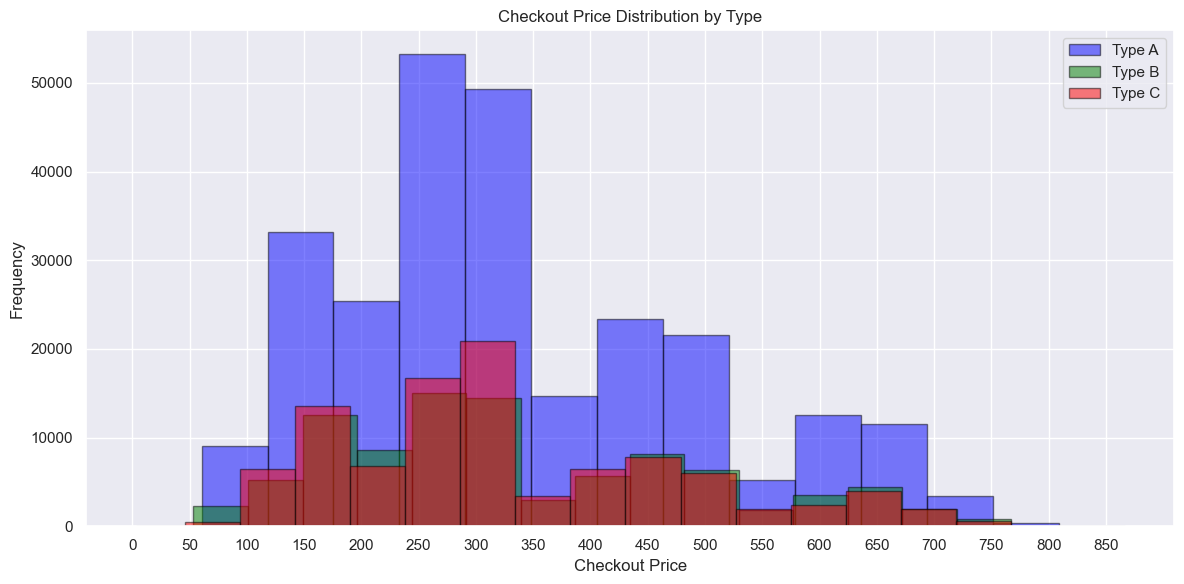

In [69]:
# Separate data by type
type_a_data = full_train_data[full_train_data['center_type'] == 'TYPE_A']
type_b_data = full_train_data[full_train_data['center_type'] == 'TYPE_B']
type_c_data = full_train_data[full_train_data['center_type'] == 'TYPE_C']

# Create histograms for each type
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.hist(type_a_data['checkout_price'], bins=15, color='blue', alpha=0.5, label='Type A', edgecolor='black')
plt.hist(type_b_data['checkout_price'], bins=15, color='green', alpha=0.5, label='Type B', edgecolor='black')
plt.hist(type_c_data['checkout_price'], bins=15, color='red', alpha=0.5, label='Type C', edgecolor='black')

plt.title('Checkout Price Distribution by Type')
plt.xlabel('Checkout Price')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.xticks(range(0, 900, 50))
plt.show()

#### This plot can show the frequency of the checkout prices and how they are spread along the three types of centers and as we already know, type A sells most and have most center, therefore it has the highest frequency. Although, all three centers have a similar structure, Types B and C are almost identical, but the "shape" is similar. The highest peaks for all are encountered at prices between 250-350. There is a tendency for the center types to sell products with smaller price (till 350), rather than the ones from 400 and so on.

### Let's see all the previous plots, but for the base price. In this way, we can follow up if there are trends for ordering more when certain discounts are applied or products are promoted via email/webpage.

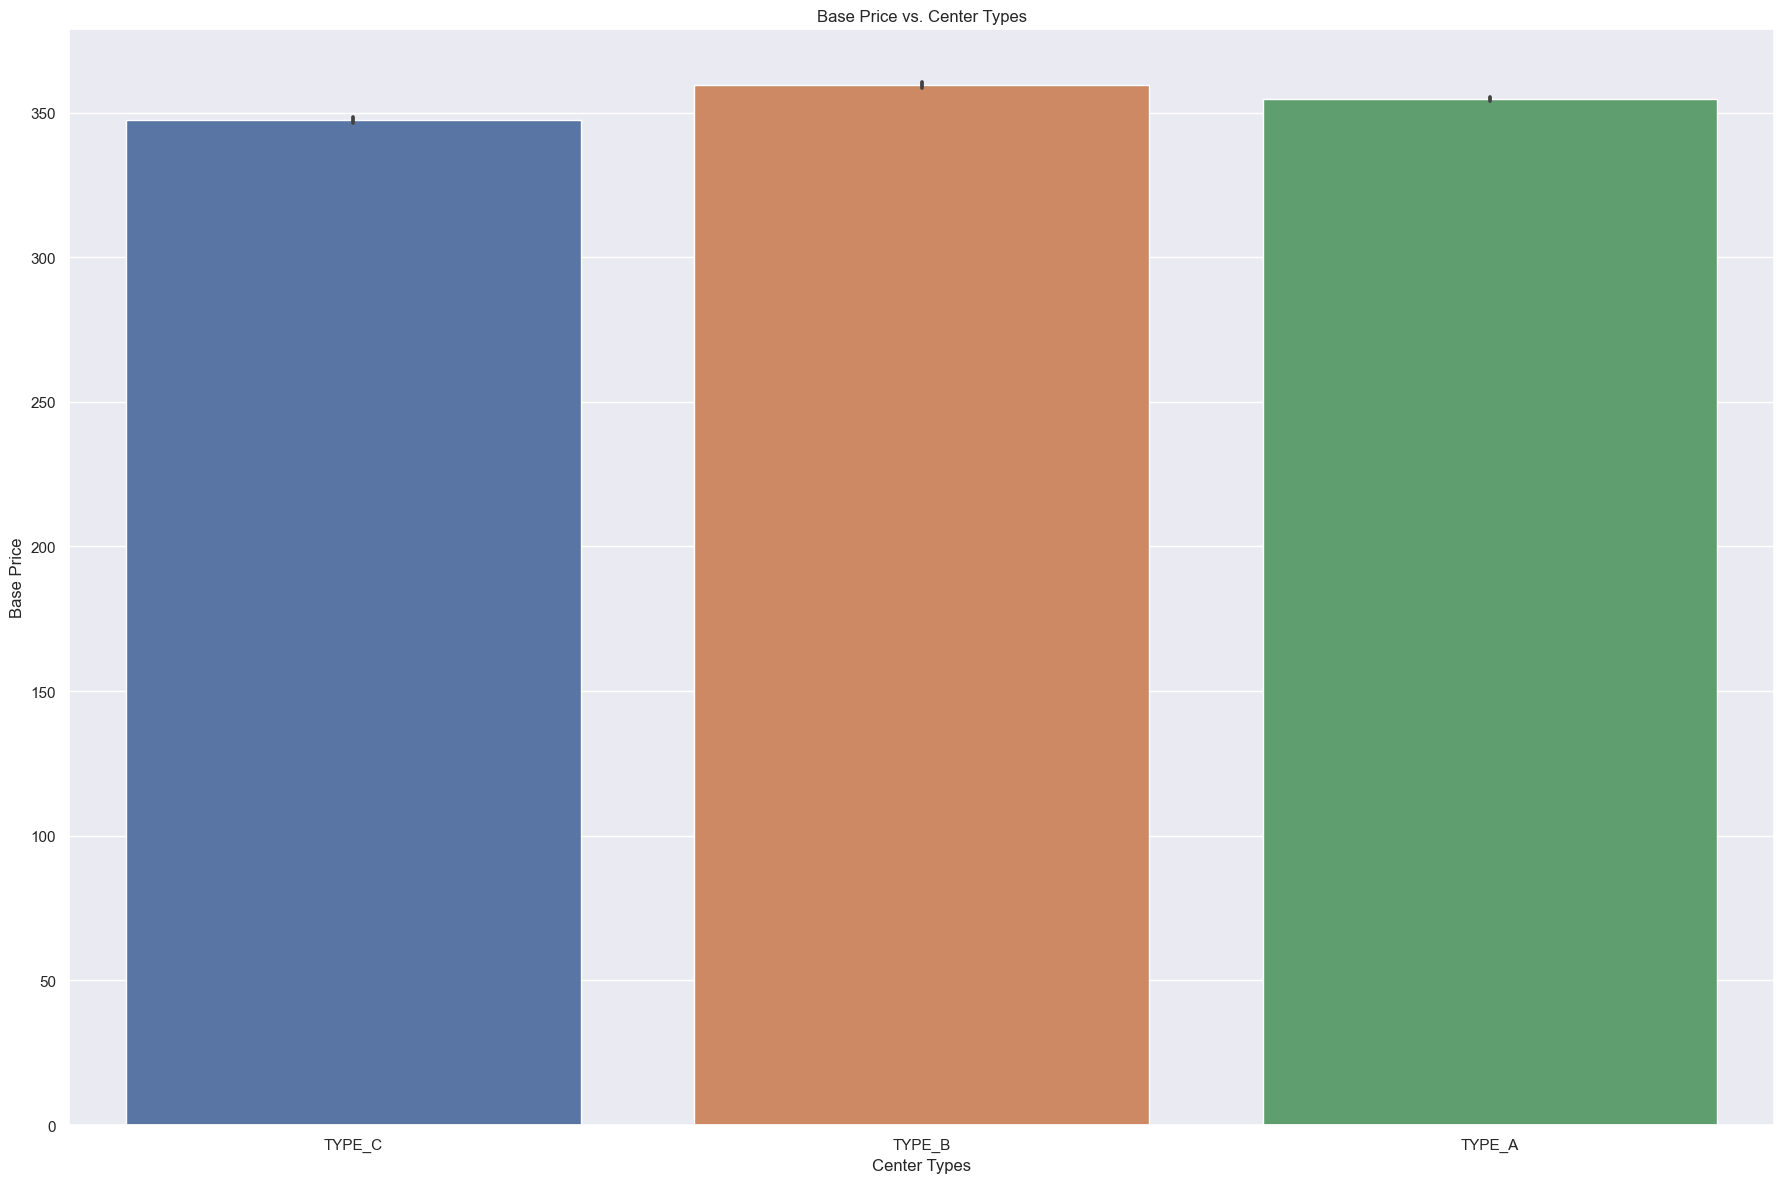

In [70]:
plt.figure(figsize=(18, 12))
sns.barplot(x='center_type', y='base_price', data=full_train_data)
plt.title('Base Price vs. Center Types')
plt.xlabel('Center Types')
plt.ylabel('Base Price')
plt.tight_layout()
plt.show()


#### The situation is similar to the checkout price plot, where Type B has the highest base price, followed by Type A and Type C, but all three of them are close, being situated between 340 and 360. (this range for checkout price was 320-250)

### Averages by categories:

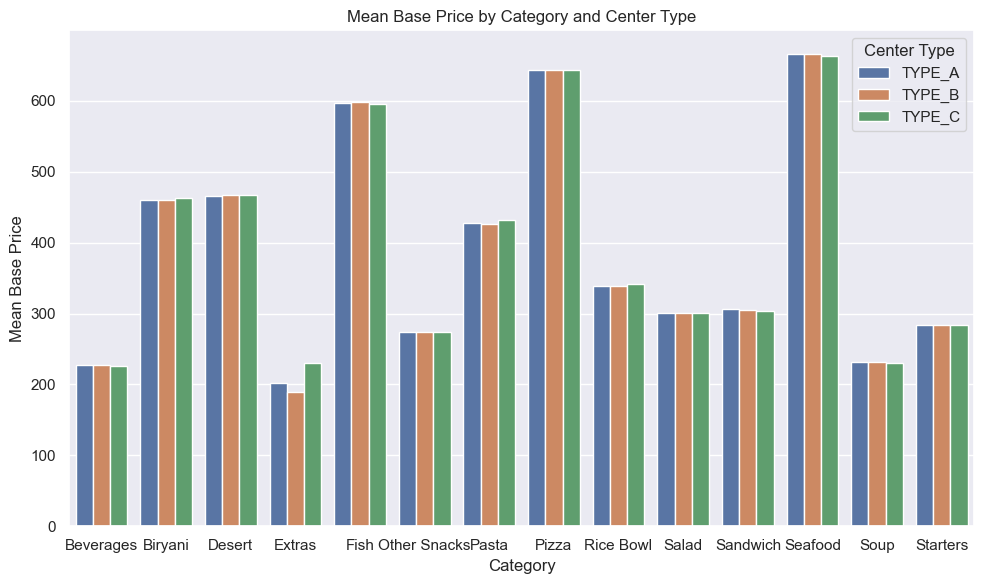

In [71]:
mean_prices = full_train_data.groupby(['center_type', 'category'])['base_price'].mean().reset_index()
# Pivot the data to have center types as columns and categories as rows
pivot_table = mean_prices.pivot_table(index='category', columns='center_type', values='base_price')

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='base_price', hue='center_type', data=mean_prices)
plt.title('Mean Base Price by Category and Center Type')
plt.xlabel('Category')
plt.ylabel('Mean Base Price')

plt.tight_layout()
plt.legend(title='Center Type')

plt.show()

##### Again, these bars are similar to the ones created for checkout prices, the only thing to be mentioned here would be that pizza seems to have a higher discount than the other categories, because it has the highest difference between the checkout price and base price.

### Here are the minimum/maximum prices for base prices, for each type of center:

In [72]:
#max price for each center type
max_prices = full_train_data.groupby('center_type')['base_price'].max()

#min price for each center type
min_prices = full_train_data.groupby('center_type')['base_price'].min()

max_prices, min_prices

(center_type
 TYPE_A    866.27
 TYPE_B    767.33
 TYPE_C    767.33
 Name: base_price, dtype: float64,
 center_type
 TYPE_A    65.02
 TYPE_B    84.39
 TYPE_C    55.35
 Name: base_price, dtype: float64)

#####   So, the maximum prices are identical to the ones for checkout price, but, the minimum checkout prices are way different than the minimum base prices:   Checkout_price_ Type A = 2.97   and  Base_price_Type A = 65.02  (biggest discounts, wow, maybe Type A give the best discounts, we should definetely investigate that), Checkout_price_Type B = 53.41 and Base_price_Type B = 84.39 (again, here it can be observed that it offers big discounts), Checkout_price_Type C = 55.35 and Base_price_Type C = 45.62 (smaller price difference) 

### Let's create a new column to compare the checkout price to the base price, and if the checkout price is smaller, it means that there is a discount applied. 

In [73]:
full_train_data['is_discount'] = (full_train_data['checkout_price'] < full_train_data['base_price']).astype(int)

In [74]:
full_train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,cuisine,op_area_bin,op_area_XS,op_area_S,op_area_M,op_area_L,op_area_XL,op_area_XXL,category_cuisine,is_discount
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,Thai,XS,1,0,0,0,0,0,Beverages-Thai,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,Thai,XS,1,0,0,0,0,0,Beverages-Thai,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,Thai,XS,1,0,0,0,0,0,Beverages-Thai,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,Thai,XS,1,0,0,0,0,0,Beverages-Thai,0
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,Thai,XS,1,0,0,0,0,0,Beverages-Thai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,...,Continental,M,0,0,1,0,0,0,Fish-Continental,1
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,...,Continental,M,0,0,1,0,0,0,Fish-Continental,1
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,...,Continental,M,0,0,1,0,0,0,Fish-Continental,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,...,Continental,M,0,0,1,0,0,0,Fish-Continental,0


##### How many values have discounts?  

In [75]:
full_train_data['is_discount'].value_counts()

1    229687
0    226861
Name: is_discount, dtype: int64

#### 50% of them have discounts!

##### But how are they distributed along center types? 

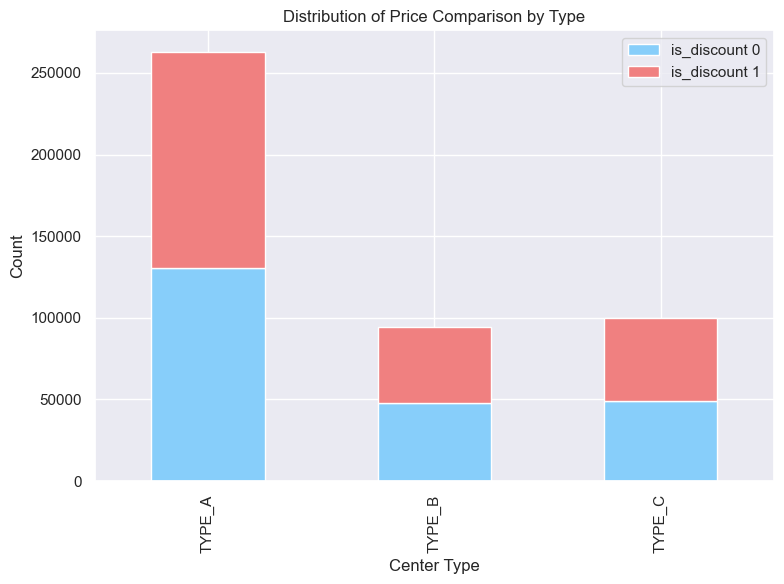

In [76]:
grouped_data = full_train_data.groupby(['center_type', 'is_discount']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', figsize=(8, 6), stacked=True, color=['lightskyblue', 'lightcoral'])
plt.title('Distribution of Price Comparison by Type')
plt.xlabel('Center Type')
plt.ylabel('Count')
plt.legend(['is_discount 0', 'is_discount 1'])
plt.tight_layout()
plt.show()

#### Looks like they all have about 50% discounts and 50% without discounts, at different scales, becauze A sells the most and have the most number of center.

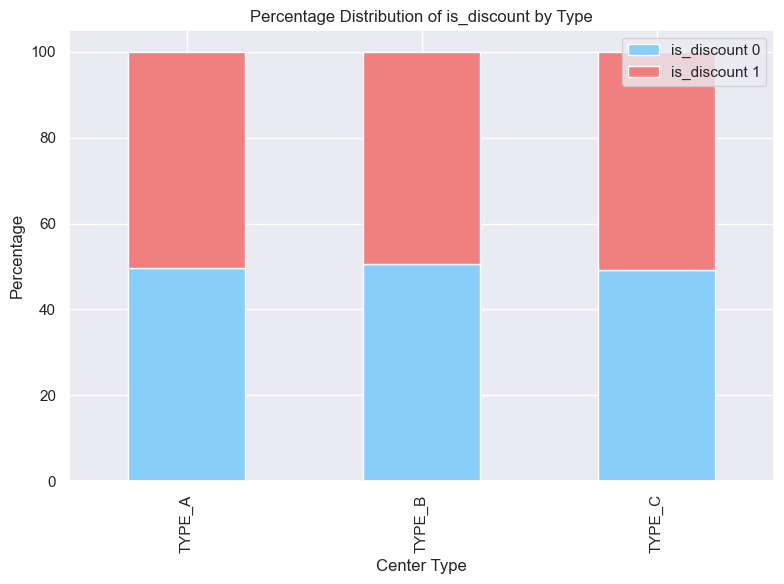

In [77]:
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind='bar', figsize=(8, 6), stacked=True, color=['lightskyblue', 'lightcoral'])

plt.title('Percentage Distribution of is_discount by Type')
plt.xlabel('Center Type')
plt.ylabel('Percentage')
plt.legend(['is_discount 0', 'is_discount 1'], loc='upper right')

plt.tight_layout()
plt.show()

##### Analyzing the percentages, they are totally similar, aroung 50% discount, 50% non-discount for all center types. Let's see what is the average discount per center type by first introducting a new column in the dataset that calculcates the difference between base price and checkout price, then where this difference is positive, or when is_discount column is equal to one, the data is grouped and mean() function applied.

In [78]:
full_train_data['discount_value'] = full_train_data['base_price'] - full_train_data['checkout_price']


In [79]:
full_train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,op_area_bin,op_area_XS,op_area_S,op_area_M,op_area_L,op_area_XL,op_area_XXL,category_cuisine,is_discount,discount_value
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,XS,1,0,0,0,0,0,Beverages-Thai,1,15.46
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,XS,1,0,0,0,0,0,Beverages-Thai,1,16.46
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,XS,1,0,0,0,0,0,Beverages-Thai,1,1.00
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,XS,1,0,0,0,0,0,Beverages-Thai,0,-1.00
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,XS,1,0,0,0,0,0,Beverages-Thai,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,...,M,0,0,1,0,0,0,Fish-Continental,1,47.50
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,...,M,0,0,1,0,0,0,Fish-Continental,1,1.00
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,...,M,0,0,1,0,0,0,Fish-Continental,0,-2.00
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,...,M,0,0,1,0,0,0,Fish-Continental,0,-1.00


In [80]:
average_discount_by_type = full_train_data[full_train_data['is_discount'] == 1].groupby('center_type')[
    'discount_value'].mean()

In [81]:
average_discount_by_type

center_type
TYPE_A    44.465339
TYPE_B    43.183547
TYPE_C    45.814424
Name: discount_value, dtype: float64

##### Again, nothing very special, Type A did not give higher discounts than the other two center types, they are similar. 

### Let's analyze the emailer_for_promotion and homepage_featured, maybe we can found interesting insights related to them.

In [82]:
full_train_data['emailer_for_promotion'].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [83]:
full_train_data['homepage_featured'].value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

#### We observed earlier that ~50% of the total orders have discounts. Now, 8% were promoted via email and almost 11% on homepage.

In [84]:
promotion_email = full_train_data[(full_train_data['emailer_for_promotion'] == 1)].groupby(['center_type'])[
    'is_discount'].count()

In [85]:
promotion_email

center_type
TYPE_A    21146
TYPE_B     7379
TYPE_C     8525
Name: is_discount, dtype: int64

In [86]:
promotion_homepage = full_train_data[(full_train_data['homepage_featured'] == 1)].groupby(['center_type'])[
    'is_discount'].count()

In [87]:
promotion_homepage

center_type
TYPE_A    30398
TYPE_B    10381
TYPE_C     9076
Name: is_discount, dtype: int64

##### Looks like Type A is more promoted via email and homepage than the others. It's like 3x more promoted. Maybe it has to do with the fact that there are more centers? 

In [88]:
promotion_email = \
    full_train_data[(full_train_data['is_discount']) == 1 & (full_train_data['emailer_for_promotion'] == 1)].groupby(
        ['center_type'])['discount_value'].count()

In [89]:
promotion_email

center_type
TYPE_A    150133
TYPE_B     54484
TYPE_C     56938
Name: discount_value, dtype: int64

####  Is there an effect of Email Promotions on  nr of orders? We have to calculate the average number of orders for items that were promoted through email ("emailer_for_promotion" = 1) compared to items that were not and to take conclusions about the volumes on days when emails were sent compared to when they are not.


In [90]:
average_orders_with_promotion = full_train_data[full_train_data['emailer_for_promotion'] == 1]['num_orders'].mean()
average_orders_without_promotion = full_train_data[full_train_data['emailer_for_promotion'] == 0]['num_orders'].mean()

print("Average Orders with Email Promotion:", average_orders_with_promotion)
print("Average Orders without Email Promotion:", average_orders_without_promotion)

Average Orders with Email Promotion: 631.0975438596491
Average Orders without Email Promotion: 229.26288325570087


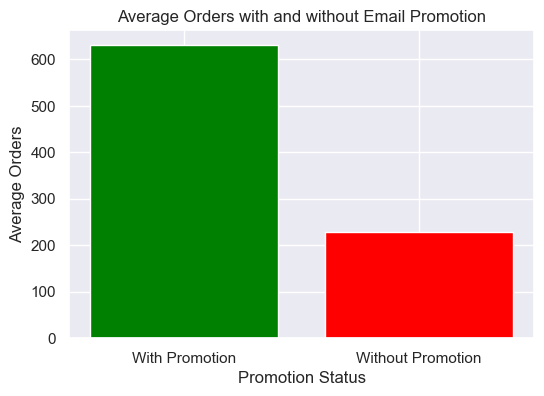

In [91]:
labels = ['With Promotion', 'Without Promotion']
average_orders = [average_orders_with_promotion, average_orders_without_promotion]
plt.figure(figsize=(6, 4))
plt.bar(labels, average_orders, color=['green', 'red'])
plt.title('Average Orders with and without Email Promotion')
plt.xlabel('Promotion Status')
plt.ylabel('Average Orders')
plt.show()

##### Interesting, we can clearly tell that the emails with promotions did a great job by generating a triple number of orders! 

#### But what is the effect of Homepage Featured on nr of orders? We have to calculate the average number of orders for items that were featured on the homepage ("homepage_featured" = 1) compared to items that were not and analyze whether featuring items on the homepage influences customers to order more.

In [92]:
# Calculate the average number of orders for homepage featured items and non-featured items
average_orders_featured = full_train_data[full_train_data['homepage_featured'] == 1]['num_orders'].mean()
average_orders_non_featured = full_train_data[full_train_data['homepage_featured'] == 0]['num_orders'].mean()

print("Average Orders with Homepage Featured Items:", average_orders_featured)
print("Average Orders without Homepage Featured Items:", average_orders_non_featured)

Average Orders with Homepage Featured Items: 594.8847858790492
Average Orders without Homepage Featured Items: 221.05004020231476


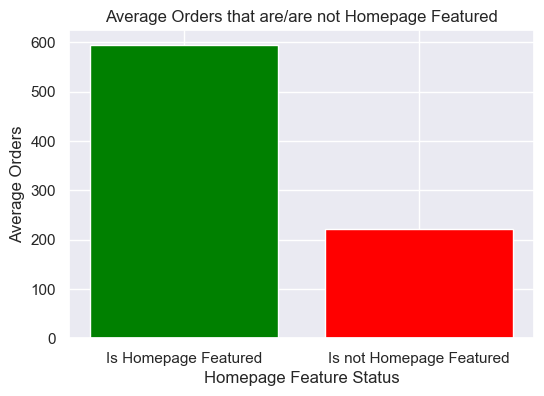

In [93]:
labels = ['Is Homepage Featured', 'Is not Homepage Featured']
average_orders = [average_orders_featured, average_orders_non_featured]
plt.figure(figsize=(6, 4))
plt.bar(labels, average_orders, color=['green', 'red'])
plt.title('Average Orders that are/are not Homepage Featured')
plt.xlabel('Homepage Feature Status')
plt.ylabel('Average Orders')
plt.show()

##### Hmm, again, almost 3x more orders with homepage featured, just like email promotions. 

### Let's create a more visual plot to see different combinations:
- email + homepage
- only email, not homepage
- not email, only homepage
- none

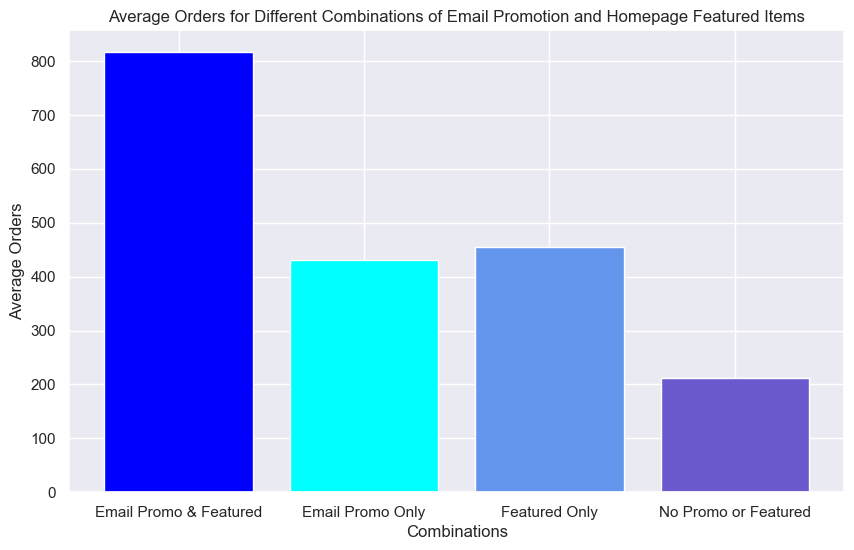

In [94]:
average_orders_with_email_promo_and_featured = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 1) & (full_train_data['homepage_featured'] == 1)][
        'num_orders'].mean()
average_orders_with_email_promo_only = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 1) & (full_train_data['homepage_featured'] == 0)][
        'num_orders'].mean()
average_orders_with_featured_only = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 0) & (full_train_data['homepage_featured'] == 1)][
        'num_orders'].mean()
average_orders_without_promo_or_featured = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 0) & (full_train_data['homepage_featured'] == 0)][
        'num_orders'].mean()

labels = ['Email Promo & Featured', 'Email Promo Only', 'Featured Only', 'No Promo or Featured']

average_orders = [average_orders_with_email_promo_and_featured, average_orders_with_email_promo_only,
                  average_orders_with_featured_only, average_orders_without_promo_or_featured]

plt.figure(figsize=(10, 6))
plt.bar(labels, average_orders, color=['blue', 'cyan', 'cornflowerblue', 'slateblue'])
plt.title('Average Orders for Different Combinations of Email Promotion and Homepage Featured Items')
plt.xlabel('Combinations')
plt.ylabel('Average Orders')
plt.show()

#### Emails and being Homepage Featured bring the most number of orders. Without being promoted, orders are not generated so much as having at least email or homepage featured. In the following scenarios, the discounts will be analyzed. 

### Are promoted items more likely to have discounts? How are the checkout prices spread here? Are the items with big discounts cheap? We will investigate whether email promotions or homepage featured items correlate with specific discount levels and checkout price ranges. 

In [95]:
# Create labels for different scenarios
scenario_labels = []

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        scenario_labels.append(f"Email Promo: {email_promo}, Featured: {homepage_featured}")

In [96]:
scenario_labels

['Email Promo: 0, Featured: 0',
 'Email Promo: 0, Featured: 1',
 'Email Promo: 1, Featured: 0',
 'Email Promo: 1, Featured: 1']

In [97]:
average_checkout_prices = []
average_discounts = []

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        average_checkout_price = full_train_data[(full_train_data['emailer_for_promotion'] == email_promo) & (
                full_train_data['homepage_featured'] == homepage_featured)]['checkout_price'].mean()
        average_discount = full_train_data[(full_train_data['emailer_for_promotion'] == email_promo) & (
                full_train_data['homepage_featured'] == homepage_featured)]['discount_value'].mean()
        average_checkout_prices.append(average_checkout_price)
        average_discounts.append(average_discount)

In [98]:
average_checkout_prices

[335.808520703364, 283.91154062173456, 324.22574162410905, 344.4403301960377]

In [99]:
average_discounts

[11.689044369127274, 42.81144690438872, 101.85002862113477, 121.41807082315012]

#### Let's plot these!

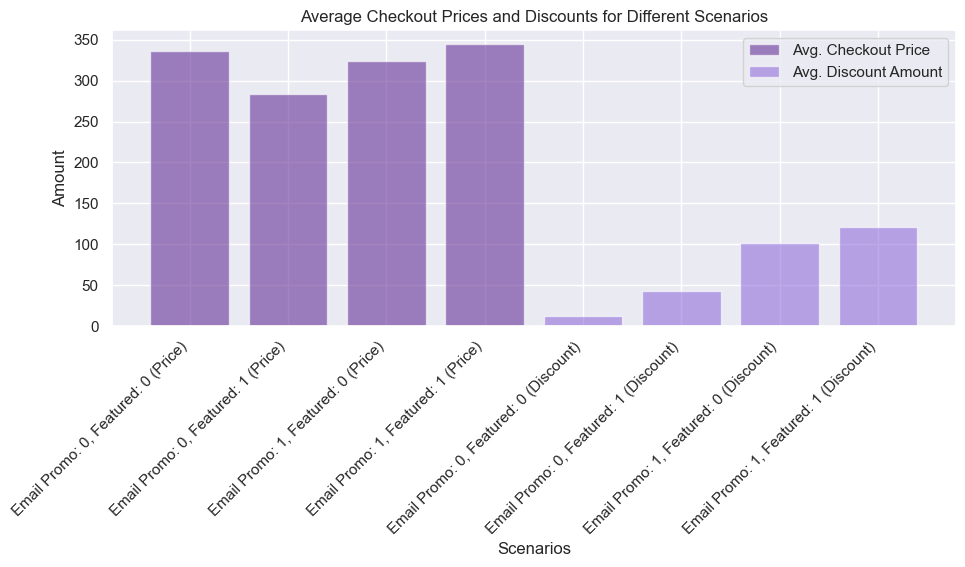

In [100]:
plt.figure(figsize=(10, 4))
plt.bar([label + " (Price)" for label in scenario_labels], average_checkout_prices, color='rebeccapurple', alpha=0.6,
        label='Avg. Checkout Price')
plt.bar([label + " (Discount)" for label in scenario_labels], average_discounts, color='mediumpurple', alpha=0.6,
        label='Avg. Discount Amount')

plt.title('Average Checkout Prices and Discounts for Different Scenarios')
plt.xlabel('Scenarios')
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()

#### OBSERVATIONS:
- Products that have no promotion have a high average checkout price and a small discount amount,
- Products that are promoted via email have the lowest average checkout price and a higher discount,
- Products that are promoted via homepage have a bit higher price and also higher discounts,
- Products that are promoted both ways are having the highest checkout price and the highest discounts

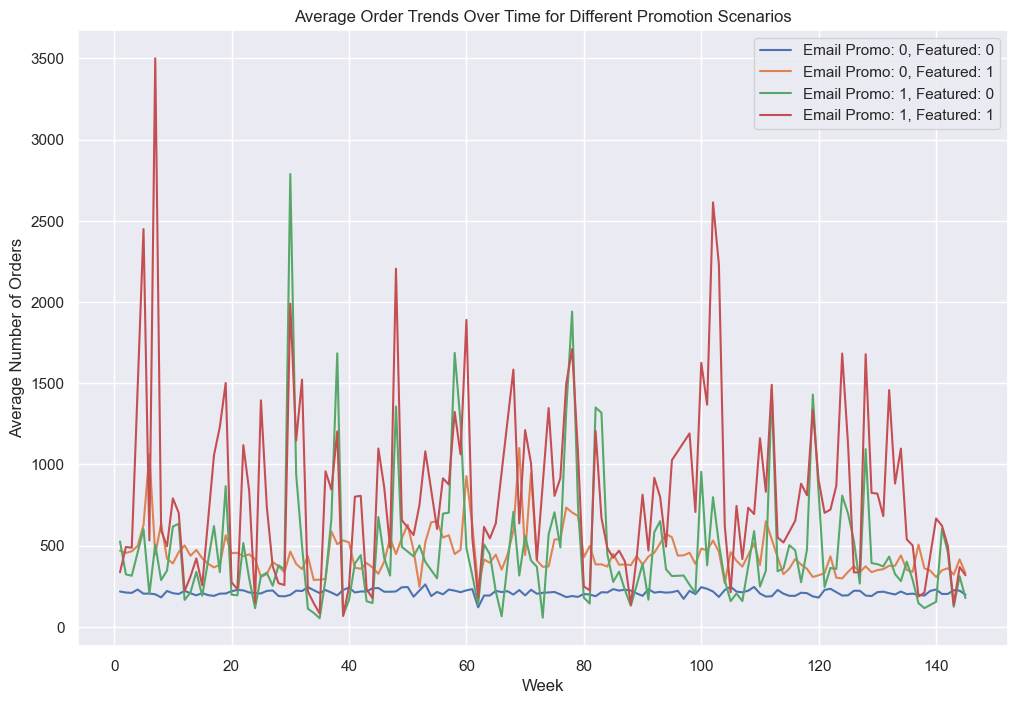

In [101]:
grouped_data = full_train_data.groupby(['week', 'emailer_for_promotion', 'homepage_featured'])[
    'num_orders'].mean().reset_index()

plt.figure(figsize=(12, 8))

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        scenario_data = grouped_data[(grouped_data['emailer_for_promotion'] == email_promo) & (
                grouped_data['homepage_featured'] == homepage_featured)]
        plt.plot(scenario_data['week'], scenario_data['num_orders'],
                 label=f'Email Promo: {email_promo}, Featured: {homepage_featured}')

plt.title('Average Order Trends Over Time for Different Promotion Scenarios')
plt.xlabel('Week')
plt.ylabel('Average Number of Orders')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [102]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     456548 non-null  int64   
 1   week                   456548 non-null  int64   
 2   center_id              456548 non-null  int64   
 3   meal_id                456548 non-null  int64   
 4   checkout_price         456548 non-null  float64 
 5   base_price             456548 non-null  float64 
 6   emailer_for_promotion  456548 non-null  int64   
 7   homepage_featured      456548 non-null  int64   
 8   num_orders             456548 non-null  int64   
 9   city_code              456548 non-null  int64   
 10  region_code            456548 non-null  int64   
 11  center_type            456548 non-null  object  
 12  op_area                456548 non-null  float64 
 13  category               456548 non-null  object  
 14  cuisine             

# Let's build a pipeline that does all the necessary transformations and prepare the dataset for training!

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin


class FoodDataMerger(BaseEstimator, TransformerMixin):
    center_info = None
    meal_info = None

    def __init__(self, center_info, meal_info):
        self.center_info = center_info
        self.meal_info = meal_info

    def fit(self, data):
        return self

    def transform(self, data):
        merged_data = data.merge(self.center_info, on="center_id", how="inner", sort=False)
        merged_data = merged_data.merge(self.meal_info, on="meal_id", how="inner", sort=False)
        merged_data = merged_data.sort_values(by='id', ascending=True)
        return merged_data


class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        new_data = X.copy()

        new_data['op_area_bin'] = pd.cut(new_data['op_area'], [0, 2.4, 3.7, 4.5, 5.1, 6.7, np.inf],
                                         labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'])

        new_data['checkout_price_bin'] = pd.cut(new_data['checkout_price'], [0, 100, 250, 350, 520, np.inf],
                                                labels=['Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Luxury'])

        new_data['base_price_bin'] = pd.cut(new_data['base_price'], [0, 100, 250, 350, 520, np.inf],
                                            labels=['Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Luxury'])

        new_data["category_cuisine"] = new_data['category'] + "-" + new_data['cuisine']

        new_data["region_city"] = new_data['region_code'].astype(str) + "-" + new_data['city_code'].astype(str)

        new_data['is_discount'] = (new_data['checkout_price'] <= new_data['base_price']).astype(int)

        new_data['discount_value'] = new_data.apply(
            lambda row: row['base_price'] - row['checkout_price'] if row['checkout_price'] <= row['base_price'] else 0,
            axis=1)

        return new_data


class DataFrameReconstructor(BaseEstimator, TransformerMixin):
    pipeline = None

    def __init__(self, pipeline):
        self.pipeline = pipeline

    def fit(self, data):
        return self

    def transform(self, data):
        return pd.DataFrame(data, columns=self.pipeline.get_feature_names_out())


class FeatureSelector(BaseEstimator, TransformerMixin):
    feature_list = None

    def __init__(self, feature_list):
        self.feature_list = feature_list

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.feature_list]


class PipelineBuilder:
    median_attribs = None
    most_freq_attribs = None
    standard_scaling_attribs = None
    normalization_attribs = None
    selected_features = None
    one_hot_attribs = None
    include_one_hot = True

    def __init__(self, median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                 selected_features, one_hot_attribs, include_one_hot = True):
        self.median_attribs = median_attribs
        self.most_freq_attribs = most_freq_attribs
        self.standard_scaling_attribs = standard_scaling_attribs
        self.normalization_attribs = normalization_attribs
        self.selected_features = selected_features
        self.one_hot_attribs = one_hot_attribs
        self.include_one_hot = include_one_hot

    def build(self):
        fill_missing_pipeline = ColumnTransformer(
            transformers=[
                ('num', SimpleImputer(strategy="median"), self.median_attribs),
                ('cat', SimpleImputer(strategy="most_frequent"), self.most_freq_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        scaling_pipeline = ColumnTransformer(
            transformers=[
                ('standard', StandardScaler(), self.standard_scaling_attribs),
                ('normalization', MinMaxScaler(), self.normalization_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        one_hot_pipeline = ColumnTransformer(
            transformers=[
                ('one-hot', OneHotEncoder(), self.one_hot_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        if self.include_one_hot:
            return Pipeline([
                ('merger', FoodDataMerger(center_info, meal_info)),
                ('missing_data_filler', fill_missing_pipeline),
                ('missing_reconstructor', DataFrameReconstructor(fill_missing_pipeline)),
                ('feature_adder', FeatureAdder()),
                ('scaler', scaling_pipeline),
                ('scaler_reconstructor', DataFrameReconstructor(scaling_pipeline)),
                ('feature_selector', FeatureSelector(self.selected_features)),
                ('one_hot_encoding', one_hot_pipeline)
            ])
        else:
            return Pipeline([
                ('merger', FoodDataMerger(center_info, meal_info)),
                ('missing_data_filler', fill_missing_pipeline),
                ('missing_reconstructor', DataFrameReconstructor(fill_missing_pipeline)),
                ('feature_adder', FeatureAdder()),
                ('scaler', scaling_pipeline),
                ('scaler_reconstructor', DataFrameReconstructor(scaling_pipeline)),
                ('feature_selector', FeatureSelector(self.selected_features))

            ])

In [104]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price_bin', 'base_price_bin', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']
#one-hot column

one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type', 'checkout_price_bin', 'base_price_bin']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

# Let's shortlist a few models to find the best performing ones

In [105]:
sorted_train_data = train_data.sort_values(by='id', ascending=True)
final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

In [106]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

## Linear Regression

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg_scores = cross_val_score(lin_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_rmse_scores)



Scores: [286.62417789 280.1528595  272.1273846  263.60175039 272.10329944
 272.77828977 287.72194785 280.32421962 267.41425423 300.98875939]
Mean: 278.38369426729093
Standard Deviation: 10.591661402816774


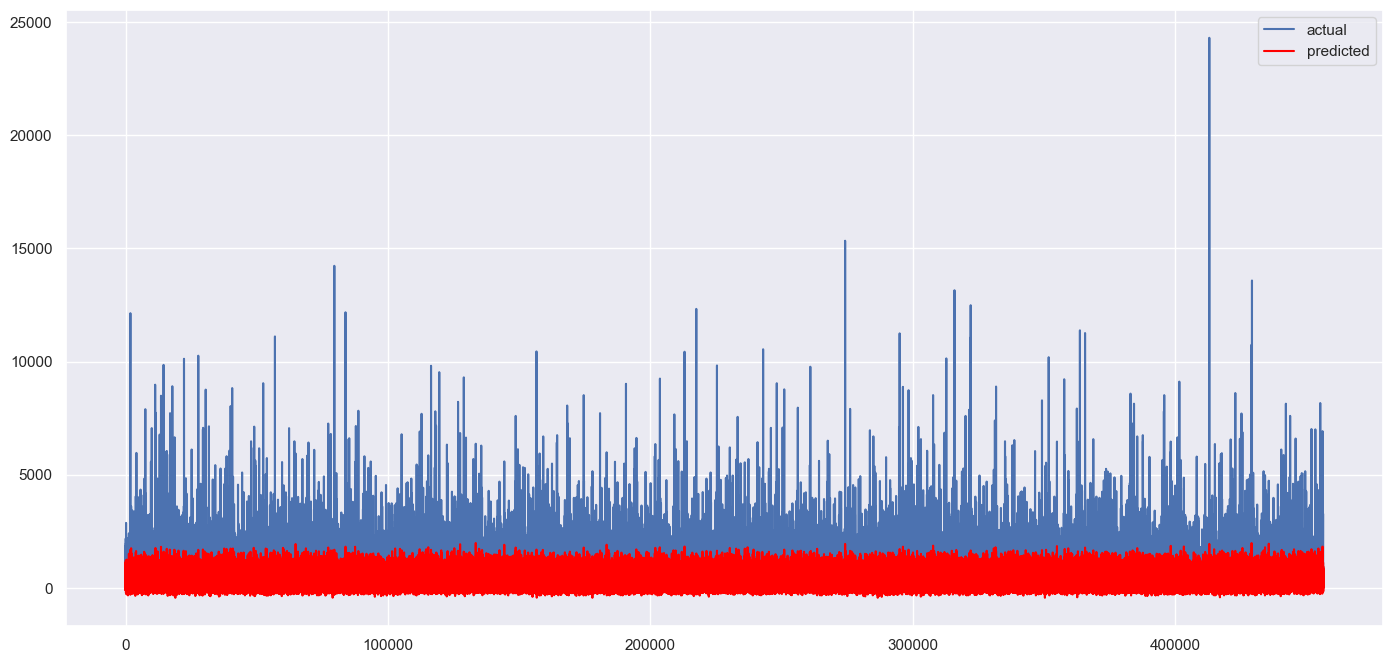

In [108]:
lin_reg.fit(final_train_data, final_train_labels)

predictions = lin_reg.predict(final_train_data)

plt.figure(figsize=(17, 8))

plt.rcParams['agg.path.chunksize'] = 20000
plt.plot(final_train_labels.reset_index(drop=True), label="actual")
plt.plot(predictions, color='red', label="predicted")
plt.legend(loc='best')
#pyplot.plot(predictions, color='red')
plt.show()


# XGB Regressor

In [109]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-26540.733) total time=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] END ........................... score: (test=-25798.289) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] END ........................... score: (test=-24755.300) total time=   1.5s
[CV] END ........................... score: (test=-23084.109) total time=   1.4s
[CV] END ........................... score: (test=-26018.468) total time=   1.4s
[CV] END ........................... score: (test=-24778.780) total time=   1.4s
[CV] END ........................... score: (test=-25460.721) total time=   1.5s
[CV] END ........................... score: (test=-26715.444) total time=   1.4s
[CV] END ........................... score: (test=-24265.305) total time=   1.4s
[CV] END ........................... score: (test=-28162.828) total time=   1.4s
Scores: [162.91326726 160.61845885 157.33817207 151.93455654 161.30241062
 157.41277094 159.56416019 163.44859742 155.77324919 167.81784066]
Mean: 159.81234837469623
Standard Deviation: 4.24394928505859


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.3s finished


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

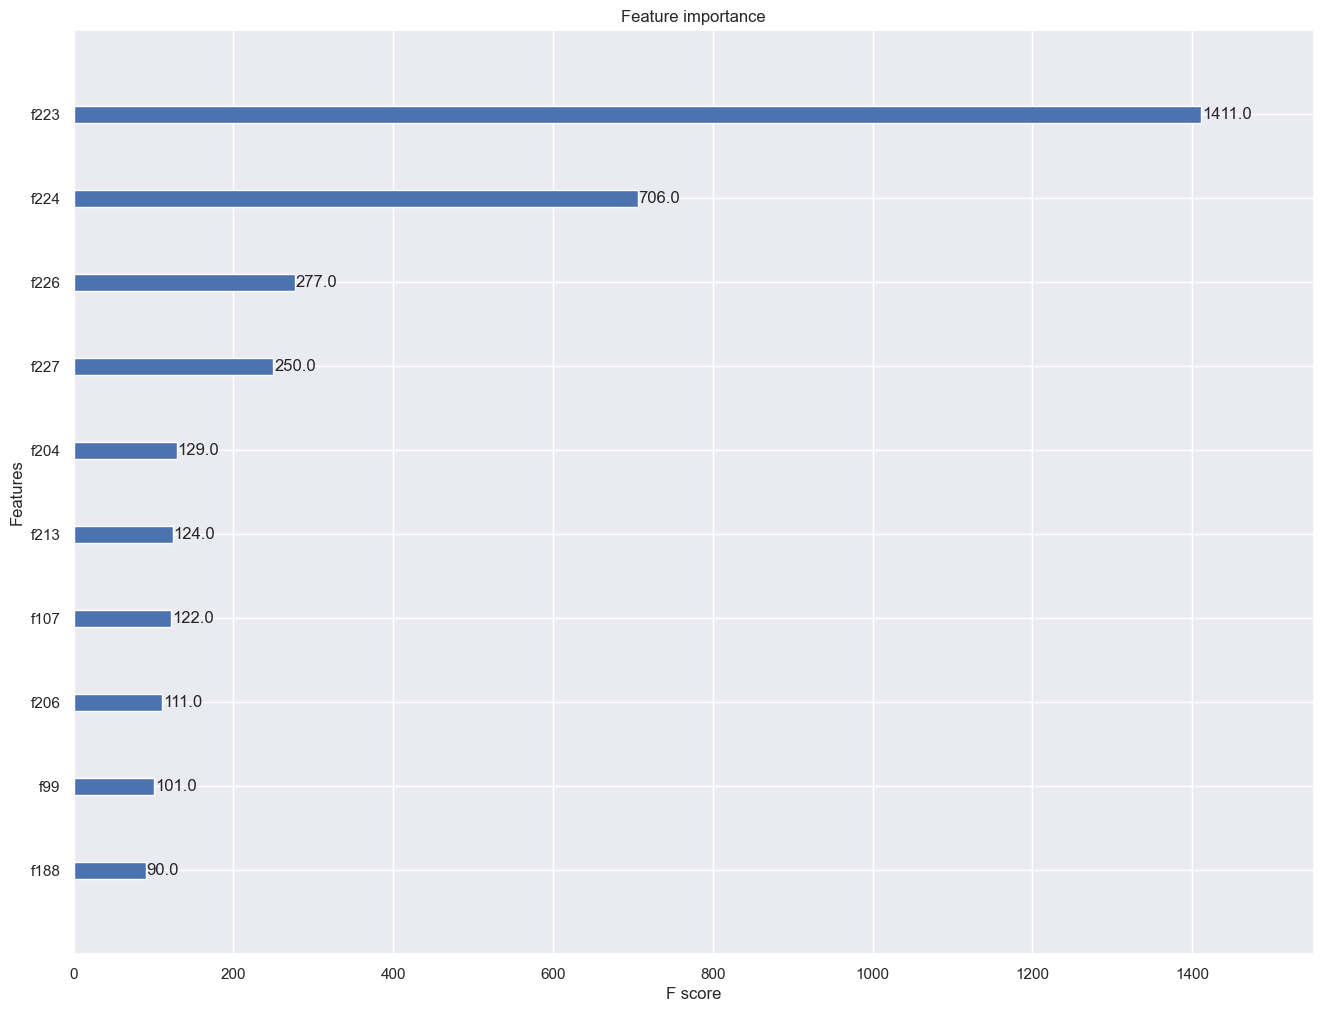

In [110]:
from xgboost import plot_importance

xgb_reg.fit(final_train_data, final_train_labels)

plot_importance(xgb_reg, max_num_features=10)


In [111]:
predictions = xgb_reg.predict(final_train_data)

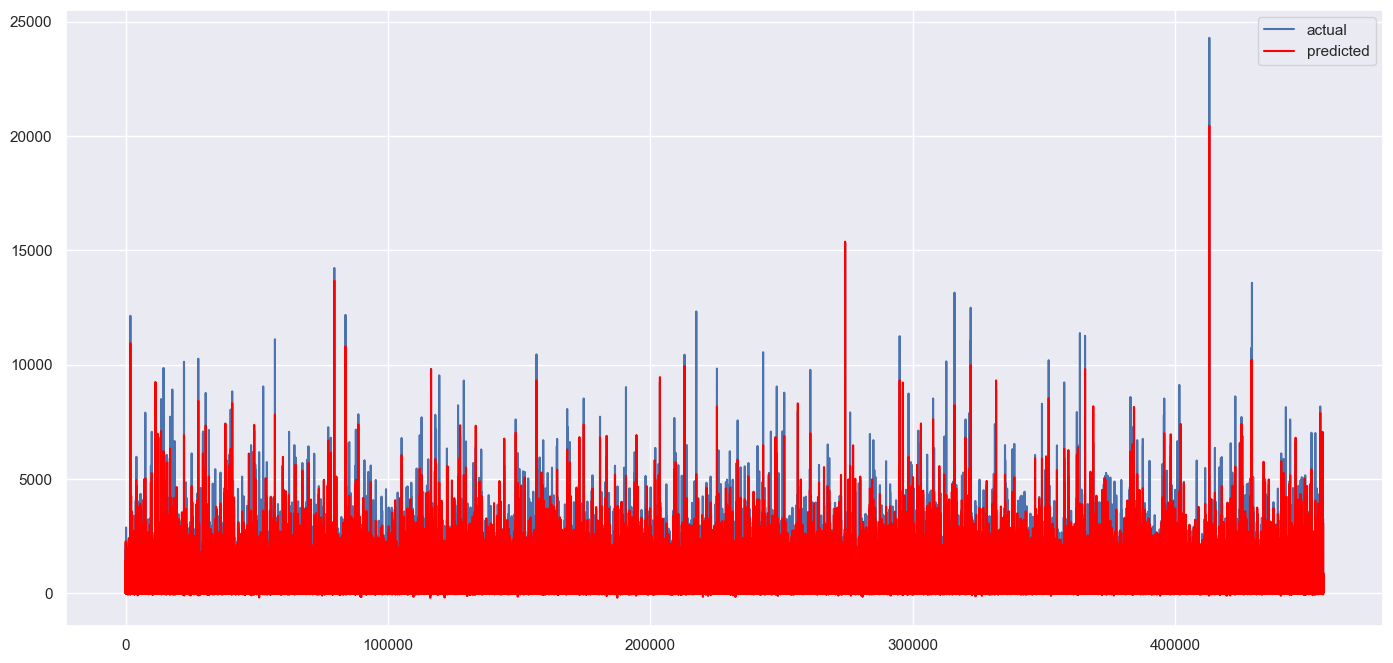

In [112]:
plt.figure(figsize=(17, 8))

plt.rcParams['agg.path.chunksize'] = 20000
plt.plot(final_train_labels.reset_index(drop=True), label="actual")
plt.plot(predictions, color='red', label="predicted")
plt.legend(loc='best')
#pyplot.plot(predictions, color='red')
plt.show()


# Feature selection

## Keeping checkout and base prices instead of their bins

In [113]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25279.545) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] END ........................... score: (test=-23841.727) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-24229.051) total time=   1.4s
[CV] END ........................... score: (test=-23289.307) total time=   1.5s
[CV] END ........................... score: (test=-24905.707) total time=   1.5s
[CV] END ........................... score: (test=-24980.019) total time=   1.5s
[CV] END ........................... score: (test=-24118.275) total time=   1.5s
[CV] END ........................... score: (test=-25249.981) total time=   1.5s
[CV] END ........................... score: (test=-24074.897) total time=   1.4s
[CV] END ........................... score: (test=-25666.065) total time=   1.4s
Scores: [158.99542517 154.40766354 155.65683739 152.60834644 157.81541963
 158.05068381 155.30059632 158.90242619 155.16087463 160.20632009]
Mean: 156.71045932053022
Standard Deviation: 2.2998524576913657


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.5s finished


OBSERVATION: Using actual prices is better than using the price bins

## Checking if using op_area value instead on bins is better. Keeping only better versions as we go

In [114]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25308.799) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-23924.749) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-23290.243) total time=   1.4s
[CV] END ........................... score: (test=-22867.434) total time=   1.5s
[CV] END ........................... score: (test=-23752.602) total time=   1.5s
[CV] END ........................... score: (test=-24126.349) total time=   1.5s
[CV] END ........................... score: (test=-23634.272) total time=   1.4s
[CV] END ........................... score: (test=-24446.986) total time=   1.5s
[CV] END ........................... score: (test=-23122.653) total time=   1.5s
[CV] END ........................... score: (test=-24711.995) total time=   1.5s
Scores: [159.08739495 154.67627108 152.61141255 151.21982172 154.11879056
 155.32658906 153.73442192 156.35531903 152.06134557 157.20049171]
Mean: 154.63918581471845
Standard Deviation: 2.308775621497569


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.7s finished


OBS: Using actual value of op_area is better than the bins

## Checking if using the category and cuisine separately instead of the combined category_cuisine

In [115]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24600.309) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-23590.993) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-23576.511) total time=   1.5s
[CV] END ........................... score: (test=-23177.855) total time=   1.5s
[CV] END ........................... score: (test=-23420.408) total time=   1.5s
[CV] END ........................... score: (test=-24407.902) total time=   1.5s
[CV] END ........................... score: (test=-24106.561) total time=   1.5s
[CV] END ........................... score: (test=-24609.970) total time=   1.5s
[CV] END ........................... score: (test=-23036.997) total time=   1.6s
[CV] END ........................... score: (test=-25817.856) total time=   1.5s
Scores: [156.84485505 153.59359712 153.54644421 152.24274971 153.0372781
 156.2302863  155.26287732 156.87565042 151.7794361  160.67935748]
Mean: 155.00925318021524
Standard Deviation: 2.582170413255772


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.8s finished


OBS: category_cuisine seems to be very slightly better instead of separate

## Checking if discount features added are actually helping or not

In [116]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24846.552) total time=   1.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] END ........................... score: (test=-24263.661) total time=   1.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] END ........................... score: (test=-23221.211) total time=   1.5s
[CV] END ........................... score: (test=-23657.484) total time=   1.4s
[CV] END ........................... score: (test=-23833.098) total time=   1.3s
[CV] END ........................... score: (test=-24443.257) total time=   1.4s
[CV] END ........................... score: (test=-24340.584) total time=   1.4s
[CV] END ........................... score: (test=-25068.287) total time=   1.4s
[CV] END ........................... score: (test=-22542.202) total time=   1.3s
[CV] END ........................... score: (test=-26230.968) total time=   1.3s
Scores: [157.62789037 155.76797043 152.3850757  153.80989546 154.37971916
 156.34339546 156.01469271 158.3296782  150.14060668 161.95977138]
Mean: 155.6758695557857
Standard Deviation: 3.123134748827211


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.6s finished


OBS: Engineered features discount_value and is_discount seem to help. We'll keep them.

## Do both discount features help, or is only one better?
Testing with only discount_value

In [117]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25137.295) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-23600.270) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] END ........................... score: (test=-23287.690) total time=   1.4s
[CV] END ........................... score: (test=-23358.859) total time=   1.4s
[CV] END ........................... score: (test=-23808.854) total time=   1.4s
[CV] END ........................... score: (test=-23806.995) total time=   1.5s
[CV] END ........................... score: (test=-23856.330) total time=   1.4s
[CV] END ........................... score: (test=-24849.941) total time=   1.4s
[CV] END ........................... score: (test=-23050.847) total time=   1.4s
[CV] END ........................... score: (test=-25196.729) total time=   1.4s
Scores: [158.54745463 153.62379448 152.60304678 152.83605135 154.3011798
 154.29515529 154.45494639 157.6386409  151.8250541  158.73477586]
Mean: 154.88600995797873
Standard Deviation: 2.388514063548563


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.3s finished


Testing with only is_discount

In [118]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24738.474) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-24760.905) total time=   1.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-23451.896) total time=   1.4s
[CV] END ........................... score: (test=-23373.342) total time=   1.5s
[CV] END ........................... score: (test=-24131.362) total time=   1.4s
[CV] END ........................... score: (test=-24482.988) total time=   1.4s
[CV] END ........................... score: (test=-24611.726) total time=   1.5s
[CV] END ........................... score: (test=-24748.567) total time=   1.4s
[CV] END ........................... score: (test=-22604.607) total time=   1.5s
[CV] END ........................... score: (test=-25996.283) total time=   1.4s
Scores: [157.28469003 157.35598133 153.14011791 152.88342466 155.34272486
 156.47040558 156.88124877 157.31677141 150.3482852  161.23362746]
Mean: 155.82572772099576
Standard Deviation: 2.890914870572976


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.3s finished


OBS: discount_value help a bit by itself. is_discount actually confuses the data set by itself.
Both of the values together provide the best result. Keeping both

## Checking if meal_id helps or not

In [119]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-30085.410) total time=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] END ........................... score: (test=-29696.379) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] END ........................... score: (test=-29609.256) total time=   1.6s
[CV] END ........................... score: (test=-28356.715) total time=   1.5s
[CV] END ........................... score: (test=-30651.510) total time=   1.4s
[CV] END ........................... score: (test=-30530.289) total time=   1.5s
[CV] END ........................... score: (test=-30931.477) total time=   1.6s
[CV] END ........................... score: (test=-30007.316) total time=   1.5s
[CV] END ........................... score: (test=-28565.218) total time=   1.5s
[CV] END ........................... score: (test=-32278.237) total time=   1.5s
Scores: [173.45146179 172.32637244 172.07340411 168.39452319 175.07572632
 174.7291876  175.87346823 173.22619935 169.01248001 179.66145116]
Mean: 173.382427419865
Standard Deviation: 3.116826007979842


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.0s finished


OBS: Removing the meal_id is much worse

## Keeping meal id, but not doing 1-hot

In [120]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24486.820) total time=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] END ........................... score: (test=-23468.785) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] END ........................... score: (test=-22658.632) total time=   1.5s
[CV] END ........................... score: (test=-23170.275) total time=   1.5s
[CV] END ........................... score: (test=-25143.544) total time=   1.6s
[CV] END ........................... score: (test=-23847.452) total time=   1.5s
[CV] END ........................... score: (test=-24371.302) total time=   1.5s
[CV] END ........................... score: (test=-24312.249) total time=   1.5s
[CV] END ........................... score: (test=-23259.720) total time=   1.6s
[CV] END ........................... score: (test=-26337.054) total time=   1.6s
Scores: [156.48265109 153.19525065 150.52784611 152.21785242 158.56715903
 154.4262023  156.11310535 155.92385679 152.51137559 162.28694834]
Mean: 155.22522476783024
Standard Deviation: 3.273039380756024


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.2s finished


OBS: Removing the 1-hot enc from meal-id made it worse. We will keep meal id and the 1 hot enc on it.

## Is center id relevant?

In [121]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25478.108) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-25123.112) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-23896.771) total time=   1.5s
[CV] END ........................... score: (test=-23477.503) total time=   1.4s
[CV] END ........................... score: (test=-24160.058) total time=   1.4s
[CV] END ........................... score: (test=-23558.516) total time=   1.4s
[CV] END ........................... score: (test=-25646.442) total time=   1.5s
[CV] END ........................... score: (test=-25483.474) total time=   1.5s
[CV] END ........................... score: (test=-23186.729) total time=   1.5s
[CV] END ........................... score: (test=-26654.806) total time=   1.4s
Scores: [159.61863306 158.50271939 154.5858054  153.22370285 155.43505885
 153.48783524 160.14506422 159.63544015 152.2718927  163.26299738]
Mean: 157.01691492321171
Standard Deviation: 3.498610438524991


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.4s finished


OBS: Worse without the center ID

## Is performance better without 1-hot enc on center ID?

In [122]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24746.935) total time=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] END ........................... score: (test=-24354.803) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] END ........................... score: (test=-23413.941) total time=   1.6s
[CV] END ........................... score: (test=-22452.649) total time=   1.5s
[CV] END ........................... score: (test=-23808.696) total time=   1.5s
[CV] END ........................... score: (test=-23559.379) total time=   1.5s
[CV] END ........................... score: (test=-24127.328) total time=   1.5s
[CV] END ........................... score: (test=-24386.846) total time=   1.5s
[CV] END ........................... score: (test=-22594.055) total time=   1.6s
[CV] END ........................... score: (test=-27080.194) total time=   1.6s
Scores: [157.31158707 156.06025419 153.01614533 149.84208093 154.30066667
 153.49064713 155.3297404  156.16288305 150.31318896 164.56061004]
Mean: 155.03878037695085
Standard Deviation: 3.931819478050607


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.3s finished


OBS: Removing 1-hot enc from center ID is worse. We will be keeping it.
It is the expected result based on our assumptions as the meal id and center id are categorical attributes where the actual number on the IDs is not relevant. It is only a unique identifier

## Is city code relevant?

In [123]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24776.453) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-24546.249) total time=   1.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] END ........................... score: (test=-23166.298) total time=   1.3s
[CV] END ........................... score: (test=-23049.223) total time=   1.4s
[CV] END ........................... score: (test=-23522.411) total time=   1.3s
[CV] END ........................... score: (test=-25287.093) total time=   1.4s
[CV] END ........................... score: (test=-24111.190) total time=   1.4s
[CV] END ........................... score: (test=-25534.137) total time=   1.5s
[CV] END ........................... score: (test=-23325.770) total time=   1.4s
[CV] END ........................... score: (test=-25966.620) total time=   1.4s
Scores: [157.40537938 156.67242433 152.20479034 151.8197051  153.37017632
 159.01915769 155.27778456 159.79404519 152.7277649  161.14161391]
Mean: 155.94328417085225
Standard Deviation: 3.199452086880682


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.9s finished


OBS: removing the city code is worse.

## Is removing the 1 hot enc from city code better?

In [124]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24785.356) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-24560.680) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-22657.321) total time=   1.5s
[CV] END ........................... score: (test=-22796.946) total time=   1.4s
[CV] END ........................... score: (test=-24348.095) total time=   1.4s
[CV] END ........................... score: (test=-24383.678) total time=   1.4s
[CV] END ........................... score: (test=-24288.510) total time=   1.5s
[CV] END ........................... score: (test=-24658.621) total time=   1.4s
[CV] END ........................... score: (test=-22811.710) total time=   1.4s
[CV] END ........................... score: (test=-25503.673) total time=   1.5s
Scores: [157.43365499 156.71847527 150.52348995 150.98657705 156.03876094
 156.15273958 155.84771279 157.03063825 151.03545777 159.69869398]
Mean: 155.14662005788574
Standard Deviation: 2.9975461162284742


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.5s finished


OBS: removing 1 hot enc makes it worse. Keeping it as originally intended.

## Is region code relevant?

In [125]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25311.966) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-25358.053) total time=   1.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] END ........................... score: (test=-23320.652) total time=   1.4s
[CV] END ........................... score: (test=-23862.051) total time=   1.4s
[CV] END ........................... score: (test=-24510.794) total time=   1.4s
[CV] END ........................... score: (test=-25575.095) total time=   1.3s
[CV] END ........................... score: (test=-24716.296) total time=   1.4s
[CV] END ........................... score: (test=-26039.380) total time=   1.4s
[CV] END ........................... score: (test=-23706.909) total time=   1.4s
[CV] END ........................... score: (test=-25988.226) total time=   1.5s
Scores: [159.09734659 159.24212223 152.71100748 154.47346534 156.55923632
 159.92215146 157.21417372 161.36722138 153.97048009 161.20864261]
Mean: 157.5765847218378
Standard Deviation: 2.9261358128423454


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.0s finished


OBS: Removing it is worse

## Is removing the 1 hot enc from region code better?

In [126]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25426.097) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-24269.300) total time=   1.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-23498.952) total time=   1.4s
[CV] END ........................... score: (test=-23701.226) total time=   1.5s
[CV] END ........................... score: (test=-23874.063) total time=   1.4s
[CV] END ........................... score: (test=-24116.700) total time=   1.4s
[CV] END ........................... score: (test=-24824.646) total time=   1.4s
[CV] END ........................... score: (test=-25303.882) total time=   1.5s
[CV] END ........................... score: (test=-22647.614) total time=   1.4s
[CV] END ........................... score: (test=-26079.172) total time=   1.4s
Scores: [159.45562841 155.78607163 153.29367952 153.95202517 154.51233774
 155.29552553 157.5583882  159.07194054 150.49124349 161.49046899]
Mean: 156.09073092353253
Standard Deviation: 3.1383060278326784


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.3s finished


OBS: removing 1 hot encoding from region code made it worse

## Does week normalization help?

In [127]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24497.239) total time=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] END ........................... score: (test=-24192.947) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] END ........................... score: (test=-23127.533) total time=   1.5s
[CV] END ........................... score: (test=-23201.492) total time=   1.5s
[CV] END ........................... score: (test=-23348.438) total time=   1.5s
[CV] END ........................... score: (test=-24234.495) total time=   1.6s
[CV] END ........................... score: (test=-23906.532) total time=   1.4s
[CV] END ........................... score: (test=-24882.852) total time=   1.4s
[CV] END ........................... score: (test=-23300.886) total time=   1.5s
[CV] END ........................... score: (test=-26160.649) total time=   1.4s
Scores: [156.51593705 155.54082117 152.07739254 152.32035878 152.80195771
 155.67432251 154.6173723  157.74299459 152.64627601 161.74253888]
Mean: 155.16799715430346
Standard Deviation: 2.863368729857979


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.6s finished


OBS: Normalization of the week was a correct decision. We normalized because we wanted to preserve the distribution but look in a smaller range.

## Will scaling week instead of normalizing it be better?

In [128]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value', 'week']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24497.239) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-24192.947) total time=   1.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-23127.533) total time=   1.4s
[CV] END ........................... score: (test=-23201.492) total time=   1.5s
[CV] END ........................... score: (test=-23348.438) total time=   1.5s
[CV] END ........................... score: (test=-24234.495) total time=   1.4s
[CV] END ........................... score: (test=-23906.532) total time=   1.4s
[CV] END ........................... score: (test=-24882.852) total time=   1.4s
[CV] END ........................... score: (test=-23300.886) total time=   1.4s
[CV] END ........................... score: (test=-26160.649) total time=   1.5s
Scores: [156.51593705 155.54082117 152.07739254 152.32035878 152.80195771
 155.67432251 154.6173723  157.74299459 152.64627601 161.74253888]
Mean: 155.16799715430346
Standard Deviation: 2.863368729857979


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.3s finished


OBS: As expected, week should be normalized instead of scaled. Week is an increasing value where the distance between a value and the one before it is important and the same. We want to keep it as it is but just work with smaller values.

## Will normalizing op_area instead of scaling it be better?

In [129]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'discount_value']
normalization_attribs = ['week', 'op_area']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-24569.895) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-24381.310) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-23171.398) total time=   1.5s
[CV] END ........................... score: (test=-22871.333) total time=   1.5s
[CV] END ........................... score: (test=-24112.385) total time=   1.4s
[CV] END ........................... score: (test=-23934.092) total time=   1.4s
[CV] END ........................... score: (test=-23790.614) total time=   1.4s
[CV] END ........................... score: (test=-25173.094) total time=   1.5s
[CV] END ........................... score: (test=-23372.831) total time=   1.4s
[CV] END ........................... score: (test=-25666.918) total time=   1.4s
Scores: [156.74787004 156.14515786 152.22154163 151.23271267 155.28163215
 154.70647171 154.24206445 158.66031037 152.88175404 160.2089813 ]
Mean: 155.23284962214478
Standard Deviation: 2.673851107833178


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.3s finished


OBS: As expected, normalizing op-are instead of scaling it resulted in worse score. This is because we want the op_area to be on the same scale as the other numerical attributes like the prices.

## Is normalizing the price features better than scaling them?

In [130]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['op_area']
normalization_attribs = ['week', 'checkout_price', 'base_price', 'discount_value']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25002.484) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-24259.441) total time=   1.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] END ........................... score: (test=-23489.002) total time=   1.5s
[CV] END ........................... score: (test=-22604.762) total time=   1.5s
[CV] END ........................... score: (test=-24222.562) total time=   1.4s
[CV] END ........................... score: (test=-24634.669) total time=   1.5s
[CV] END ........................... score: (test=-23894.053) total time=   1.4s
[CV] END ........................... score: (test=-25591.475) total time=   1.4s
[CV] END ........................... score: (test=-22923.847) total time=   1.5s
[CV] END ........................... score: (test=-26101.812) total time=   1.5s
Scores: [158.12173877 155.75442646 153.26122107 150.34880057 155.63599319
 156.95435177 154.57701315 159.97335728 151.40623299 161.56055116]
Mean: 155.75936864213926
Standard Deviation: 3.38080145498045


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.7s finished


OBS: Normalizing the prices is worse. This is because they will work on a different scale than other relevant training features like the op_area.

## Is scaling and normalization actually helping?

In [131]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = []
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25369.472) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-23652.080) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-23418.354) total time=   1.5s
[CV] END ........................... score: (test=-22802.241) total time=   1.6s
[CV] END ........................... score: (test=-24373.777) total time=   1.4s
[CV] END ........................... score: (test=-24770.317) total time=   1.4s
[CV] END ........................... score: (test=-24149.856) total time=   1.4s
[CV] END ........................... score: (test=-25536.266) total time=   1.4s
[CV] END ........................... score: (test=-22627.199) total time=   1.5s
[CV] END ........................... score: (test=-26661.294) total time=   1.4s
Scores: [159.27797196 153.79232656 153.03056568 151.00410843 156.12103323
 157.38588439 155.40224079 159.80070843 150.42340035 163.28286648]
Mean: 155.9521106299882
Standard Deviation: 3.876197801970369


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.6s finished


OBS: It's worse. It's because we have numerical attributes that represent different scales(e.g feature 1: 0 - 50000 and feature 2: 0 - 5). Leaving them as is will let the model learn that feature 1 is much more important than feature 2 only because its scale is larger. But both features are equally important.

## Is using the engineered feature region_city better than the 2 separate features?

In [132]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'region_city', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_city', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25311.966) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ........................... score: (test=-25358.053) total time=   1.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] END ........................... score: (test=-23320.652) total time=   1.5s
[CV] END ........................... score: (test=-23862.051) total time=   1.4s
[CV] END ........................... score: (test=-24510.794) total time=   1.4s
[CV] END ........................... score: (test=-25575.095) total time=   1.3s
[CV] END ........................... score: (test=-24716.296) total time=   1.4s
[CV] END ........................... score: (test=-26039.380) total time=   1.4s
[CV] END ........................... score: (test=-23706.909) total time=   1.4s
[CV] END ........................... score: (test=-25988.226) total time=   1.4s
Scores: [159.09734659 159.24212223 152.71100748 154.47346534 156.55923632
 159.92215146 157.21417372 161.36722138 153.97048009 161.20864261]
Mean: 157.5765847218378
Standard Deviation: 2.9261358128423454


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.9s finished


OBS: Much worse, we will be keeping region and city separately

# Final Feature version before HyperParameter tuning

In [133]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ........................... score: (test=-25308.799) total time=   1.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] END ........................... score: (test=-23924.749) total time=   1.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] END ........................... score: (test=-23290.243) total time=   1.5s
[CV] END ........................... score: (test=-22867.434) total time=   1.4s
[CV] END ........................... score: (test=-23752.602) total time=   1.4s
[CV] END ........................... score: (test=-24126.349) total time=   1.5s
[CV] END ........................... score: (test=-23634.272) total time=   1.4s
[CV] END ........................... score: (test=-24446.986) total time=   1.4s
[CV] END ........................... score: (test=-23122.653) total time=   1.4s
[CV] END ........................... score: (test=-24711.995) total time=   1.5s
Scores: [159.08739495 154.67627108 152.61141255 151.21982172 154.11879056
 155.32658906 153.73442192 156.35531903 152.06134557 157.20049171]
Mean: 154.63918581471845
Standard Deviation: 2.308775621497569


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.5s finished


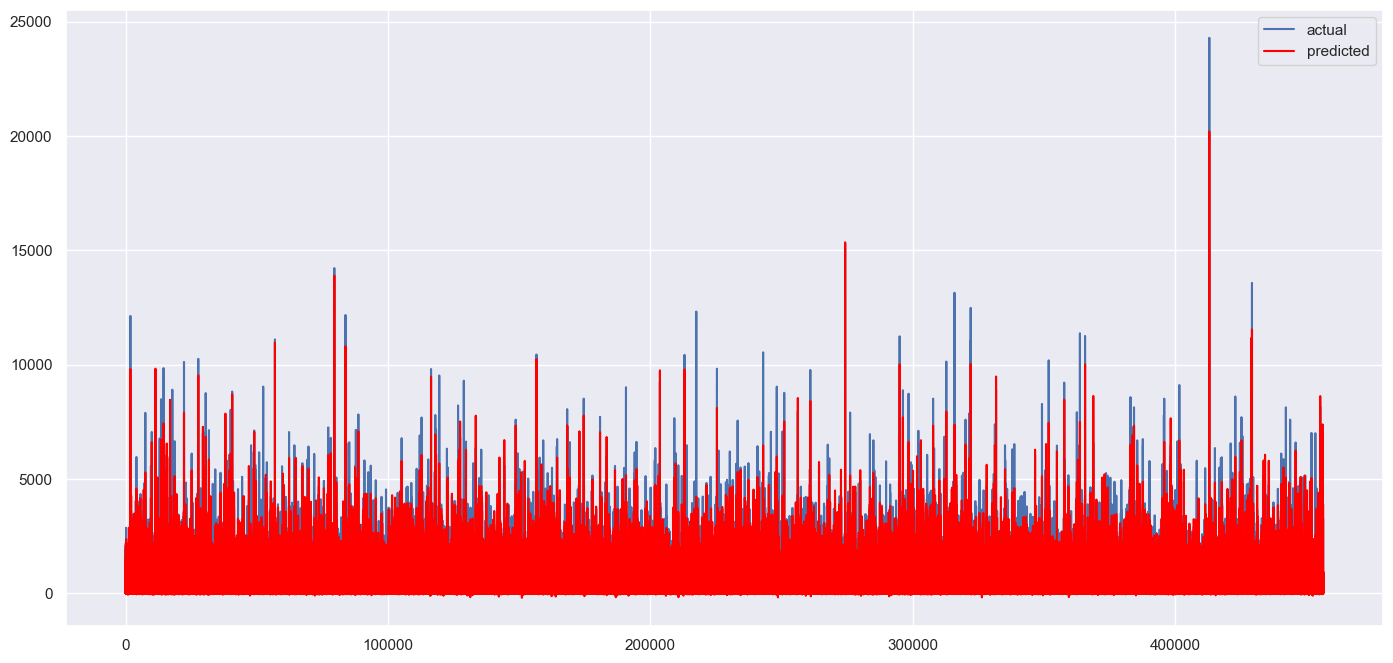

In [134]:
xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_train_data)

plt.figure(figsize=(17, 8))

plt.rcParams['agg.path.chunksize'] = 20000
plt.plot(final_train_labels.reset_index(drop=True), label="actual")
plt.plot(predictions, color='red', label="predicted")
plt.legend(loc='best')
#pyplot.plot(predictions, color='red')
plt.show()
